### PREPARATION

In [443]:
import yaml
import logging
import pypsa
import warnings
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
import numpy as np
from shapely.geometry import LineString
import pandas as pd
from pathlib import Path
import seaborn as sns
from datetime import datetime
from cartopy import crs as ccrs
from pypsa.plot import add_legend_circles, add_legend_lines, add_legend_patches
import os
import xarray as xr
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import sys
import matplotlib.lines as mlines
from matplotlib.patches import Wedge
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates


In [444]:
logging.getLogger("pypsa.io").setLevel(logging.ERROR)
warnings.simplefilter(action='ignore', category=ResourceWarning)

# Load the UHS and woUHS networks
# uhs = pypsa.Network("../../../pypsa-earth/results/UHSwoexport/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_0export.nc")
# woUHS = pypsa.Network("../../../pypsa-earth/results/woUHSwoexport/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_0export.nc")
uhs = pypsa.Network("../../../pypsa-earth/results/UHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
woUHS = pypsa.Network("../../../pypsa-earth/results/woUHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")

# Load geographic data for onshore regions and ports
regions_onshore = gpd.read_file("../../../pypsa-earth/resources/shapes/country_shapes.geojson")
ports = pd.read_csv("../../../pypsa-earth/resources/UHS/ports.csv")

# Create a GeoDataFrame for ports with point geometries
ports = gpd.GeoDataFrame(
    ports,
    geometry=gpd.points_from_xy(ports["x"], ports["y"]),
    crs="EPSG:4326"  # Coordinates are in WGS84
)

# Load GADM shapes and configuration file
gadm_shapes = gpd.read_file("../../../pypsa-earth/resources/shapes/gadm_shapes.geojson")
config = yaml.safe_load(open("../../../pypsa-earth/config.yaml"))

# Define paths for network and renewable profiles
network_path = "../../../pypsa-earth/networks/UHS/elec.nc"
solar_path = "../../../pypsa-earth/resources/UHS/renewable_profiles/profile_solar.nc"
onwind_path = "../../../pypsa-earth/resources/UHS/renewable_profiles/profile_onwind.nc"

# Get the bounding box for the onshore regions
country_coordinates = regions_onshore.total_bounds[[0, 2, 1, 3]]

# Define colors for scenarios
SCENARIO_COLORS = {"UHS": "#1f77b4", "woUHS": "#ff7f0e"}
tech_colors = config["plotting"]["tech_colors"]

# Normalize the carrier column/index to lowercase for easier matching
def get_color(carrier):
    # First, check for an exact match
    if carrier in tech_colors:
        return tech_colors[carrier]
    # Try matching with lowercase
    if carrier.lower() in tech_colors:
        return tech_colors[carrier.lower()]
    # Default color if no match is found
    return "lightgrey"

# Map colors to carriers in the UHS network
uhs.carriers["color"] = uhs.carriers.index.map(get_color)
woUHS.carriers["color"] = woUHS.carriers.index.map(get_color)

warnings.simplefilter(action='default', category=ResourceWarning)

In [ ]:
# uhs1 = pypsa.Network("results/UHS1/postnetworks/elec_s_1_ec_lcopt_Co2L0.15-3h_3h_2050_0.094_NZ_199.8export.nc")
# woUHS1 = pypsa.Network("results/woUHS1/postnetworks/elec_s_1_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
# uhs10 = pypsa.Network("results/UHS10/postnetworks/elec_s_10_ec_lcopt_Co2L0.15-3h_3h_2050_0.094_NZ_199.8export.nc")
# woUHS10 = pypsa.Network("results/woUHS10/postnetworks/elec_s_10_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
# uhs100 = pypsa.Network("results/UHS100/postnetworks/elec_s_100_ec_lcopt_Co2L0.15-3h_3h_2050_0.094_NZ_199.8export.nc")
# woUHS100 = pypsa.Network("results/woUHS100/postnetworks/elec_s_100_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
# uhswotm = pypsa.Network("results/UHSwotm/postnetworks/elec_s_24_ec_lcopt_Co2L0.15-3h_3h_2050_0.094_NZ_199.8export.nc")
# woUHSwotm = pypsa.Network("results/woUHSwotm/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")

uhs1 = pypsa.Network("../../../pypsa-earth/results/UHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
woUHS1 = pypsa.Network("../../../pypsa-earth/results/woUHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
uhs10 = pypsa.Network("../../../pypsa-earth/results/UHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
woUHS10 = pypsa.Network("../../../pypsa-earth/results/woUHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
uhs100 = pypsa.Network("../../../pypsa-earth/results/UHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
woUHS100 = pypsa.Network("../../../pypsa-earth/results/woUHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
uhswotm = pypsa.Network("../../../pypsa-earth/results/UHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")
woUHSwotm = pypsa.Network("../../../pypsa-earth/results/woUHS/postnetworks/elec_s_24_ec_lcopt_Co2L0.15_3H_2050_0.094_NZ_199.8export.nc")

#### Show initial energy system design

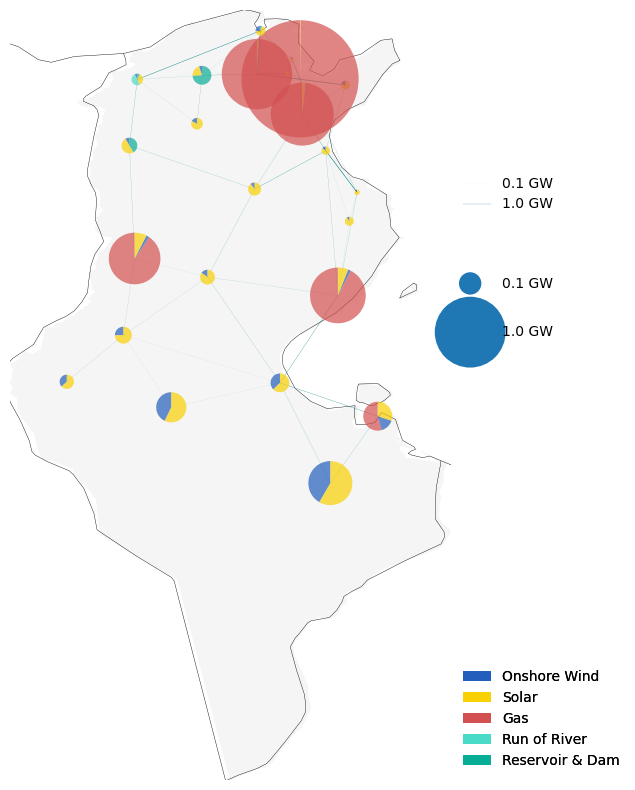

In [446]:
warnings.simplefilter(action='ignore', category=UserWarning)

# -----------------------------
# Carrier mapping (IMPORTANT)
# -----------------------------
CARRIER_AGG_MAP = {
    "CCGT": "gas",   # Combined-Cycle Gas -> gas
}

def map_carrier(c):
    return CARRIER_AGG_MAP.get(c, c)

# -----------------------------
# Ensure all carriers have color and nice_name
# -----------------------------
missing_carriers = [
    'lignite', 'coal', 'solar rooftop', 'oil', 'gas',
    'residential rural solar thermal',
    'residential urban decentral solar thermal',
    'services rural solar thermal',
    'services urban decentral solar thermal',
    'urban central solar thermal',
    'CCGT'
]

carrier_color_mapping = {
    'lignite': 'coal',
    'solar rooftop': 'solar',
    'residential rural solar thermal': 'solar',
    'residential urban decentral solar thermal': 'solar',
    'services rural solar thermal': 'solar',
    'services urban decentral solar thermal': 'solar',
    'urban central solar thermal': 'solar',
    'CCGT': 'gas'
}


def apply_carrier_styling(n, missing_carriers, carrier_color_mapping):
    # create rows if missing
    for c in missing_carriers:
        if c not in n.carriers.index:
            n.carriers.loc[c, :] = np.nan

    # colors
    for c, ref in carrier_color_mapping.items():
        if ref in n.carriers.index and pd.notna(n.carriers.loc[ref, "color"]):
            n.carriers.loc[c, "color"] = n.carriers.loc[ref, "color"]
        else:
            n.carriers.loc[c, "color"] = "gray"

    # nice_names
    if "coal" in n.carriers.index:
        n.carriers.loc["coal", "nice_name"] = "Coal"
    if "oil" in n.carriers.index:
        n.carriers.loc["oil", "nice_name"] = "Oil"
    if "gas" in n.carriers.index:
        n.carriers.loc["gas", "nice_name"] = "Gas"
    if "CCGT" in n.carriers.index:
        # still exists as a carrier, but will be aggregated to 'gas'
        n.carriers.loc["CCGT", "nice_name"] = "Gas"

    for c, ref in carrier_color_mapping.items():
        if c != "CCGT" and ref in n.carriers.index:
            n.carriers.loc[c, "nice_name"] = n.carriers.loc[ref, "nice_name"]

    # fallbacks
    n.carriers["color"] = n.carriers["color"].replace("", np.nan).fillna("gray")
    n.carriers["nice_name"] = (
        n.carriers["nice_name"]
        .replace("", np.nan)
        .fillna(pd.Series(n.carriers.index, index=n.carriers.index))
    )

    # remove load shedding
    for cand in ["load shedding", "Load shedding"]:
        if cand in n.carriers.index:
            n.carriers.drop(cand, inplace=True)

# Apply to both
apply_carrier_styling(uhs, missing_carriers, carrier_color_mapping)
apply_carrier_styling(woUHS, missing_carriers, carrier_color_mapping)

# -----------------------------
# Scale settings
# -----------------------------
bus_scale = 6e3
line_scale = 6e3
bus_sizes = [100, 1000]   # MW
line_sizes = [100, 1000]  # MW

# -----------------------------
# Aggregate generator and storage capacities by bus and *aggregated* carrier
# -----------------------------
gen = uhs.generators[uhs.generators.carrier != "load shedding"].copy()
gen["carrier_agg"] = gen["carrier"].map(map_carrier)
gen = gen.groupby(["bus", "carrier_agg"]).p_nom.sum()

sto = uhs.storage_units.copy()
sto["carrier_agg"] = sto["carrier"].map(map_carrier)
sto = sto.groupby(["bus", "carrier_agg"]).p_nom.sum()

buses = pd.concat([gen, sto])

# -----------------------------
# Plotting
# -----------------------------
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={"projection": ccrs.PlateCarree()})

# Filter Links: only those that lie within GADM regions
link_bus0_base = uhs.links.bus0.str.split("_AC").str[0]
link_bus1_base = uhs.links.bus1.str.split("_AC").str[0]

valid_links = uhs.links[
    link_bus0_base.isin(gadm_shapes.index) &
    link_bus1_base.isin(gadm_shapes.index) &
    (uhs.links.p_nom > 0)
]

links_backup = uhs.links
uhs.links = valid_links

with plt.rc_context({"patch.linewidth": 0.}):
    uhs.plot(
        bus_sizes=buses / bus_scale,
        bus_alpha=0.7,
        line_widths=uhs.lines.s_nom / line_scale,
        link_widths=uhs.links.p_nom / line_scale,
        line_colors="teal",
        ax=ax,
        margin=0.2,
        color_geomap=None,
    )

regions_onshore.plot(
    ax=ax,
    facecolor="whitesmoke",
    edgecolor="white",
    aspect="equal",
    transform=ccrs.PlateCarree(),
    linewidth=0,
)

ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])

# -----------------------------
# Legends
# -----------------------------
legend_kwargs = {"loc": "upper left", "frameon": False}
legend_circles_dict = {"bbox_to_anchor": (1, 0.67), "labelspacing": 2.5, **legend_kwargs}

add_legend_circles(
    ax,
    [s / bus_scale for s in bus_sizes],
    [f"{s / 1000} GW" for s in bus_sizes],
    legend_kw=legend_circles_dict,
)
add_legend_lines(
    ax,
    [s / line_scale for s in line_sizes],
    [f"{s / 1000} GW" for s in line_sizes],
    legend_kw={"bbox_to_anchor": (1, 0.8), **legend_kwargs},
)

# Carrier legend: build from carriers actually used after aggregation
used_carriers_agg = buses.index.get_level_values(1).unique()

colors_legend = []
labels_legend = []
seen = set()

for c in used_carriers_agg:
    # use aggregated carrier's style (e.g., 'gas' not 'CCGT')
    if c in uhs.carriers.index:
        name = uhs.carriers.loc[c, 'nice_name']
        color = uhs.carriers.loc[c, 'color']
    else:
        name = str(c)
        color = "gray"

    val_total = buses.xs(c, level=1).sum() if c in used_carriers_agg else 0

    if name not in seen and val_total > 0:
        seen.add(name)
        colors_legend.append(color)
        labels_legend.append(name)

add_legend_patches(
    ax,
    colors_legend,
    labels_legend,
    legend_kw={"bbox_to_anchor": (1, 0), **legend_kwargs, "loc": "lower left"},
)

fig.tight_layout()
plt.show()

# Restore original links
uhs.links = links_backup
warnings.simplefilter(action='default', category=UserWarning)


#### Current Capacities of Energy Carriers and Usage of Storages

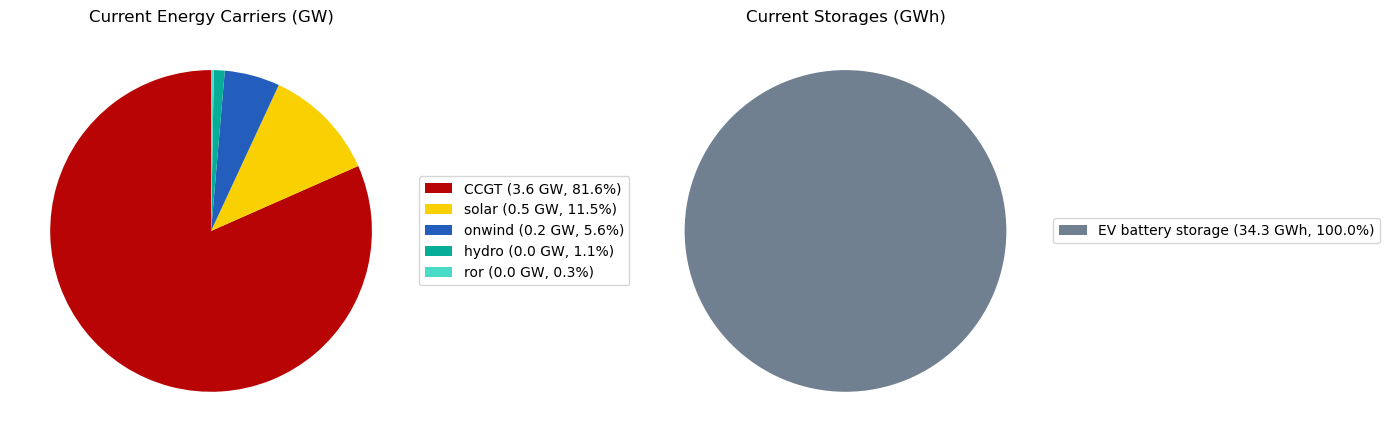

In [447]:
# --- Extract data for current energy carriers ---
energy_carriers = pd.concat([uhs.generators[~uhs.generators.carrier.str.contains("load", case=False)][["carrier", "p_nom"]], uhs.storage_units[["carrier", "p_nom"]]]).groupby("carrier").p_nom.sum().div(1e3).sort_values(ascending=False)


# --- Extract data for current storages ---
storages = (
    uhs.stores.groupby("carrier")
    .e_nom.sum()
    .div(1e3)  # Convert to GWh
    .sort_values(ascending=False)
)

# --- Filter: keep only entries > 0 ---
energy_carriers = energy_carriers[energy_carriers > 0]
storages = storages[storages > 0]
storages = storages[~storages.index.isin(["solid biomass", "biogas"])]

# --- Plotting ---
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# --- Energy carriers ---
energy_colors = [get_color(c) for c in energy_carriers.index]
wedges1, _ = axes[0].pie(
    energy_carriers,
    labels=None,   # no labels directly in the chart
    startangle=90,
    colors=energy_colors
)
axes[0].set_title("Current Energy Carriers (GW)")

# Legend with capacity + share
labels1 = [
    f"{c} ({v:.1f} GW, {100*v/energy_carriers.sum():.1f}%)"
    for c, v in zip(energy_carriers.index, energy_carriers.values)
]
axes[0].legend(
    wedges1,
    labels1,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# --- Storages ---
storage_colors = [get_color(c) for c in storages.index]
wedges2, _ = axes[1].pie(
    storages,
    labels=None,
    startangle=90,
    colors=storage_colors
)
axes[1].set_title("Current Storages (GWh)")

# Legend with capacity + share
labels2 = [
    f"{c} ({v:.1f} GWh, {100*v/storages.sum():.1f}%)"
    for c, v in zip(storages.index, storages.values)
]
axes[1].legend(
    wedges2,
    labels2,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()


#### Where is it possible to build UHS in salt caverns?

In [448]:
def extract_uhs_regions(n, gadm_shapes):
    """
    Extract UHS storage regions and capacities and merge them with GADM shapes.

    Parameters
    ----------
    n : PyPSA Network
        The network containing UHS storage units in uhs.stores.
    gadm_shapes : GeoDataFrame
        GADM regions with column 'GADM_ID' for merging.

    Returns
    -------
    GeoDataFrame
        GADM shapes enriched with:
        - 'Capacity': summed UHS capacity per region
        - 'UHS': boolean flag if region has UHS
    """

    # Filter UHS stores
    n_stores = n.stores[n.stores.carrier == "H2 UHS"].copy()

    # Extract region name from store index
    n_stores["region"] = n_stores.index.str.split("_AC").str[0]

    # Summed installed capacity (MW) by region
    n_capacity = (
        n_stores.groupby("region")["e_nom_opt"]
        .sum()
        .reset_index()
        .rename(columns={"e_nom_opt": "Capacity"})
    )

    # Merge with GADM shapes
    n_gadm = gadm_shapes.merge(
        n_capacity,
        how="left",
        left_on="GADM_ID",
        right_on="region"
    )

    # Mark regions that have UHS
    n_regions = n_stores["region"].unique()
    n_gadm["UHS"] = n_gadm["GADM_ID"].isin(n_regions)

    return n_gadm

uhs_gadm = extract_uhs_regions(uhs, gadm_shapes)
woUHS_gadm = extract_uhs_regions(woUHS, gadm_shapes)

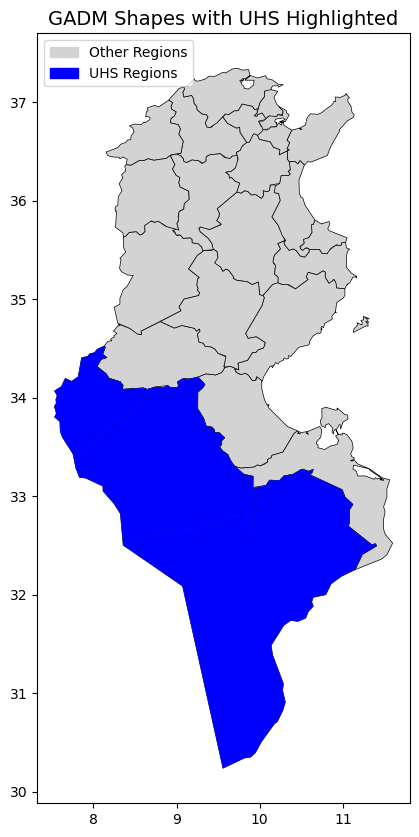

In [449]:
# Plot the map
fig, ax = plt.subplots(figsize=(12, 10))
uhs_gadm.plot(ax=ax, color="lightgrey", edgecolor="black", linewidth=0.5)

# Highlight regions with UHS
if not uhs_gadm[uhs_gadm["UHS"]].empty:
    uhs_gadm[uhs_gadm["UHS"]].plot(ax=ax, color="blue", label="UHS Regions")

# Add legend and title
blue_patch = mpatches.Patch(color='blue', label='UHS Regions')
grey_patch = mpatches.Patch(color='lightgrey', label='Other Regions')
ax.legend(handles=[grey_patch, blue_patch], loc="upper left")
ax.set_title("GADM Shapes with UHS Highlighted", fontsize=14)
plt.show()

#### Which hydrogen infrastructure does the model have in 2050?

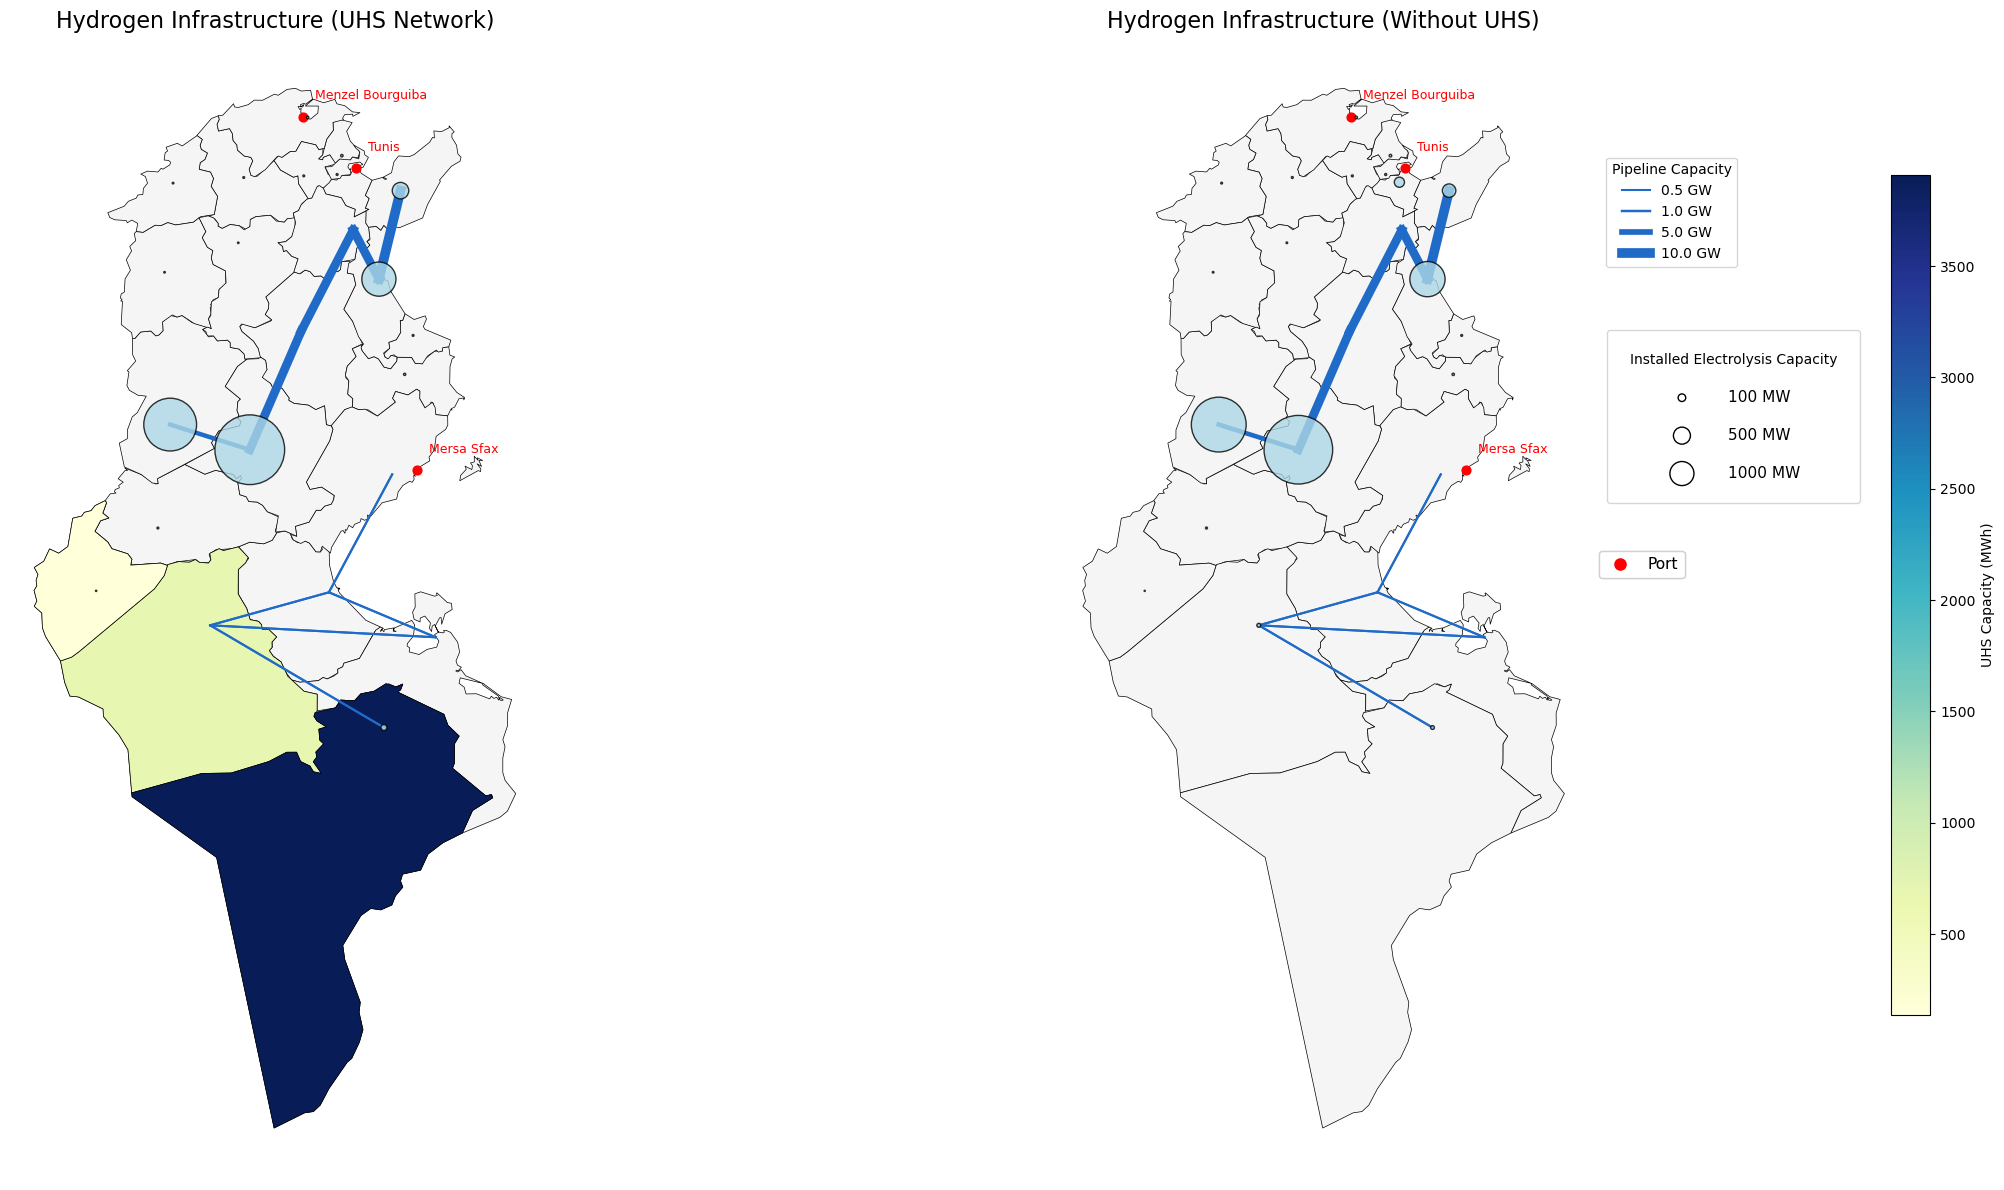

In [450]:
# --- Select, what should be shown ---
show_uhs = True
show_ports = True
show_pipelines = True
show_electrolyzers = True
show_woUHS = True

size_factor = 0.3

warnings.simplefilter(action='ignore')

def plot_infrastructure(ax, gadm, net, ports, show_uhs, show_pipelines,
                        show_electrolyzers, show_ports):
    """
    Draws the full hydrogen infrastructure on a given axis.

    Parameters
    ----------
    ax : matplotlib axis
        The axis to draw on.
    gadm : GeoDataFrame
        Regional shapes (uhs_gadm or woUHS_gadm).
    net : PyPSA network
        The network used for plotting (uhs or woUHS).
    ports : GeoDataFrame
        Port locations.
    show_uhs : bool
        Whether to show UHS capacities.
    show_pipelines : bool
        Whether to show pipelines.
    show_electrolyzers : bool
        Whether to show electrolyzers.
    show_ports : bool
        Whether to show ports.
    """

    # --- Base map ---
    gadm.plot(ax=ax, color="whitesmoke", edgecolor="black", linewidth=0.5)

    # --- UHS Capacities ---
    if show_uhs and "Capacity" in gadm.columns:
        gadm.dropna(subset=["Capacity"]).plot(
            ax=ax,
            column="Capacity",
            cmap="YlGnBu",
            edgecolor="black",
            linewidth=0.5,
            legend=False
        )

    # --- Pipelines ---
    if show_pipelines:
        h2_pipelines = net.links[net.links.carrier.str.contains("H2 pipeline", case=False, na=False)]

        if not h2_pipelines.empty:  # <-- check if there are pipelines
            # Build pipeline geometries
            def build_pipeline_geometry(row):
                x0, y0 = net.buses.loc[row.bus0, ["x", "y"]]
                x1, y1 = net.buses.loc[row.bus1, ["x", "y"]]
                return LineString([(x0, y0), (x1, y1)])

            pipelines = h2_pipelines.copy()
            pipelines["geometry"] = pipelines.apply(build_pipeline_geometry, axis=1)

            lines_gdf = gpd.GeoDataFrame(pipelines, geometry="geometry", crs="EPSG:4326")

            if "p_nom_opt" in lines_gdf.columns:
                capacity = lines_gdf["p_nom_opt"]
                widths = np.interp(capacity, (capacity.min(), capacity.max()), (1.5, 7.0))
            else:
                widths = [1.5] * len(lines_gdf)

            # Draw pipelines
            for geom, w in zip(lines_gdf.geometry, widths):
                ax.plot(*geom.xy, color="#206bc7", linewidth=w, zorder=2)
        else:
            # No pipelines in this network, skip
            pass
        
    # --- Electrolyzers ---
    if show_electrolyzers:
    # Select electrolyzer links
        electrolysis_links = net.links[net.links.carrier == "H2 Electrolysis"]

        if not electrolysis_links.empty:
            # Installed capacity per link [MW]
            p_nom = electrolysis_links["p_nom_opt"]

            # Aggregate by bus (typically bus0)
            bus_map = electrolysis_links.bus0
            p_nom_by_bus = p_nom.groupby(bus_map).sum()  # [MW]

            # Coordinates
            coords = net.buses.loc[p_nom_by_bus.index, ["x", "y"]]

            # Visual scaling only
            sizes = p_nom_by_bus * size_factor

            ax.scatter(
                coords["x"], coords["y"],
                s=sizes,
                c="lightblue",
                alpha=0.8,
                edgecolor="k",
                zorder=3
            )

    # --- Ports ---
    if show_ports:
        # Select ports inside the region shapes
        ports_within = gpd.sjoin(ports, gadm, how="inner", predicate="within")
        ports_within.plot(ax=ax, color="red", markersize=40, marker="o")

        # Draw port labels
        for x, y, name in zip(ports_within.geometry.x,
                              ports_within.geometry.y,
                              ports_within["name"]):
            ax.annotate(name, (x + 0.1, y + 0.1),
                        fontsize=9, color="red", ha="left", va="bottom")

    ax.set_axis_off()

# --- AUTOMATIC: one or two subplots ---
if show_woUHS:
    fig, axes = plt.subplots(1, 2, figsize=(26, 12))
    ax_left = axes[0]
    ax_right = axes[1]

    # --- LEFT PANEL: UHS network ---
    plot_infrastructure(
        ax_left, uhs_gadm, uhs, ports,
        show_uhs, show_pipelines, show_electrolyzers, show_ports
    )
    ax_left.set_title("Hydrogen Infrastructure (UHS Network)", fontsize=16)

    # --- RIGHT PANEL: network without UHS ---
    plot_infrastructure(
        ax_right, woUHS_gadm, woUHS, ports,
        False, show_pipelines, show_electrolyzers, show_ports
    )
    ax_right.set_title("Hydrogen Infrastructure (Without UHS)", fontsize=16)

else:
    # Single plot case
    fig, ax = plt.subplots(figsize=(14, 12))
    plot_infrastructure(
        ax, uhs_gadm, uhs, ports,
        show_uhs, show_pipelines, show_electrolyzers, show_ports
    )
    ax.set_title("Hydrogen Infrastructure", fontsize=16)

# --- Determine global min/max pipeline capacity from both networks ---
def get_pipeline_caps(net):
    df = net.links[net.links.carrier.str.contains("H2 pipeline", case=False, na=False)]
    if df.empty:
        return []
    return df["p_nom_opt"].values

all_caps = np.concatenate([
    get_pipeline_caps(uhs),
    get_pipeline_caps(woUHS)
]) if show_woUHS else get_pipeline_caps(uhs)

if len(all_caps) > 0:
    min_cap = all_caps.min()
    max_cap = all_caps.max()
else:
    min_cap, max_cap = 1, 10


# --- starting y-position for legends
legend_y = 0.9
spacing = 0.11

# Pipeline legend
if show_pipelines:
    legend_caps = [500, 1000, 5000, 10000]
    min_cap, max_cap = min(legend_caps), max(legend_caps)
    legend_widths = np.interp(legend_caps, (min_cap, max_cap), (1.5, 7.0))
    pipeline_handles = [
        mlines.Line2D([], [], color="#206bc7", linewidth=w, label=f"{cap/1000:.1f} GW")
        for cap, w in zip(legend_caps, legend_widths)
    ]
    leg1 = axes[1].legend(handles=pipeline_handles, title="Pipeline Capacity",
                           loc="upper left", bbox_to_anchor=(1.02, legend_y), fontsize=10)
    fig.add_artist(leg1)
    legend_y -= spacing

# Electrolyzer legend
if show_electrolyzers:
    example_caps = [100, 500, 1000]  # MW
    example_sizes = [c * size_factor for c in example_caps]

    bubble_handles = [
        plt.scatter([], [], s=s, facecolors="none", edgecolors="k",
                    label=f"{cap} MW")
        for s, cap in zip(example_sizes, example_caps)
    ]

    leg2 = axes[1].legend(
        handles=bubble_handles,
        title="Installed Electrolysis Capacity",
        loc="upper left",
        bbox_to_anchor=(1.02, 0.75),
        fontsize=11,
        scatterpoints=1,
        handletextpad=2,
        borderpad=1.5,
        labelspacing=1.5
    )

    fig.add_artist(leg2)
    legend_y -= spacing

   

# Ports legend
if show_ports:
    port_handle = [mlines.Line2D([], [], color="red", marker="o", linestyle="None",
                                 markersize=8, label="Port")]
    leg3 = axes[1].legend(handles=port_handle,
        loc="upper left",
        bbox_to_anchor=(1.02, 0.55),
        borderaxespad=0,
        fontsize=11)
    fig.add_artist(leg3)
    legend_y -= spacing

# UHS colorbar
if show_uhs and "Capacity" in uhs_gadm.columns and not uhs_gadm["Capacity"].dropna().empty:
    import matplotlib as mpl
    cmap = mpl.cm.YlGnBu
    norm = mpl.colors.Normalize(vmin=uhs_gadm["Capacity"].min(),
                               vmax=uhs_gadm["Capacity"].max())
    sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    # Create a new axes for the colorbar on the right side
    cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
    cbar = fig.colorbar(sm, cax=cbar_ax)
    cbar.set_label("UHS Capacity (MWh)")


plt.tight_layout()
plt.show()

#### Compare energy system with uhs and without

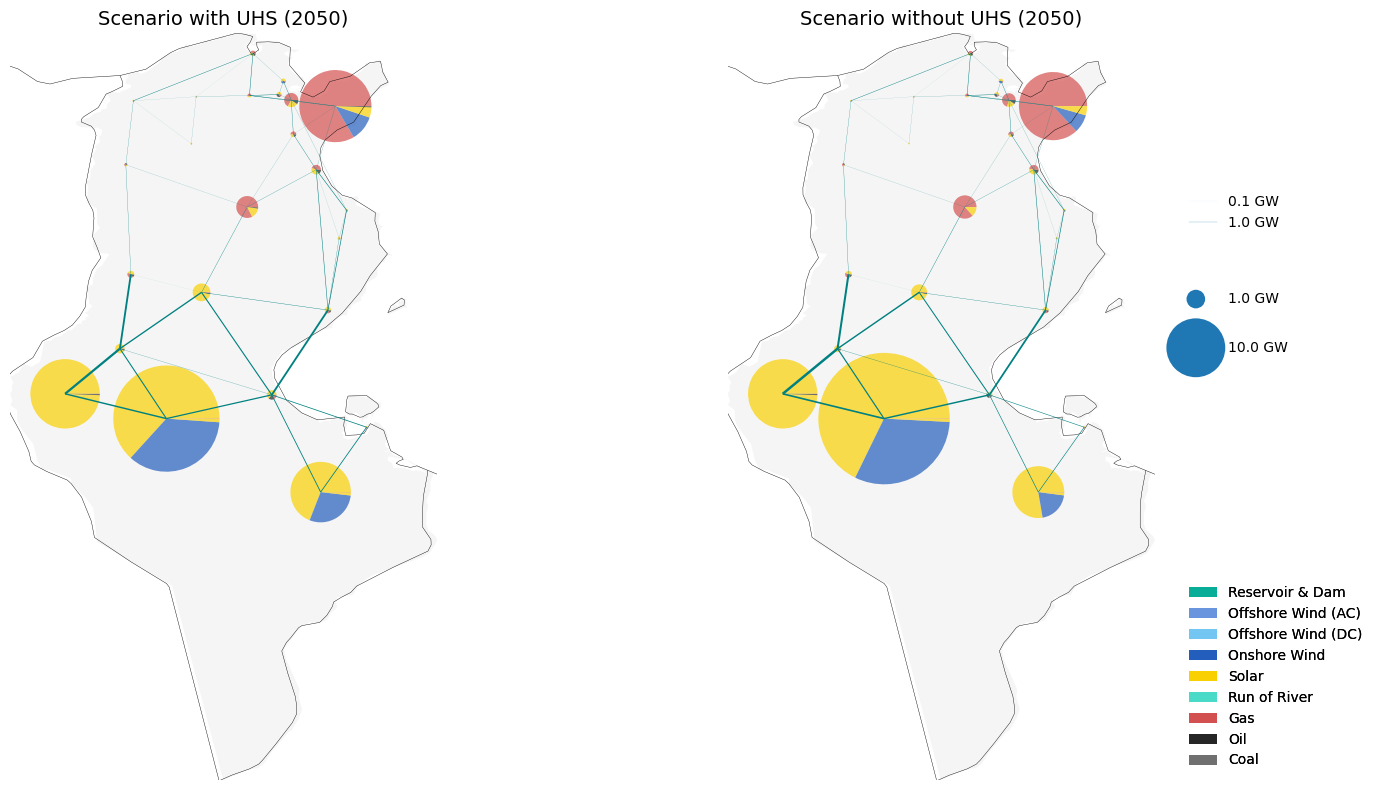

In [451]:
warnings.simplefilter(action="ignore", category=UserWarning)

# -----------------------------
# Carrier preparation (colors + nice_name)
# -----------------------------
carrier_color_mapping = {
    "lignite": "coal",
    "solar rooftop": "solar",
    "residential rural solar thermal": "solar",
    "residential urban decentral solar thermal": "solar",
    "services rural solar thermal": "solar",
    "services urban decentral solar thermal": "solar",
    "urban central solar thermal": "solar",
    "ccgt": "gas",
}

CARRIER_AGG_MAP = {
    "CCGT": "gas",   # Combined-Cycle Gas -> gas
}

def prepare_carriers(n):
    n = n.copy()

    if "color" not in n.carriers.columns:
        n.carriers["color"] = np.nan
    if "nice_name" not in n.carriers.columns:
        n.carriers["nice_name"] = n.carriers.index

    for c, ref in carrier_color_mapping.items():
        if c not in n.carriers.index:
            n.carriers.loc[c, ["color", "nice_name"]] = [np.nan, c.replace("_", " ").capitalize()]

        if ref in n.carriers.index and pd.notna(n.carriers.loc[ref, "color"]) and n.carriers.loc[ref, "color"] != "":
            n.carriers.loc[c, "color"] = n.carriers.loc[ref, "color"]
        else:
            n.carriers.loc[c, "color"] = "gray"

        if c != "ccgt" and ref in n.carriers.index and pd.notna(n.carriers.loc[ref, "nice_name"]):
            n.carriers.loc[c, "nice_name"] = n.carriers.loc[ref, "nice_name"]

    if "coal" in n.carriers.index:
        n.carriers.loc["coal", "nice_name"] = "Coal"
    if "oil" in n.carriers.index:
        n.carriers.loc["oil", "nice_name"] = "Oil"
    if "gas" in n.carriers.index:
        n.carriers.loc["gas", "nice_name"] = "Gas"
    if "ccgt" in n.carriers.index:
        n.carriers.loc["ccgt", "nice_name"] = "Gas"
        if (pd.isna(n.carriers.loc["ccgt", "color"]) or n.carriers.loc["ccgt", "color"] == "") and "gas" in n.carriers.index:
            gcol = n.carriers.loc["gas", "color"]
            if pd.notna(gcol) and gcol != "":
                n.carriers.loc["ccgt", "color"] = gcol

    n.carriers["color"] = n.carriers["color"].replace("", np.nan).fillna("gray")
    n.carriers["nice_name"] = (
        n.carriers["nice_name"]
        .replace("", np.nan)
        .fillna(pd.Series(n.carriers.index, index=n.carriers.index))
    )

    for cand in ["Load shedding", "load shedding"]:
        if cand in n.carriers.index:
            n.carriers = n.carriers.drop(cand)

    return n

# -----------------------------
# Hub mapping via coordinates (generalized)
# -----------------------------
def build_hub_mapping(n, min_cluster_size=2):
    """
    A hub is defined as a coordinate cluster (x,y) that contains at least min_cluster_size buses.
    This automatically excludes global / non-spatial buses that don't share coordinates with others.

    Returns:
      bus_to_hub: Series mapping bus -> hub_id
      hub_coords: DataFrame mapping hub_id -> x,y
    """
    buses_xy = n.buses[["x", "y"]].copy()

    # Ensure numeric and drop missing coordinates
    buses_xy["x"] = pd.to_numeric(buses_xy["x"], errors="coerce")
    buses_xy["y"] = pd.to_numeric(buses_xy["y"], errors="coerce")
    buses_xy = buses_xy.dropna(subset=["x", "y"])

    grouped = buses_xy.groupby(["x", "y"], sort=False)

    bus_to_hub = {}
    hub_coords = {}
    hub_id = 0

    for (x, y), df in grouped:
        if len(df) < min_cluster_size:
            continue
        hid = f"hub_{hub_id}"
        hub_id += 1

        for bus in df.index:
            bus_to_hub[bus] = hid
        hub_coords[hid] = {"x": x, "y": y}

    bus_to_hub = pd.Series(bus_to_hub, dtype="object")
    hub_coords = pd.DataFrame.from_dict(hub_coords, orient="index")

    return bus_to_hub, hub_coords

# -----------------------------
# Aggregation: Generators + StorageUnits by hub & carrier
# -----------------------------
def aggregate_gen_sto_by_hub(n, bus_to_hub):
    parts = []

    if len(n.generators):
        gen = n.generators[n.generators.carrier != "load shedding"].copy()
        gen["hub"] = gen["bus"].map(bus_to_hub)
        gen = gen.dropna(subset=["hub"])

        # <-- entscheidend: carrier für Aggregation mappen
        gen["carrier_agg"] = gen["carrier"].replace(CARRIER_AGG_MAP)

        parts.append(gen.groupby(["hub", "carrier_agg"])["p_nom_opt"].sum())

    if len(n.storage_units):
        sto = n.storage_units.copy()
        sto["hub"] = sto["bus"].map(bus_to_hub)
        sto = sto.dropna(subset=["hub"])

        sto["carrier_agg"] = sto["carrier"].replace(CARRIER_AGG_MAP)

        parts.append(sto.groupby(["hub", "carrier_agg"])["p_nom_opt"].sum())

    if not parts:
        return pd.Series(dtype=float)

    return pd.concat(parts).groupby(level=[0, 1]).sum()

# -----------------------------
# Draw one pie per hub
# -----------------------------
def draw_pies(ax, hubs_caps, hub_coords, carriers_df, bus_scale, alpha=0.7, radius_mode="linear"):
    if hubs_caps.empty or hub_coords.empty:
        return

    hub_totals = hubs_caps.groupby(level=0).sum()

    for hub, total in hub_totals.items():
        if total <= 0 or hub not in hub_coords.index:
            continue

        x, y = hub_coords.loc[hub, ["x", "y"]]

        if radius_mode == "sqrt":
            r = np.sqrt(total / bus_scale)
        else:
            r = total / bus_scale

        s = hubs_caps.xs(hub, level=0)
        s = s[s > 0].sort_values(ascending=False)
        if s.empty:
            continue

        start = 0.0
        denom = s.sum()

        for carrier, val in s.items():
            end = start + (val / denom) * 360.0

            color = "gray"
            if carrier in carriers_df.index and "color" in carriers_df.columns:
                c = carriers_df.loc[carrier, "color"]
                if pd.notna(c) and c != "":
                    color = c

            ax.add_patch(
                Wedge(
                    (x, y), r, start, end,
                    facecolor=color, edgecolor="none", alpha=alpha,
                    transform=ccrs.PlateCarree(),
                )
            )
            start = end

# -----------------------------
# Plot routine: network lines/links via PyPSA, pies drawn manually
# -----------------------------
def plot_network_one_pie_per_location(
    n, ax, title, gadm_shapes, regions_onshore,
    bus_scale, line_scale, min_cluster_size=2, pie_alpha=0.7, pie_radius_mode="linear"
):
    bus_to_hub, hub_coords = build_hub_mapping(n, min_cluster_size=min_cluster_size)
    hubs_caps = aggregate_gen_sto_by_hub(n, bus_to_hub)

    # Suppress PyPSA bus glyphs; we draw pies ourselves
    zero_bus_sizes = pd.Series(0.0, index=n.buses.index)

    # Filter links for plotting ONLY (still excluded from pies)
    link_bus0_base = n.links.bus0.str.split("_AC").str[0]
    link_bus1_base = n.links.bus1.str.split("_AC").str[0]
    valid_links = n.links[
        link_bus0_base.isin(gadm_shapes.index)
        & link_bus1_base.isin(gadm_shapes.index)
        & (n.links.p_nom_opt > 0)
    ]

    n_plot = n.copy()
    n_plot.links = valid_links

    # Background
    regions_onshore.plot(
        ax=ax,
        facecolor="whitesmoke",
        edgecolor="white",
        transform=ccrs.PlateCarree(),
        linewidth=0,
    )

    with plt.rc_context({"patch.linewidth": 0.0}):
        n_plot.plot(
            bus_sizes=zero_bus_sizes,
            bus_alpha=0.0,
            line_widths=n_plot.lines.s_nom_opt / line_scale,
            link_widths=n_plot.links.p_nom_opt / line_scale,
            line_colors="teal",
            ax=ax,
            margin=0.2,
            color_geomap=None,
        )

    ax.set_extent(regions_onshore.total_bounds[[0, 2, 1, 3]])
    ax.set_title(title, fontsize=14)

    # Pies overlay
    draw_pies(
        ax, hubs_caps, hub_coords, n.carriers,
        bus_scale=bus_scale, alpha=pie_alpha, radius_mode=pie_radius_mode
    )

    # Return used carriers for legend building
    used_carriers = set()
    if len(n.generators):
        used_carriers |= set(n.generators.carrier.replace(CARRIER_AGG_MAP))
    if len(n.storage_units):
        used_carriers |= set(n.storage_units.carrier.replace(CARRIER_AGG_MAP))
    used_carriers.discard("load shedding")
    return used_carriers

# -----------------------------
# USER SETTINGS
# -----------------------------
bus_scale  = 6e4
line_scale = 6e3
bus_sizes_legend  = [1000, 10000]  # MW (legend only)
line_sizes_legend = [100, 1000]      # MW (legend only)

# Pie hub definition:
# - min_cluster_size=2 excludes coordinate singletons (typical global buses)
min_cluster_size = 2

# -----------------------------
# Run (two scenarios side-by-side)
# -----------------------------
uhs_p   = prepare_carriers(uhs)
woUHS_p = prepare_carriers(woUHS)

fig, axes = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": ccrs.PlateCarree()})

used_0 = plot_network_one_pie_per_location(
    uhs_p, axes[0], "Scenario with UHS (2050)",
    gadm_shapes, regions_onshore,
    bus_scale, line_scale,
    min_cluster_size=min_cluster_size,
    pie_alpha=0.7,
    pie_radius_mode="linear",
)
used_1 = plot_network_one_pie_per_location(
    woUHS_p, axes[1], "Scenario without UHS (2050)",
    gadm_shapes, regions_onshore,
    bus_scale, line_scale,
    min_cluster_size=min_cluster_size,
    pie_alpha=0.7,
    pie_radius_mode="linear",
)

# -----------------------------
# Legends (reuse your helpers)
# -----------------------------
legend_kwargs = {"loc": "upper left", "frameon": False}

add_legend_circles(
    axes[1],
    [s / bus_scale for s in bus_sizes_legend],
    [f"{s / 1000} GW" for s in bus_sizes_legend],
    legend_kw={"bbox_to_anchor": (1.05, 0.67), "labelspacing": 2.5, **legend_kwargs},
)
add_legend_lines(
    axes[1],
    [s / line_scale for s in line_sizes_legend],
    [f"{s / 1000} GW" for s in line_sizes_legend],
    legend_kw={"bbox_to_anchor": (1.05, 0.8), **legend_kwargs},
)

# Carrier legend: union across both scenarios, from generators + storage_units only
used_carriers = {CARRIER_AGG_MAP.get(c, c) for c in used_0.union(used_1)}

colors_legend, labels_legend, seen = [], [], set()
for c in uhs_p.carriers.index:
    if c not in used_carriers:
        continue

    name = uhs_p.carriers.loc[c, "nice_name"] if "nice_name" in uhs_p.carriers.columns else c
    if pd.isna(name) or name == "":
        name = c.replace("_", " ").capitalize()

    color = uhs_p.carriers.loc[c, "color"] if "color" in uhs_p.carriers.columns else "gray"
    if pd.isna(color) or color == "":
        color = "gray"

    if name not in seen:
        seen.add(name)
        colors_legend.append(color)
        labels_legend.append(name)

add_legend_patches(
    axes[1],
    colors_legend,
    labels_legend,
    legend_kw={"bbox_to_anchor": (1.05, 0), **legend_kwargs, "loc": "lower left"},
)

fig.tight_layout()
plt.show()

warnings.simplefilter(action="default", category=UserWarning)

#### Capacity extension of energy carriers

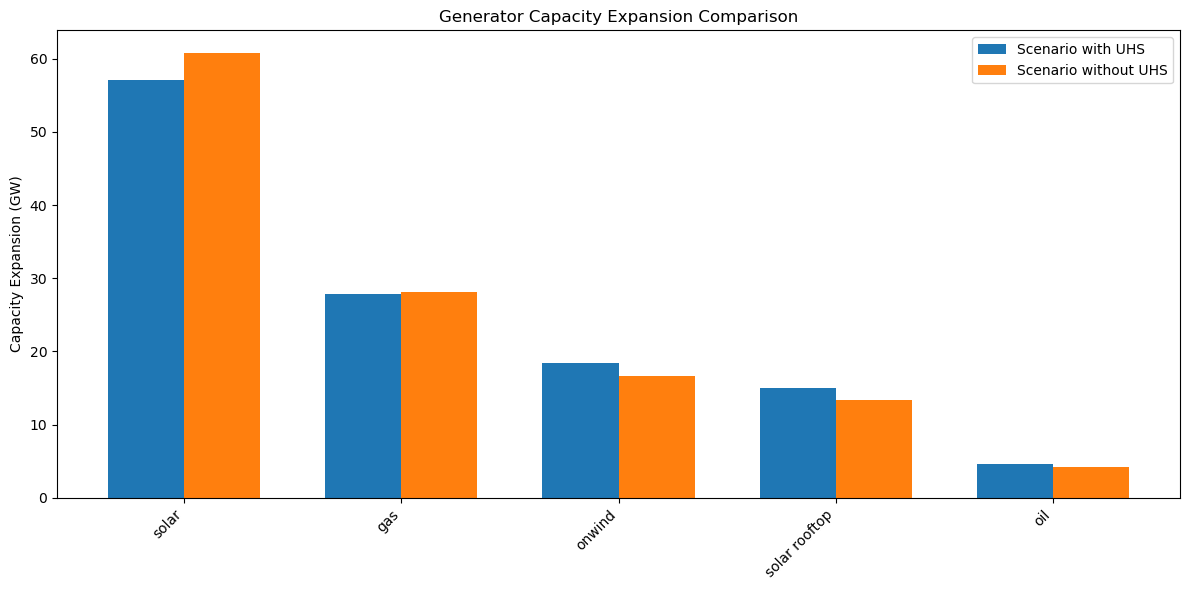

In [452]:

def generator_capacity_expansion(n, to_gw=True, drop_zeros=True, eps=1e-6):
    """
    Returns Series indexed by carrier with expansion = sum(p_nom_opt - p_nom).
    """
    g = n.generators.copy()

    # p_nom exists for extendable and non-extendable gens; fill missing with 0
    if "p_nom" not in g.columns:
        g["p_nom"] = 0.0
    g["p_nom"] = g["p_nom"].fillna(0.0)

    # Optional: exclude load shedding if present
    g = g[g.carrier != "load shedding"]

    exp = (g["p_nom_opt"] - g["p_nom"]).groupby(g["carrier"]).sum()

    if to_gw:
        exp = exp / 1e3  # MW -> GW

    if drop_zeros:
        exp = exp[exp.abs() > eps]

    return exp.sort_values(ascending=False)

# --- Compute expansions ---
exp_uhs   = generator_capacity_expansion(uhs, to_gw=True, drop_zeros=False)
exp_woUHS = generator_capacity_expansion(woUHS, to_gw=True, drop_zeros=False)

# Align carriers across scenarios
df_expansion = pd.concat(
    [exp_uhs.rename("Scenario with UHS"), exp_woUHS.rename("Scenario without UHS")],
    axis=1
).fillna(0.0)

# (Optional) drop carriers with ~0 in both scenarios
eps = 1e-6
df_expansion = df_expansion[(df_expansion.abs().max(axis=1) > eps)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(df_expansion.index))

ax.bar(x - width/2, df_expansion["Scenario with UHS"], width, color=SCENARIO_COLORS["UHS"], label="Scenario with UHS")
ax.bar(x + width/2, df_expansion["Scenario without UHS"], width, color=SCENARIO_COLORS["woUHS"], label="Scenario without UHS")

ax.set_xticks(x)
ax.set_xticklabels(df_expansion.index, rotation=45, ha="right")
ax.set_ylabel("Capacity Expansion (GW)")
ax.set_title("Generator Capacity Expansion Comparison")
ax.legend()

plt.tight_layout()
plt.show()


#### Capacity extension of storages

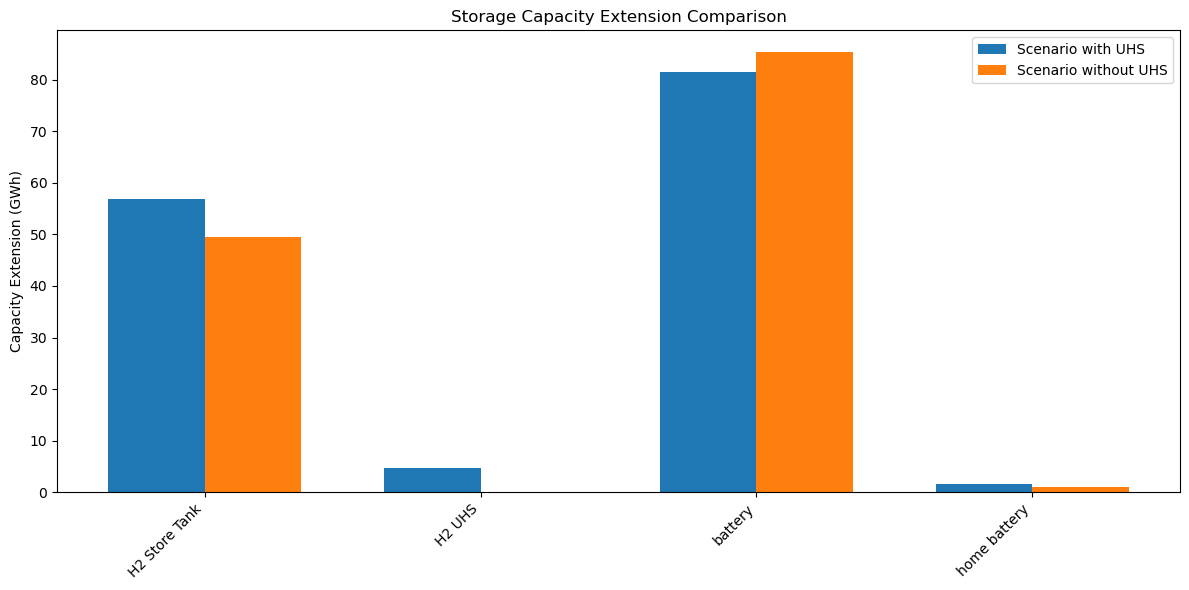

In [453]:
threshold = 1e-1

def storage_extension_GWh(n):
    stores = n.stores.copy()
    # If e_nom exists, compute added capacity; else fall back to e_nom_opt
    if "e_nom" in stores.columns:
        ext_MWh = (stores["e_nom_opt"] - stores["e_nom"]).clip(lower=0)
    else:
        ext_MWh = stores["e_nom_opt"].fillna(0)
    return ext_MWh.groupby(stores["carrier"]).sum() / 1e3  # GWh

uhs_storage_extension = storage_extension_GWh(uhs)
woUHS_storage_extension = storage_extension_GWh(woUHS)

# --- Filter unwanted carriers ---
exclude_carriers = ["gas", "co2", "oil", "solid biomass", "H2", "coal", "biomass", "biogas", "co2 stored"]
uhs_storage_extension = uhs_storage_extension[~uhs_storage_extension.index.isin(exclude_carriers)]
woUHS_storage_extension = woUHS_storage_extension[~woUHS_storage_extension.index.isin(exclude_carriers)]

# Filter out carriers with zero capacity extension
uhs_storage_extension = uhs_storage_extension[uhs_storage_extension > threshold]
woUHS_storage_extension = woUHS_storage_extension[woUHS_storage_extension > threshold]

# Combine for consistent order
all_carriers = sorted(set(uhs_storage_extension.index) | set(woUHS_storage_extension.index))
uhs_storage_extension = uhs_storage_extension.reindex(all_carriers, fill_value=0)
woUHS_storage_extension = woUHS_storage_extension.reindex(all_carriers, fill_value=0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35  # Width of the bars
x = np.arange(len(all_carriers))  # Carrier positions on x-axis

# Bars for UHS scenario
ax.bar(x - width/2, uhs_storage_extension, width, color=SCENARIO_COLORS["UHS"], label="Scenario with UHS")

# Bars for woUHS scenario
ax.bar(x + width/2, woUHS_storage_extension, width, color=SCENARIO_COLORS["woUHS"], label="Scenario without UHS")

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(all_carriers, rotation=45, ha="right")
ax.set_ylabel("Capacity Extension (GWh)")
ax.set_title("Storage Capacity Extension Comparison")

# Legend
ax.legend()

plt.tight_layout()
plt.show()

#### Hydrogen related extension

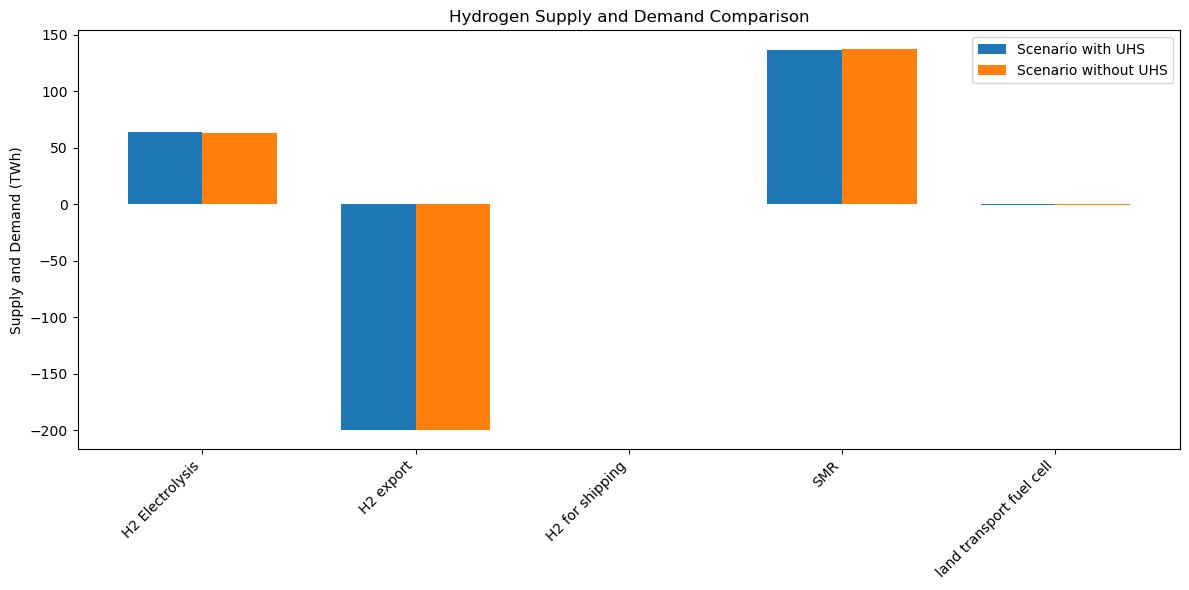

In [454]:
threshold = 1e-1
# --- Extract hydrogen-related capacities ---#
# Extract hydrogen-related energy balances for UHS and woUHS
uhs_hydrogen_balance = uhs.statistics.energy_balance().loc[:, :, "H2"].groupby("carrier").sum().div(1e6)  # Convert to TWh
woUHS_hydrogen_balance = woUHS.statistics.energy_balance().loc[:, :, "H2"].groupby("carrier").sum().div(1e6)  # Convert to TWh
# Combine for consistent order
all_hydrogen_carriers = sorted(set(uhs_hydrogen_balance.index) | set(woUHS_hydrogen_balance.index))
uhs_hydrogen_balance = uhs_hydrogen_balance.reindex(all_hydrogen_carriers, fill_value=0)
woUHS_hydrogen_balance = woUHS_hydrogen_balance.reindex(all_hydrogen_carriers, fill_value=0)

# --- Filter: keep only carriers with actual (non-zero) energy flows in either scenario ---
combined_balance = uhs_hydrogen_balance.abs() + woUHS_hydrogen_balance.abs()

mask = combined_balance > threshold

uhs_hydrogen_balance = uhs_hydrogen_balance[mask]
woUHS_hydrogen_balance = woUHS_hydrogen_balance[mask]
all_hydrogen_carriers = uhs_hydrogen_balance.index.tolist()

# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35  # Width of the bars
x = np.arange(len(all_hydrogen_carriers))  # Carrier positions on x-axis

# Bars for UHS scenario
ax.bar(x - width/2, uhs_hydrogen_balance, width, color=SCENARIO_COLORS["UHS"], label="Scenario with UHS")

# Bars for woUHS scenario
ax.bar(x + width/2, woUHS_hydrogen_balance, width, color=SCENARIO_COLORS["woUHS"], label="Scenario without UHS")

# Axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(all_hydrogen_carriers, rotation=45, ha="right")
ax.set_ylabel("Supply and Demand (TWh)")
ax.set_title("Hydrogen Supply and Demand Comparison")

# Legend
ax.legend()

plt.tight_layout()
plt.show()

##### Energy Balance

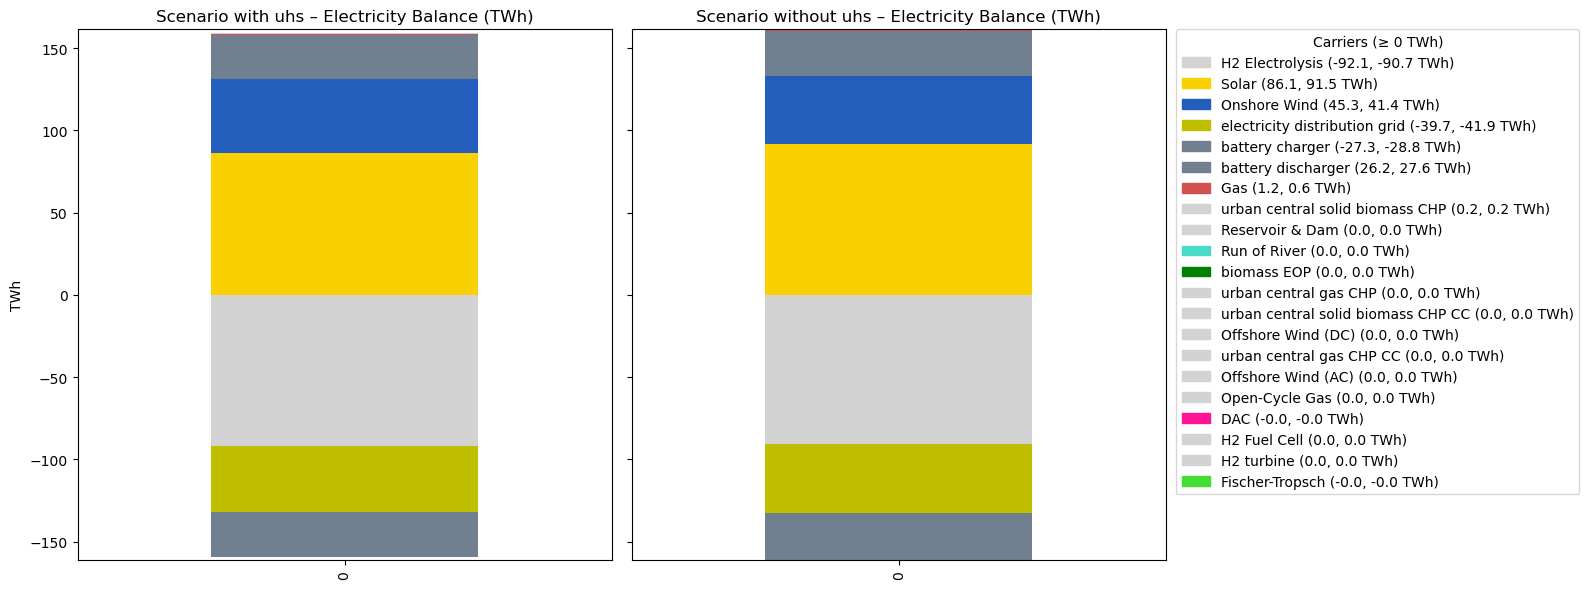

In [455]:
# =========================
# User-adjustable threshold
# =========================
THRESHOLD_TWH = 0   # hide carriers with |value| < 0.1 TWh in BOTH scenarios
LEGEND_THRESHOLD_TWH = 0  # show only carriers >= 10 TWh in legend

def compute_energy_balance(n: pypsa.Network) -> pd.Series:
    rename_cols = {
        "-": "Load",
        "load": "load shedding",
    }

    # Aggregate energy balance by carrier and convert MWh -> TWh
    eb = (
        n.statistics.energy_balance()
        .loc[:, :, "Ac"]
        .groupby("carrier")
        .sum()
        .div(1e6)  # MWh -> TWh
        .rename(index=rename_cols)
    )

    # If result is a DataFrame (multiple columns), reduce to a single number per carrier
    if isinstance(eb, pd.DataFrame):
        eb = eb.sum(axis=1)

    return eb.fillna(0.0)


# --- Compute data (as Series) ---
s_uhs = compute_energy_balance(uhs)
s_woUHS = compute_energy_balance(woUHS)

# Harmonize index (carriers) between scenarios
all_carriers = sorted(set(s_uhs.index) | set(s_woUHS.index))
s_uhs = s_uhs.reindex(all_carriers, fill_value=0.0)
s_woUHS = s_woUHS.reindex(all_carriers, fill_value=0.0)

# --- Apply threshold: keep only carriers with meaningful flows in either scenario ---
mask = (s_uhs.abs() >= THRESHOLD_TWH) | (s_woUHS.abs() >= THRESHOLD_TWH)
s_uhs = s_uhs.loc[mask]
s_woUHS = s_woUHS.loc[mask]

# Sort carriers by combined absolute magnitude (more stable than raw sum if signs mix)
order = (s_uhs.abs() + s_woUHS.abs()).sort_values(ascending=False).index.tolist()
s_uhs = s_uhs.reindex(order)
s_woUHS = s_woUHS.reindex(order)

# Convert to 1-row DataFrames for your bar plotting style
df_uhs = s_uhs.to_frame().T
df_woUHS = s_woUHS.to_frame().T

# --- Assign colors ---
colors = [get_color(c) for c in order]

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

df_uhs.plot.bar(
    stacked=True,
    ax=axes[0],
    legend=False,
    title="Scenario with uhs – Electricity Balance (TWh)",
    color=colors
)
axes[0].set_xlabel("")
axes[0].set_ylabel("TWh")

df_woUHS.plot.bar(
    stacked=True,
    ax=axes[1],
    legend=False,
    title="Scenario without uhs – Electricity Balance (TWh)",
    color=colors
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# --- Manually build the legend (threshold-controlled) ---
labels, handles = [], []
for c, col in zip(order, colors):
    val_uhs = float(df_uhs.iloc[0][c])
    val_woUHS = float(df_woUHS.iloc[0][c])

    if (abs(val_uhs) >= LEGEND_THRESHOLD_TWH) or (abs(val_woUHS) >= LEGEND_THRESHOLD_TWH):
        labels.append(f"{c} ({val_uhs:.1f}, {val_woUHS:.1f} TWh)")
        handles.append(plt.Rectangle((0, 0), 1, 1, color=col))

axes[1].legend(
    handles,
    labels,
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    title=f"Carriers (≥ {LEGEND_THRESHOLD_TWH} TWh)"
)

plt.tight_layout()
plt.show()


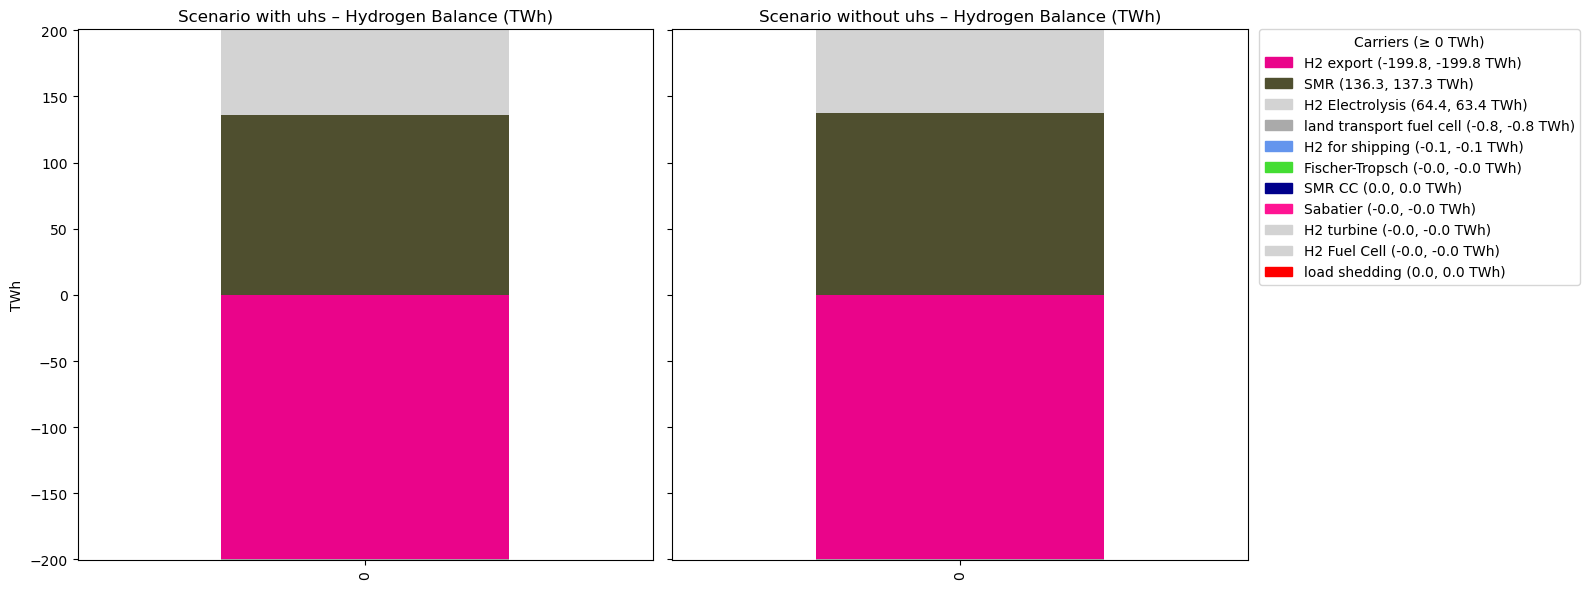

In [456]:
# =========================
# User-adjustable threshold
# =========================
THRESHOLD_TWH = 0   # hide carriers with |value| < 0.1 TWh in BOTH scenarios
LEGEND_THRESHOLD_TWH = 0  # show only carriers >= 10 TWh in legend

def compute_energy_balance(n: pypsa.Network) -> pd.Series:
    rename_cols = {
        "-": "Load",
        "load": "load shedding",
    }

    # Aggregate energy balance by carrier and convert MWh -> TWh
    eb = (
        n.statistics.energy_balance()
        .loc[:, :, "H2"]
        .groupby("carrier")
        .sum()
        .div(1e6)  # MWh -> TWh
        .rename(index=rename_cols)
    )

    # If result is a DataFrame (multiple columns), reduce to a single number per carrier
    if isinstance(eb, pd.DataFrame):
        eb = eb.sum(axis=1)

    return eb.fillna(0.0)


# --- Compute data (as Series) ---
s_uhs = compute_energy_balance(uhs)
s_woUHS = compute_energy_balance(woUHS)

# Harmonize index (carriers) between scenarios
all_carriers = sorted(set(s_uhs.index) | set(s_woUHS.index))
s_uhs = s_uhs.reindex(all_carriers, fill_value=0.0)
s_woUHS = s_woUHS.reindex(all_carriers, fill_value=0.0)

# --- Apply threshold: keep only carriers with meaningful flows in either scenario ---
mask = (s_uhs.abs() >= THRESHOLD_TWH) | (s_woUHS.abs() >= THRESHOLD_TWH)
s_uhs = s_uhs.loc[mask]
s_woUHS = s_woUHS.loc[mask]

# Sort carriers by combined absolute magnitude (more stable than raw sum if signs mix)
order = (s_uhs.abs() + s_woUHS.abs()).sort_values(ascending=False).index.tolist()
s_uhs = s_uhs.reindex(order)
s_woUHS = s_woUHS.reindex(order)

# Convert to 1-row DataFrames for your bar plotting style
df_uhs = s_uhs.to_frame().T
df_woUHS = s_woUHS.to_frame().T

# --- Assign colors ---
colors = [get_color(c) for c in order]

# --- Plot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

df_uhs.plot.bar(
    stacked=True,
    ax=axes[0],
    legend=False,
    title="Scenario with uhs – Hydrogen Balance (TWh)",
    color=colors
)
axes[0].set_xlabel("")
axes[0].set_ylabel("TWh")

df_woUHS.plot.bar(
    stacked=True,
    ax=axes[1],
    legend=False,
    title="Scenario without uhs – Hydrogen Balance (TWh)",
    color=colors
)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# --- Manually build the legend (threshold-controlled) ---
labels, handles = [], []
for c, col in zip(order, colors):
    val_uhs = float(df_uhs.iloc[0][c])
    val_woUHS = float(df_woUHS.iloc[0][c])

    if (abs(val_uhs) >= LEGEND_THRESHOLD_TWH) or (abs(val_woUHS) >= LEGEND_THRESHOLD_TWH):
        labels.append(f"{c} ({val_uhs:.1f}, {val_woUHS:.1f} TWh)")
        handles.append(plt.Rectangle((0, 0), 1, 1, color=col))

axes[1].legend(
    handles,
    labels,
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0,
    title=f"Carriers (≥ {LEGEND_THRESHOLD_TWH} TWh)"
)

plt.tight_layout()
plt.show()


##### Heating Supply Distribution

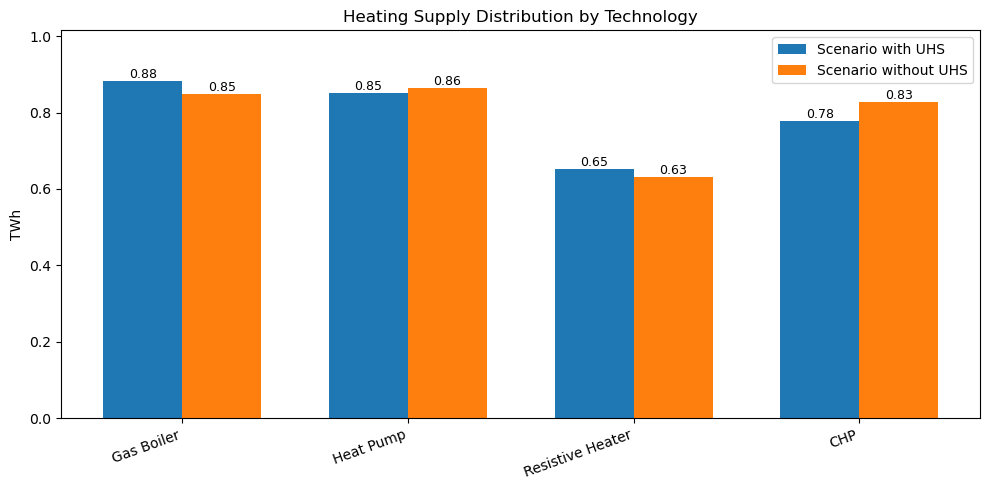

In [457]:
logging.getLogger("pypsa.statistics").setLevel(logging.ERROR)
warnings.simplefilter(action='ignore', category=UserWarning)

# Adjustable settings
heating_map = {
    "Gas Boiler": ["gas boiler", "boiler"],
    "Heat Pump": ["heat pump"],
    "Resistive Heater": ["resistive heater", "resistive"],
    "CHP": ["chp"],
}

TO_TWH = True  # False -> MWh

def heating_distribution(n: pypsa.Network, tech_map=heating_map) -> pd.Series:
    s = (
        n.statistics.supply(comps=["Link"], aggregate_time="sum")
        .loc[lambda x: x.index.get_level_values("carrier")
             .str.contains("heat|boiler|pump|chp", case=False, na=False)]
    )

    carriers = pd.Index(s.index.get_level_values("carrier"))

    def sum_for_patterns(patterns) -> float:
        mask = np.zeros(len(carriers), dtype=bool)
        for p in patterns:
            mask |= np.asarray(carriers.str.contains(p, case=False, na=False))
        if not mask.any():
            return 0.0
        return float(s.loc[mask].sum(numeric_only=True).sum())

    data = {label: sum_for_patterns(patterns) for label, patterns in tech_map.items()}
    return pd.Series(data, index=list(tech_map.keys())).fillna(0.0)


# --- Compute totals ---
uhs_mwh = heating_distribution(uhs)
woUHS_mwh = heating_distribution(woUHS)

df = pd.DataFrame({
    "Scenario with UHS": uhs_mwh,
    "Scenario without UHS": woUHS_mwh
})

# Unit conversion
if TO_TWH:
    df = df / 1e6
    y_label = "TWh"
    value_fmt = "{:.2f}"
else:
    y_label = "MWh"
    value_fmt = "{:,.0f}"
# --- Plot: grouped bar chart ---
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(df.index))
width = 0.35

ax.bar(
    x - width / 2,
    df["Scenario with UHS"].values,
    width,
    label="Scenario with UHS",
    color=SCENARIO_COLORS["UHS"],
)

ax.bar(
    x + width / 2,
    df["Scenario without UHS"].values,
    width,
    label="Scenario without UHS",
    color=SCENARIO_COLORS["woUHS"],
)

ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=20, ha="right")
ax.set_ylabel(y_label)
ax.set_title("Heating Supply Distribution by Technology")
ax.legend()

# --- Y-axis alignment ---
ymax = max(df.values.max(), 1e-9)
ax.set_ylim(0, ymax * 1.15)

# --- Value labels ---
for i, tech in enumerate(df.index):
    v1 = df.loc[tech, "Scenario with UHS"]
    v2 = df.loc[tech, "Scenario without UHS"]

    ax.text(i - width / 2, v1, value_fmt.format(v1),
            ha="center", va="bottom", fontsize=9)
    ax.text(i + width / 2, v2, value_fmt.format(v2),
            ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

warnings.simplefilter(action='default', category=UserWarning)


#### Hydrogen prices

##### LCOH

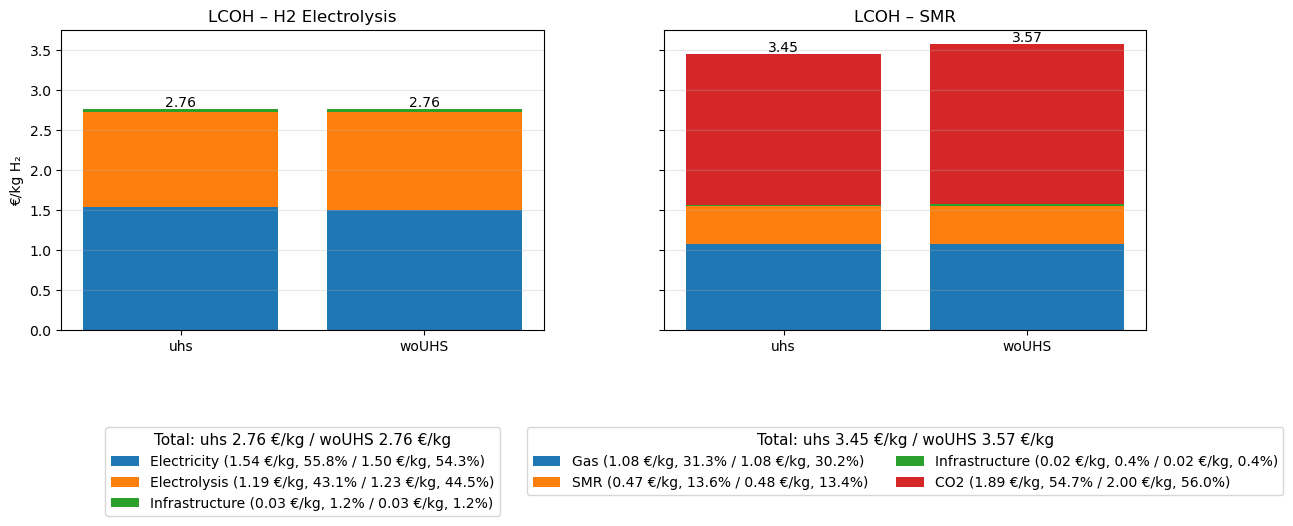

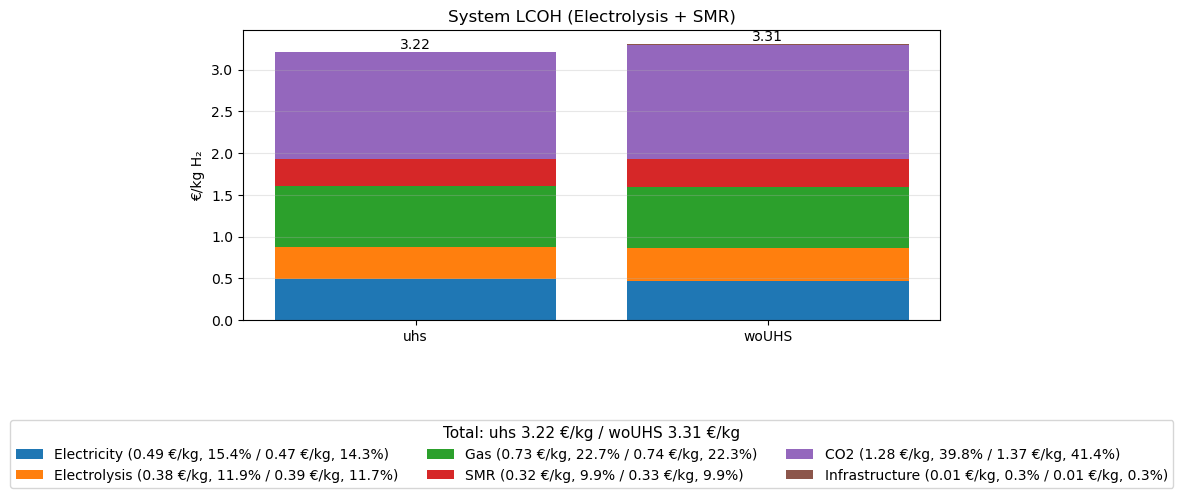

In [458]:
def snapshot_weights(net) -> pd.Series:
    """Return snapshot weights (defaults to 1.0 if not available)."""
    sw = getattr(net, "snapshot_weightings", None)
    if sw is not None:
        try:
            if "generators" in sw:
                return sw["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)


def capex_links(net, carriers) -> float:
    """Annualized CAPEX contribution for link carriers (already annualized in capital_cost)."""
    links = net.links[net.links.carrier.isin(carriers)]
    if links.empty:
        return 0.0
    p_nom = links["p_nom_opt"] if "p_nom_opt" in links.columns else links["p_nom"]
    return float((p_nom * links["capital_cost"]).fillna(0.0).sum())


def vopex_links(net, carriers) -> float:
    """Variable OPEX for link carriers using marginal_cost * annual energy throughput."""
    links = net.links[net.links.carrier.isin(carriers)]
    if links.empty:
        return 0.0
    w = snapshot_weights(net)
    mc = links["marginal_cost"].fillna(0.0)
    p0 = net.links_t.p0[links.index]  # snapshots x links (MW)
    e_mwh = (p0.abs().mul(w, axis=0)).sum()  # MWh per link-year
    return float((e_mwh * mc).sum())


def annual_h2_output_kg_from_link_p1(net, carrier: str, h2_lhv_kwh_per_kg: float = 33.33) -> float:
    """Annual H2 output [kg] from links with H2 on bus1 using p1 time series."""
    idx = net.links.index[net.links.carrier == carrier]
    if len(idx) == 0:
        return 0.0
    w = snapshot_weights(net)
    p1 = net.links_t.p1[idx]  # MW (sign may vary)
    e_mwh = (p1.abs().mul(w, axis=0)).sum().sum()
    return float(e_mwh) * 1000.0 / h2_lhv_kwh_per_kg


def bus_price_cost_for_link_port(
    net,
    link_idx,
    port: str = "p0",
    bus_col: str = "bus0",
    price_sign: float = +1.0,
) -> float:
    """
    Annual cost [€] = sum_t (consumption_MW * weight * (price_sign * marginal_price(bus))).

    Sign-robust: chooses p vs -p such that aggregate positive consumption is maximized.
    price_sign flips the sign if the dual variable convention is inverted (CO2 in PyPSA-Earth).
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found (no dual prices stored).")

    w = snapshot_weights(net)
    p = getattr(net.links_t, port)[link_idx]  # snapshots x links

    cons_pos = (p.clip(lower=0).mul(w, axis=0)).sum().sum()
    cons_neg = ((-p).clip(lower=0).mul(w, axis=0)).sum().sum()
    cons = p.clip(lower=0) if cons_pos >= cons_neg else (-p).clip(lower=0)

    buses = net.links.loc[link_idx, bus_col]
    price_mat = pd.DataFrame({lid: net.buses_t.marginal_price[bus] for lid, bus in buses.items()})
    return float(((cons.mul(w, axis=0)) * (price_sign * price_mat)).sum().sum())


# ============================================================
# Technology cost components
# ============================================================

def electricity_cost_for_electrolysis(net, electrolysis_carrier: str = "H2 Electrolysis") -> float:
    """Annual electricity cost [€] for electrolysis priced at bus0."""
    idx = net.links.index[net.links.carrier == electrolysis_carrier]
    if len(idx) == 0:
        return 0.0
    return bus_price_cost_for_link_port(net, idx, port="p0", bus_col="bus0", price_sign=+1.0)


def gas_cost_for_smr(net, smr_carrier: str = "SMR") -> float:
    """Annual gas cost [€] for SMR priced at bus0."""
    idx = net.links.index[net.links.carrier == smr_carrier]
    if len(idx) == 0:
        return 0.0
    return bus_price_cost_for_link_port(net, idx, port="p0", bus_col="bus0", price_sign=+1.0)


def co2_cost_for_smr(net, smr_carrier: str = "SMR") -> float:
    """
    Annual CO2 cost [€] for SMR priced at bus2 (co2 atmosphere).

    PyPSA-Earth convention: Carrier 'co2' has co2_emissions = -1.0,
    which flips the sign of the dual. Hence price_sign = -1.0.
    """
    idx = net.links.index[net.links.carrier == smr_carrier]
    if len(idx) == 0 or not hasattr(net.links_t, "p2"):
        return 0.0
    return bus_price_cost_for_link_port(net, idx, port="p2", bus_col="bus2", price_sign=-1.0)


# ============================================================
# Infrastructure definition
# ============================================================

def infra_carriers(
    net,
    electrolysis_carrier: str = "H2 Electrolysis",
    smr_carrier: str = "SMR",
    include_all_h2_infrastructure: bool = True,
):
    """
    Infrastructure carriers: all H2-like link carriers except production technologies,
    plus explicit H2 pipelines.
    """
    pipelines = {"H2 pipeline"}
    if include_all_h2_infrastructure:
        h2_like = set(
            net.links.loc[
                net.links.carrier.astype(str).str.contains("H2", case=False, na=False),
                "carrier",
            ].unique()
        )
        return (h2_like - {electrolysis_carrier} - {smr_carrier}) | pipelines
    return set(pipelines)


def infra_cost_annual(
    net,
    electrolysis_carrier: str = "H2 Electrolysis",
    smr_carrier: str = "SMR",
    include_all_h2_infrastructure: bool = True,
) -> float:
    """Annual infrastructure cost [€] (CAPEX + variable OPEX)."""
    infra = infra_carriers(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)
    return capex_links(net, infra) + vopex_links(net, infra)


# ============================================================
# LCOH breakdowns (€/kg H2)
# ============================================================

def lcoh_electrolysis_breakdown(
    net,
    electrolysis_carrier: str = "H2 Electrolysis",
    smr_carrier: str = "SMR",
    include_all_h2_infrastructure: bool = True,
) -> dict:
    """Electrolysis LCOH breakdown: Electricity, Electrolysis, Infrastructure."""
    h2_kg = annual_h2_output_kg_from_link_p1(net, electrolysis_carrier)
    if h2_kg <= 0:
        return {"Electricity": 0.0, "Electrolysis": 0.0, "Infrastructure": 0.0}

    elec = electricity_cost_for_electrolysis(net, electrolysis_carrier)
    el = capex_links(net, {electrolysis_carrier}) + vopex_links(net, {electrolysis_carrier})
    infra = infra_cost_annual(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {"Electricity": elec / h2_kg, "Electrolysis": el / h2_kg, "Infrastructure": infra / h2_kg}


def lcoh_smr_breakdown(
    net,
    smr_carrier: str = "SMR",
    electrolysis_carrier: str = "H2 Electrolysis",
    include_all_h2_infrastructure: bool = True,
) -> dict:
    """SMR LCOH breakdown: Gas, SMR, Infrastructure, CO2."""
    h2_kg = annual_h2_output_kg_from_link_p1(net, smr_carrier)
    if h2_kg <= 0:
        return {"Gas": 0.0, "SMR": 0.0, "Infrastructure": 0.0, "CO2": 0.0}

    gas = gas_cost_for_smr(net, smr_carrier)
    co2 = co2_cost_for_smr(net, smr_carrier)
    smr = capex_links(net, {smr_carrier}) + vopex_links(net, {smr_carrier})
    infra = infra_cost_annual(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {"Gas": gas / h2_kg, "SMR": smr / h2_kg, "Infrastructure": infra / h2_kg, "CO2": co2 / h2_kg}


def system_lcoh_breakdown(
    net,
    electrolysis_carrier: str = "H2 Electrolysis",
    smr_carrier: str = "SMR",
    include_all_h2_infrastructure: bool = True,
) -> dict:
    """System-average LCOH (weighted by total H2 output)."""
    h2_el = annual_h2_output_kg_from_link_p1(net, electrolysis_carrier)
    h2_smr = annual_h2_output_kg_from_link_p1(net, smr_carrier)
    h2_total = h2_el + h2_smr

    if h2_total <= 0:
        return {"Electricity": 0.0, "Electrolysis": 0.0, "Gas": 0.0, "SMR": 0.0, "CO2": 0.0, "Infrastructure": 0.0}

    elec = electricity_cost_for_electrolysis(net, electrolysis_carrier)
    el = capex_links(net, {electrolysis_carrier}) + vopex_links(net, {electrolysis_carrier})

    gas = gas_cost_for_smr(net, smr_carrier)
    co2 = co2_cost_for_smr(net, smr_carrier)
    smr = capex_links(net, {smr_carrier}) + vopex_links(net, {smr_carrier})

    infra = infra_cost_annual(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {
        "Electricity": elec / h2_total,
        "Electrolysis": el / h2_total,
        "Gas": gas / h2_total,
        "SMR": smr / h2_total,
        "CO2": co2 / h2_total,
        "Infrastructure": infra / h2_total,
    }


# ============================================================
# Plotting (legends below axes)
# ============================================================

def legend_with_values_and_shares_below(
    ax,
    df: pd.DataFrame,
    order: list,
    title_prefix: str = "Total",
    ncol: int | None = None,
    y_offset: float = -0.28,
    fontsize: int = 10,
    title_fontsize: int = 11,
):
    """
    Place a legend below the axis with values and shares for both scenarios.
    df index: categories; df columns: ['uhs', 'woUHS'].
    """
    total_uhs = float(df["uhs"].sum())
    total_wo = float(df["woUHS"].sum())

    handles, labels = [], []
    for i, cat in enumerate(order):
        u = float(df.loc[cat, "uhs"])
        w = float(df.loc[cat, "woUHS"])
        u_pct = 100 * u / total_uhs if total_uhs > 0 else 0.0
        w_pct = 100 * w / total_wo if total_wo > 0 else 0.0

        handles.append(ax.patches[i * 2])  # first bar patch of this stack
        labels.append(f"{cat} ({u:.2f} €/kg, {u_pct:.1f}% / {w:.2f} €/kg, {w_pct:.1f}%)")

    if ncol is None:
        ncol = min(len(order), 3)

    ax.legend(
        handles,
        labels,
        title=f"{title_prefix}: uhs {total_uhs:.2f} €/kg / woUHS {total_wo:.2f} €/kg",
        loc="upper center",
        bbox_to_anchor=(0.5, y_offset),
        ncol=ncol,
        frameon=True,
        fontsize=fontsize,
        title_fontsize=title_fontsize,
    )


def plot_stacked_two_scenarios(
    ax,
    data_uhs: dict,
    data_wo: dict,
    categories: list,
    title: str,
    ylabel: str | None = None,
):
    """Draw a stacked bar chart for uhs vs woUHS with totals annotated."""
    df = pd.DataFrame(
        {
            "uhs": pd.Series(data_uhs).reindex(categories).fillna(0.0),
            "woUHS": pd.Series(data_wo).reindex(categories).fillna(0.0),
        }
    )

    x = np.arange(2)
    bottom = np.zeros(2)

    for cat in categories:
        vals = df.loc[cat, ["uhs", "woUHS"]].values.astype(float)
        ax.bar(x, vals, bottom=bottom)
        bottom += vals

    ax.set_xticks(x)
    ax.set_xticklabels(["uhs", "woUHS"])
    ax.set_title(title)
    ax.grid(axis="y", alpha=0.30)
    if ylabel:
        ax.set_ylabel(ylabel)

    ax.text(0, bottom[0], f"{bottom[0]:.2f}", ha="center", va="bottom")
    ax.text(1, bottom[1], f"{bottom[1]:.2f}", ha="center", va="bottom")

    return df


# ============================================================
# Run (expects: uhs and woUHS networks exist)
# ============================================================

# --- Compute breakdowns
el_uhs = lcoh_electrolysis_breakdown(uhs, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)
el_wo = lcoh_electrolysis_breakdown(woUHS, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)

smr_uhs = lcoh_smr_breakdown(uhs, smr_carrier="SMR", electrolysis_carrier="H2 Electrolysis", include_all_h2_infrastructure=True)
smr_wo = lcoh_smr_breakdown(woUHS, smr_carrier="SMR", electrolysis_carrier="H2 Electrolysis", include_all_h2_infrastructure=True)

sys_uhs = system_lcoh_breakdown(uhs, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)
sys_wo = system_lcoh_breakdown(woUHS, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)

# ============================================================
# Plot 1: two subplots (legends below each subplot)
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

cats_el = ["Electricity", "Electrolysis", "Infrastructure"]
df_el = plot_stacked_two_scenarios(
    axes[0], el_uhs, el_wo, cats_el,
    title="LCOH – H2 Electrolysis",
    ylabel="€/kg H₂",
)
legend_with_values_and_shares_below(axes[0], df_el, cats_el, ncol=1, y_offset=-0.30)

cats_smr = ["Gas", "SMR", "Infrastructure", "CO2"]
df_smr = plot_stacked_two_scenarios(
    axes[1], smr_uhs, smr_wo, cats_smr,
    title="LCOH – SMR",
    ylabel=None,
)
legend_with_values_and_shares_below(axes[1], df_smr, cats_smr, ncol=2, y_offset=-0.30)

# Make room for legends beneath subplots
fig.subplots_adjust(bottom=0.28, wspace=0.25)
plt.show()

# ============================================================
# Plot 2: system plot (legend below)
# ============================================================
fig, ax = plt.subplots(figsize=(9, 5))

cats_sys = ["Electricity", "Electrolysis", "Gas", "SMR", "CO2", "Infrastructure"]
df_sys = plot_stacked_two_scenarios(
    ax, sys_uhs, sys_wo, cats_sys,
    title="System LCOH (Electrolysis + SMR)",
    ylabel="€/kg H₂",
)

legend_with_values_and_shares_below(ax, df_sys, cats_sys, ncol=3, y_offset=-0.32)

# Make room for legend beneath the plot
fig.subplots_adjust(bottom=0.30)
plt.show()

##### CAPEX

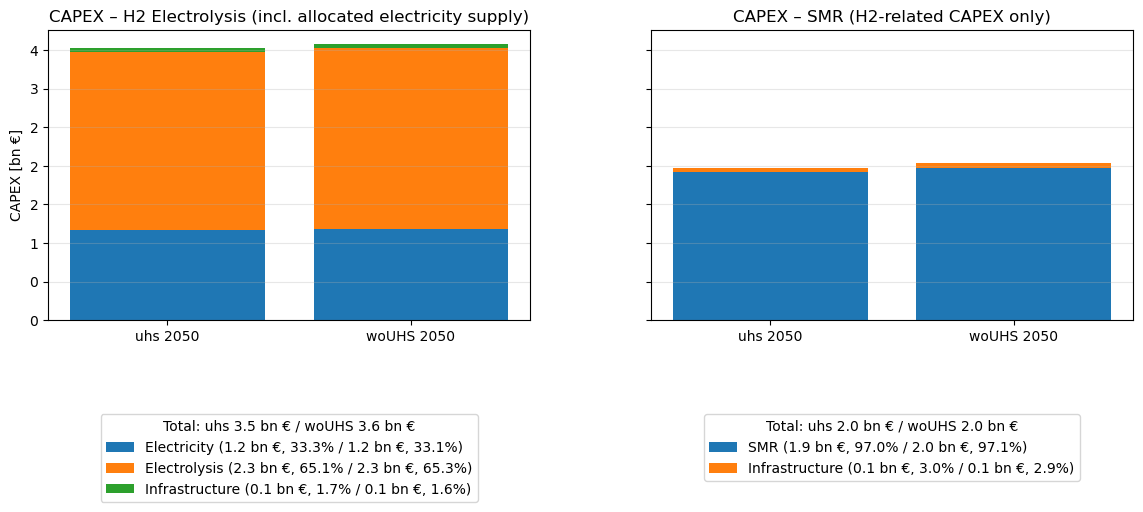

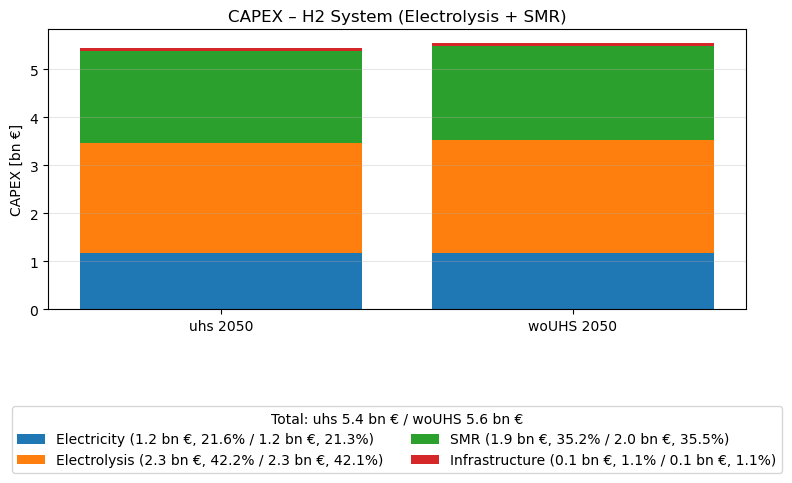

In [459]:
def snapshot_weights(net) -> pd.Series:
    """Return snapshot weights (defaults to 1.0 if not available)."""
    sw = getattr(net, "snapshot_weightings", None)
    if sw is not None:
        try:
            if "generators" in sw:
                return sw["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)


# ============================================================
# Generic CAPEX utilities
# ============================================================

def capex_links(net, carriers) -> float:
    """Annualized CAPEX contribution for link carriers (already annualized in capital_cost)."""
    links = net.links[net.links.carrier.isin(carriers)]
    if links.empty:
        return 0.0
    p_nom = links["p_nom_opt"] if "p_nom_opt" in links.columns else links["p_nom"]
    return float((p_nom * links["capital_cost"]).fillna(0.0).sum())


def capex_generators(net) -> float:
    """Annualized CAPEX for all generators."""
    gens = net.generators
    if gens.empty:
        return 0.0
    p_nom = gens["p_nom_opt"] if "p_nom_opt" in gens.columns else gens["p_nom"]
    return float((p_nom * gens["capital_cost"]).fillna(0.0).sum())


# ============================================================
# Electricity CAPEX allocation by energy share
# ============================================================

def _electricity_consumption_mwh(net, link_idx, port="p0") -> float:
    """
    Return annual electricity consumption [MWh] for the given links at the given port.
    Sign-robust: chooses p vs -p that yields larger aggregate positive consumption.
    """
    if len(link_idx) == 0:
        return 0.0

    w = snapshot_weights(net)
    p = getattr(net.links_t, port)[link_idx]  # MW

    cons_pos = (p.clip(lower=0).mul(w, axis=0)).sum().sum()
    cons_neg = ((-p).clip(lower=0).mul(w, axis=0)).sum().sum()
    cons = p.clip(lower=0) if cons_pos >= cons_neg else (-p).clip(lower=0)

    return float((cons.mul(w, axis=0)).sum().sum())


def electricity_capex_allocated(net, electricity_consumption_mwh: float) -> float:
    """
    Allocate total generator CAPEX proportionally to a given electricity consumption [MWh].
    Returns allocated generator CAPEX [€].
    """
    if electricity_consumption_mwh <= 0:
        return 0.0

    w = snapshot_weights(net)
    gens = net.generators
    if gens.empty:
        return 0.0

    p = net.generators_t.p[gens.index]          # MW
    e_gen = (p.mul(w, axis=0)).sum().sum()      # total MWh from all generators
    if e_gen <= 0:
        return 0.0

    share = electricity_consumption_mwh / float(e_gen)
    return capex_generators(net) * share


# ============================================================
# Infrastructure carrier set (shared definition)
# ============================================================

def infra_carriers(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
):
    """
    Infrastructure carriers: all H2-like link carriers except production technologies,
    plus explicit H2 pipelines.
    """
    pipelines = {"H2 pipeline"}
    if include_all_h2_infrastructure:
        h2_like = set(
            net.links.loc[
                net.links.carrier.astype(str).str.contains("H2", case=False, na=False),
                "carrier",
            ].unique()
        )
        return (h2_like - {electrolysis_carrier} - {smr_carrier}) | pipelines
    return set(pipelines)


# ============================================================
# CAPEX breakdowns (technology-specific and combined)
# ============================================================

def capex_breakdown_electrolysis(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
) -> dict:
    """
    CAPEX breakdown attributed to electrolysis pathway:
      - Electricity (allocated generator CAPEX via electrolysis electricity consumption)
      - Electrolysis (electrolyser link CAPEX)
      - Infrastructure (H2 infra link CAPEX)
    """
    el_idx = net.links.index[net.links.carrier == electrolysis_carrier]
    e_el_mwh = _electricity_consumption_mwh(net, el_idx, port="p0")
    elec_capex = electricity_capex_allocated(net, e_el_mwh)

    infra = infra_carriers(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {
        "Electricity": elec_capex,
        "Electrolysis": capex_links(net, {electrolysis_carrier}),
        "Infrastructure": capex_links(net, infra),
    }


def capex_breakdown_smr(
    net,
    smr_carrier="SMR",
    electrolysis_carrier="H2 Electrolysis",
    include_all_h2_infrastructure=True,
) -> dict:
    """
    CAPEX breakdown attributed to SMR pathway:
      - Gas supply (allocated generator CAPEX via SMR gas-bus consumption is NOT electricity;
        therefore excluded here by design)
      - SMR (SMR link CAPEX)
      - Infrastructure (H2 infra link CAPEX)
      - CO2 network/handling is excluded unless it is part of H2-like infra in your model
    """
    infra = infra_carriers(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {
        "SMR": capex_links(net, {smr_carrier}),
        "Infrastructure": capex_links(net, infra),
    }


def capex_breakdown_system(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
) -> dict:
    """
    Combined H2 system CAPEX breakdown:
      - Electricity (allocated generator CAPEX via electrolysis electricity consumption)
      - Electrolysis (electrolyser link CAPEX)
      - SMR (SMR link CAPEX)
      - Infrastructure (H2 infra link CAPEX)
    """
    el = capex_breakdown_electrolysis(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)
    smr = capex_breakdown_smr(net, smr_carrier, electrolysis_carrier, include_all_h2_infrastructure)

    return {
        "Electricity": el["Electricity"],
        "Electrolysis": el["Electrolysis"],
        "SMR": smr["SMR"],
        "Infrastructure": el["Infrastructure"],  # same definition; do not double count
    }


# ============================================================
# Plotting utilities (legends below)
# ============================================================

def format_bn_eur(x, _pos):
    return f"{x/1e9:.0f}"


def plot_stacked_two_scenarios_capex(ax, data_uhs, data_wo, categories, title, ylabel=None):
    """
    Stacked CAPEX bars for uhs vs woUHS.
    Values are in €, legend reports bn € and shares.
    """
    df = pd.DataFrame(
        {
            "uhs": pd.Series(data_uhs).reindex(categories).fillna(0.0),
            "woUHS": pd.Series(data_wo).reindex(categories).fillna(0.0),
        }
    )

    x = np.arange(2)
    bottom = np.zeros(2)

    for cat in categories:
        vals = df.loc[cat, ["uhs", "woUHS"]].values.astype(float)
        ax.bar(x, vals, bottom=bottom)
        bottom += vals

    ax.set_xticks(x)
    ax.set_xticklabels(["uhs 2050", "woUHS 2050"])
    ax.set_title(title)
    ax.grid(axis="y", alpha=0.30)

    if ylabel:
        ax.set_ylabel(ylabel)

    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e9:.0f}"))

    return df


def legend_with_values_and_shares_below(ax, df, order, title_prefix="Total", ncol=None, y_offset=-0.28):
    """
    Legend below the axis with absolute CAPEX (bn €) and shares.
    df columns: ['uhs','woUHS'] in €.
    """
    total_uhs = float(df["uhs"].sum())
    total_wo = float(df["woUHS"].sum())

    handles, labels = [], []
    for i, cat in enumerate(order):
        u = float(df.loc[cat, "uhs"])
        w = float(df.loc[cat, "woUHS"])
        u_pct = 100 * u / total_uhs if total_uhs > 0 else 0.0
        w_pct = 100 * w / total_wo if total_wo > 0 else 0.0

        handles.append(ax.patches[i * 2])
        labels.append(f"{cat} ({u/1e9:.1f} bn €, {u_pct:.1f}% / {w/1e9:.1f} bn €, {w_pct:.1f}%)")

    if ncol is None:
        ncol = min(len(order), 3)

    ax.legend(
        handles,
        labels,
        title=f"{title_prefix}: uhs {total_uhs/1e9:.1f} bn € / woUHS {total_wo/1e9:.1f} bn €",
        loc="upper center",
        bbox_to_anchor=(0.5, y_offset),
        ncol=ncol,
        frameon=True,
    )


# ============================================================
# Compute CAPEX breakdowns for both scenarios
# ============================================================

# Electrolysis vs SMR (separate)
capex_el_uhs = capex_breakdown_electrolysis(uhs, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)
capex_el_wo  = capex_breakdown_electrolysis(woUHS, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)

capex_smr_uhs = capex_breakdown_smr(uhs, smr_carrier="SMR", electrolysis_carrier="H2 Electrolysis", include_all_h2_infrastructure=True)
capex_smr_wo  = capex_breakdown_smr(woUHS, smr_carrier="SMR", electrolysis_carrier="H2 Electrolysis", include_all_h2_infrastructure=True)

# Combined system
capex_sys_uhs = capex_breakdown_system(uhs, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)
capex_sys_wo  = capex_breakdown_system(woUHS, electrolysis_carrier="H2 Electrolysis", smr_carrier="SMR", include_all_h2_infrastructure=True)


# ============================================================
# Plot A: Electrolysis and SMR side-by-side (two subplots)
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

cats_el = ["Electricity", "Electrolysis", "Infrastructure"]
df_el = plot_stacked_two_scenarios_capex(
    axes[0], capex_el_uhs, capex_el_wo, cats_el,
    title="CAPEX – H2 Electrolysis (incl. allocated electricity supply)",
    ylabel="CAPEX [bn €]"
)
legend_with_values_and_shares_below(axes[0], df_el, cats_el, ncol=1, y_offset=-0.30)

cats_smr = ["SMR", "Infrastructure"]
df_smr = plot_stacked_two_scenarios_capex(
    axes[1], capex_smr_uhs, capex_smr_wo, cats_smr,
    title="CAPEX – SMR (H2-related CAPEX only)",
    ylabel=None
)
legend_with_values_and_shares_below(axes[1], df_smr, cats_smr, ncol=1, y_offset=-0.30)

fig.subplots_adjust(bottom=0.30, wspace=0.25)
plt.show()


# ============================================================
# Plot B: Combined system CAPEX (single plot)
# ============================================================

fig, ax = plt.subplots(figsize=(9, 5))

cats_sys = ["Electricity", "Electrolysis", "SMR", "Infrastructure"]
df_sys = plot_stacked_two_scenarios_capex(
    ax, capex_sys_uhs, capex_sys_wo, cats_sys,
    title="CAPEX – H2 System (Electrolysis + SMR)",
    ylabel="CAPEX [bn €]"
)
legend_with_values_and_shares_below(ax, df_sys, cats_sys, ncol=2, y_offset=-0.32)

fig.subplots_adjust(bottom=0.32)
plt.show()

##### OPEX

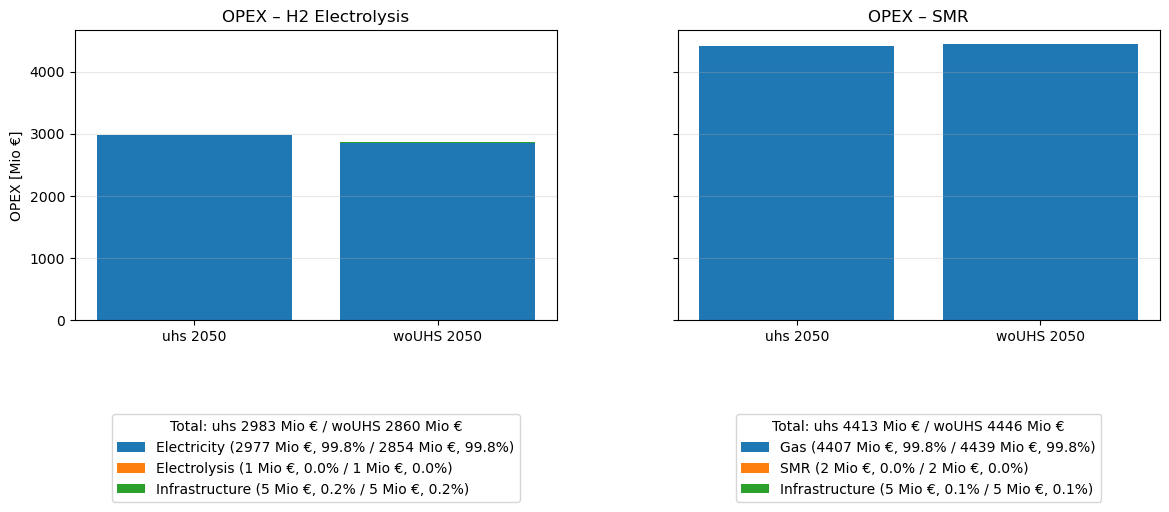

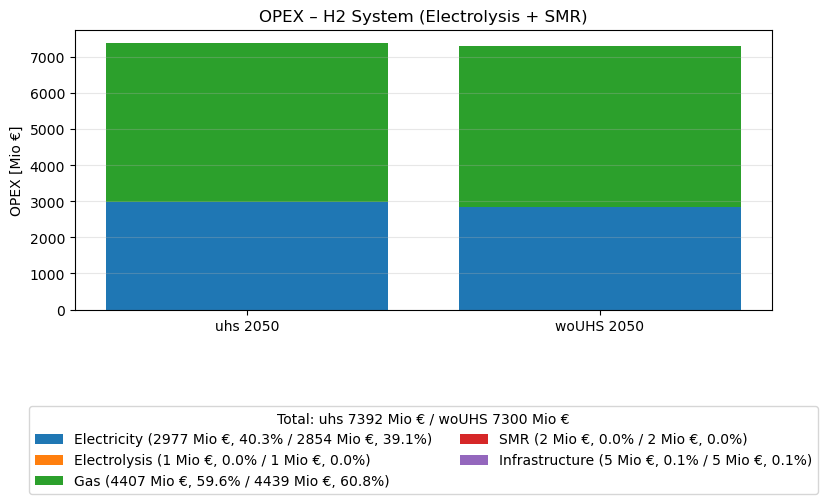

In [460]:
# ============================================================
# Snapshot weights
# ============================================================

def snapshot_weights(net) -> pd.Series:
    """Return snapshot weights (defaults to 1.0 if not available)."""
    sw = getattr(net, "snapshot_weightings", None)
    if sw is not None:
        try:
            if "generators" in sw:
                return sw["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)


# ============================================================
# Generic: price * consumption at a link port (sign-robust)
# ============================================================

def bus_price_cost_for_link_port(
    net,
    link_idx,
    port: str = "p0",
    bus_col: str = "bus0",
    price_sign: float = +1.0,
) -> float:
    """
    Annual cost [€] = sum_t( consumption_MW * weight * (price_sign * marginal_price(bus)) )

    Sign-robust: choose p vs -p with larger aggregate positive consumption.
    price_sign flips sign if the dual convention is inverted (CO2 in PyPSA-Earth).
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found.")

    if len(link_idx) == 0:
        return 0.0

    w = snapshot_weights(net)
    p = getattr(net.links_t, port)[link_idx]  # MW, snapshots x links

    cons_pos = (p.clip(lower=0).mul(w, axis=0)).sum().sum()
    cons_neg = ((-p).clip(lower=0).mul(w, axis=0)).sum().sum()
    cons = p.clip(lower=0) if cons_pos >= cons_neg else (-p).clip(lower=0)

    buses = net.links.loc[link_idx, bus_col]
    price_mat = pd.DataFrame({lid: net.buses_t.marginal_price[bus] for lid, bus in buses.items()})

    return float(((cons.mul(w, axis=0)) * (price_sign * price_mat)).sum().sum())


# ============================================================
# Link OPEX via marginal_cost * throughput
# ============================================================

def link_opex(net, carriers) -> float:
    """Variable link OPEX: marginal_cost [€/MWh] * |p0| throughput [MWh]."""
    links = net.links[net.links.carrier.isin(carriers)]
    if links.empty:
        return 0.0

    w = snapshot_weights(net)
    mc = links["marginal_cost"].fillna(0.0)     # €/MWh
    p0 = net.links_t.p0[links.index]            # MW
    e = (p0.abs().mul(w, axis=0)).sum()         # MWh per link-year

    return float((e * mc).sum())


# ============================================================
# Infrastructure definition
# ============================================================

def infra_carriers(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
):
    """H2-related infrastructure carriers excluding production technologies."""
    pipelines = {"H2 pipeline"}
    if include_all_h2_infrastructure:
        h2_like = set(
            net.links.loc[
                net.links.carrier.astype(str).str.contains("H2", case=False, na=False),
                "carrier",
            ].unique()
        )
        return (h2_like - {electrolysis_carrier} - {smr_carrier}) | pipelines
    return set(pipelines)


# ============================================================
# Electricity OPEX for electrolysis (price-based, consistent with LCOH)
# ============================================================

def electricity_opex_for_electrolysis_price(net, electrolysis_carrier="H2 Electrolysis") -> float:
    """Annual electricity procurement cost [€] for electrolysis using nodal marginal prices at bus0."""
    idx = net.links.index[net.links.carrier == electrolysis_carrier]
    if len(idx) == 0:
        return 0.0
    return bus_price_cost_for_link_port(net, idx, port="p0", bus_col="bus0", price_sign=+1.0)


# ============================================================
# Gas OPEX for SMR (price-based at gas bus0)
# ============================================================

def gas_opex_for_smr_price(net, smr_carrier="SMR") -> float:
    """Annual gas procurement cost [€] for SMR using nodal marginal prices at gas bus0."""
    idx = net.links.index[net.links.carrier == smr_carrier]
    if len(idx) == 0:
        return 0.0
    return bus_price_cost_for_link_port(net, idx, port="p0", bus_col="bus0", price_sign=+1.0)


# ============================================================
# OPEX breakdowns
# ============================================================

def opex_breakdown_electrolysis(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
) -> dict:
    """
    OPEX attributed to electrolysis pathway:
      - Electricity: price-based procurement cost at bus0 (preferred for interpretability)
      - Electrolysis: link marginal_cost-based OPEX
      - Infrastructure: H2 infra marginal_cost-based OPEX
    """
    infra = infra_carriers(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {
        "Electricity": electricity_opex_for_electrolysis_price(net, electrolysis_carrier),
        "Electrolysis": link_opex(net, {electrolysis_carrier}),
        "Infrastructure": link_opex(net, infra),
    }


def opex_breakdown_smr(
    net,
    smr_carrier="SMR",
    electrolysis_carrier="H2 Electrolysis",
    include_all_h2_infrastructure=True,
) -> dict:
    """
    OPEX attributed to SMR pathway:
      - Gas: price-based gas procurement cost at SMR bus0
      - SMR: link marginal_cost-based OPEX (typically variable O&M)
      - Infrastructure: H2 infra marginal_cost-based OPEX
    """
    infra = infra_carriers(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)

    return {
        "Gas": gas_opex_for_smr_price(net, smr_carrier),
        "SMR": link_opex(net, {smr_carrier}),
        "Infrastructure": link_opex(net, infra),
    }


def opex_breakdown_system(
    net,
    electrolysis_carrier="H2 Electrolysis",
    smr_carrier="SMR",
    include_all_h2_infrastructure=True,
) -> dict:
    """Combined hydrogen system OPEX (no double counting of infrastructure)."""
    el = opex_breakdown_electrolysis(net, electrolysis_carrier, smr_carrier, include_all_h2_infrastructure)
    smr = opex_breakdown_smr(net, smr_carrier, electrolysis_carrier, include_all_h2_infrastructure)

    return {
        "Electricity": el["Electricity"],
        "Electrolysis": el["Electrolysis"],
        "Gas": smr["Gas"],
        "SMR": smr["SMR"],
        "Infrastructure": el["Infrastructure"],
    }


# ============================================================
# Plot helpers (legends below, no labels on bars)
# ============================================================

def plot_stacked_two_scenarios_opex(ax, data_uhs, data_wo, categories, title, ylabel=None):
    """Stacked OPEX bars for uhs vs woUHS. Values in €."""
    df = pd.DataFrame(
        {
            "uhs": pd.Series(data_uhs).reindex(categories).fillna(0.0),
            "woUHS": pd.Series(data_wo).reindex(categories).fillna(0.0),
        }
    )

    x = np.arange(2)
    bottom = np.zeros(2)

    for cat in categories:
        vals = df.loc[cat, ["uhs", "woUHS"]].values.astype(float)
        ax.bar(x, vals, bottom=bottom)
        bottom += vals

    ax.set_xticks(x)
    ax.set_xticklabels(["uhs 2050", "woUHS 2050"])
    ax.set_title(title)
    ax.grid(axis="y", alpha=0.30)
    if ylabel:
        ax.set_ylabel(ylabel)

    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.0f}"))
    return df


def legend_with_values_and_shares_below(ax, df, order, title_prefix="Total", ncol=None, y_offset=-0.28):
    """Legend below axis with absolute OPEX (Mio €) and shares."""
    total_uhs = float(df["uhs"].sum())
    total_wo = float(df["woUHS"].sum())

    handles, labels = [], []
    for i, cat in enumerate(order):
        u = float(df.loc[cat, "uhs"])
        w = float(df.loc[cat, "woUHS"])
        u_pct = 100 * u / total_uhs if total_uhs > 0 else 0.0
        w_pct = 100 * w / total_wo if total_wo > 0 else 0.0

        handles.append(ax.patches[i * 2])
        labels.append(f"{cat} ({u/1e6:.0f} Mio €, {u_pct:.1f}% / {w/1e6:.0f} Mio €, {w_pct:.1f}%)")

    if ncol is None:
        ncol = min(len(order), 3)

    ax.legend(
        handles,
        labels,
        title=f"{title_prefix}: uhs {total_uhs/1e6:.0f} Mio € / woUHS {total_wo/1e6:.0f} Mio €",
        loc="upper center",
        bbox_to_anchor=(0.5, y_offset),
        ncol=ncol,
        frameon=True,
    )


# ============================================================
# Compute OPEX breakdowns
# ============================================================

opex_el_uhs = opex_breakdown_electrolysis(uhs)
opex_el_wo  = opex_breakdown_electrolysis(woUHS)

opex_smr_uhs = opex_breakdown_smr(uhs)
opex_smr_wo  = opex_breakdown_smr(woUHS)

opex_sys_uhs = opex_breakdown_system(uhs)
opex_sys_wo  = opex_breakdown_system(woUHS)


# ============================================================
# Plot A: Electrolysis vs SMR
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

cats_el = ["Electricity", "Electrolysis", "Infrastructure"]
df_el = plot_stacked_two_scenarios_opex(
    axes[0], opex_el_uhs, opex_el_wo, cats_el,
    title="OPEX – H2 Electrolysis",
    ylabel="OPEX [Mio €]"
)
legend_with_values_and_shares_below(axes[0], df_el, cats_el, ncol=1, y_offset=-0.30)

cats_smr = ["Gas", "SMR", "Infrastructure"]
df_smr = plot_stacked_two_scenarios_opex(
    axes[1], opex_smr_uhs, opex_smr_wo, cats_smr,
    title="OPEX – SMR",
)
legend_with_values_and_shares_below(axes[1], df_smr, cats_smr, ncol=1, y_offset=-0.30)

fig.subplots_adjust(bottom=0.30, wspace=0.25)
plt.show()


# ============================================================
# Plot B: Combined system OPEX
# ============================================================

fig, ax = plt.subplots(figsize=(9, 5))

cats_sys = ["Electricity", "Electrolysis", "Gas", "SMR", "Infrastructure"]
df_sys = plot_stacked_two_scenarios_opex(
    ax, opex_sys_uhs, opex_sys_wo, cats_sys,
    title="OPEX – H2 System (Electrolysis + SMR)",
    ylabel="OPEX [Mio €]"
)
legend_with_values_and_shares_below(ax, df_sys, cats_sys, ncol=2, y_offset=-0.32)

fig.subplots_adjust(bottom=0.32)
plt.show()

##### Supply

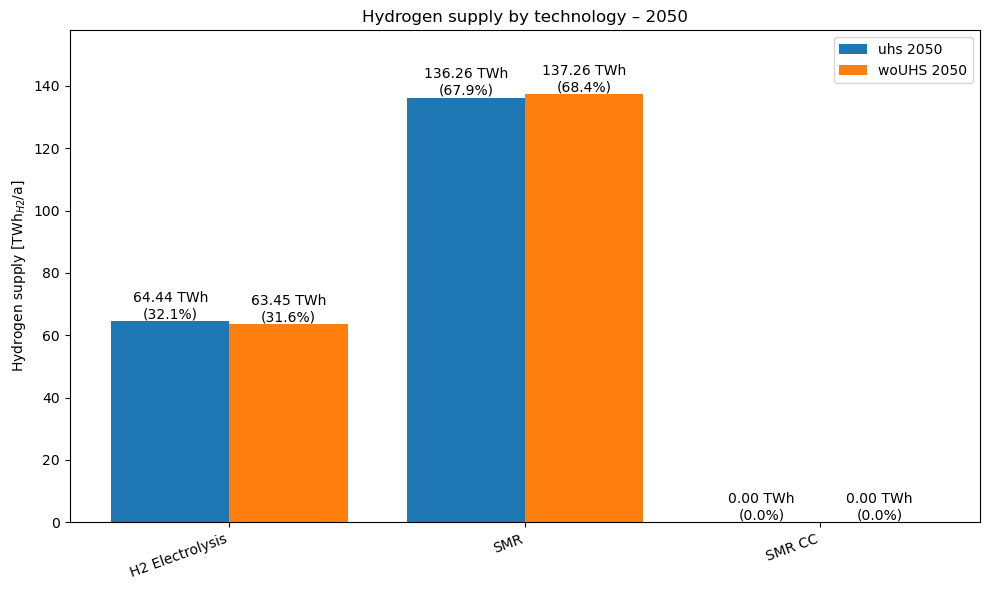

In [461]:
def hydrogen_supply_by_tech(net, h2_lhv_kwh_per_kg=33.33):
    """
    H2 supply by technology (carrier) from NON-H2 -> H2 links.
    Robust to PyPSA link sign conventions.
    """
    w = _snapshot_weights(net)

    # Identify H2 buses
    h2_buses = net.buses.index[net.buses.carrier == "H2"]
    if len(h2_buses) == 0:
        raise ValueError("No H2 buses found (carrier == 'H2').")

    # Links feeding into H2
    cand = net.links[net.links.bus1.isin(h2_buses)].copy()

    # Exclude H2->H2 transport (pipelines)
    supply_links = cand[~cand.bus0.isin(h2_buses)].copy()
    if supply_links.empty:
        raise ValueError("No NON-H2 -> H2 supply links found.")

    # Annual H2 energy into H2 bus (ABS handles sign conventions)
    p1 = net.links_t.p1[supply_links.index]     # MW
    e_mwh = (p1.abs().mul(w, axis=0)).sum()     # MWh/a per link

    # Aggregate by technology
    e_mwh_by_carrier = e_mwh.groupby(supply_links["carrier"]).sum()

    # Convert units
    e_twh = e_mwh_by_carrier / 1e6
    e_kwh = e_mwh_by_carrier * 1_000.0
    mt_h2 = (e_kwh / h2_lhv_kwh_per_kg) / 1e9

    return pd.DataFrame({
        "Supply [TWh_H2]": e_twh,
        "Supply [Mt_H2]": mt_h2,
    }).sort_values("Supply [TWh_H2]", ascending=False)


supply_uhs = hydrogen_supply_by_tech(uhs)
supply_woUHS = hydrogen_supply_by_tech(woUHS)

techs = sorted(set(supply_uhs.index) | set(supply_woUHS.index))

plot_df = pd.DataFrame({
    "uhs 2050 [TWh_H2]": supply_uhs.reindex(techs)["Supply [TWh_H2]"].fillna(0.0),
    "woUHS 2050 [TWh_H2]": supply_woUHS.reindex(techs)["Supply [TWh_H2]"].fillna(0.0),
})

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(plot_df.index))
width = 0.4

vals_uhs = plot_df["uhs 2050 [TWh_H2]"].values
vals_woUHS = plot_df["woUHS 2050 [TWh_H2]"].values

bars_d = ax.bar(x - width/2, vals_uhs, width=width, label="uhs 2050")
bars_w = ax.bar(x + width/2, vals_woUHS, width=width, label="woUHS 2050")

# Axis formatting
ax.set_xticks(x)
ax.set_xticklabels(plot_df.index, rotation=20, ha="right")
ax.set_ylabel("Hydrogen supply [TWh$_{H2}$/a]")
ax.set_title("Hydrogen supply by technology – 2050")
ymax = max(vals_uhs.max(), vals_woUHS.max())
ax.set_ylim(0, ymax * 1.15)
ax.legend()

# Totals for percentages
total_d = vals_uhs.sum()
total_w = vals_woUHS.sum()

# ---------- annotate bars ----------
def annotate_bars(bars, total):
    for b in bars:
        height = b.get_height()
        if height <= 0:
            continue
        pct = 100 * height / total if total > 0 else 0.0
        ax.text(
            b.get_x() + b.get_width() / 2,
            height,
            f"{height:.2f} TWh\n({pct:.1f}%)",
            ha="center",
            va="bottom",
            fontsize=10,
        )

annotate_bars(bars_d, total_d)
annotate_bars(bars_w, total_w)

plt.tight_layout()
plt.show()

##### Revenue

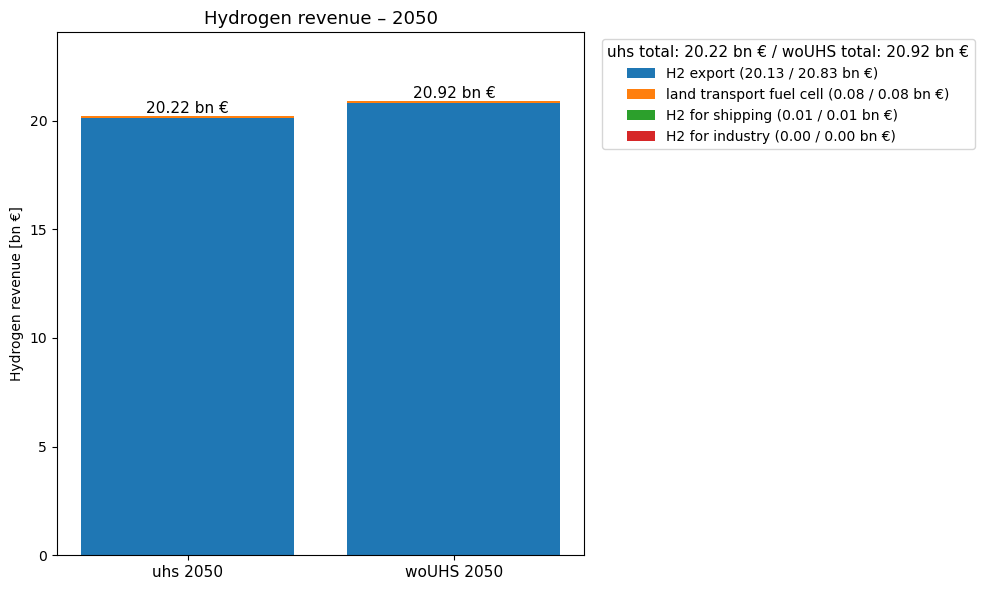

In [462]:
def _snapshot_weights(net):
    if hasattr(net, "snapshot_weightings") and net.snapshot_weightings is not None:
        try:
            if "generators" in net.snapshot_weightings:
                return net.snapshot_weightings["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)

def hydrogen_revenue(net, h2_bus_carrier="H2"):
    """
    Hydrogen revenue [€] computed as:
      Revenue = sum_t sum_{H2 loads} (H2_price_at_bus[t] * H2_load_power[t] * weight[t])

    Assumptions:
      - H2 price is net.buses_t.marginal_price at H2 buses [€/MWh_H2]
      - H2 demand is net.loads_t.p at loads connected to H2 buses [MW_H2]
      - Snapshot weights are hours, so MW * h = MWh

    Returns:
      total_revenue_eur, revenue_by_loadcarrier_eur (Series)
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found (no dual prices stored).")

    w = _snapshot_weights(net)

    # --- identify H2 buses ---
    h2_buses = net.buses.index[net.buses.carrier == h2_bus_carrier]
    if len(h2_buses) == 0:
        raise ValueError(f"No buses with carrier == '{h2_bus_carrier}' found.")

    # --- identify loads on H2 buses ---
    loads = net.loads.copy()
    h2_loads = loads[loads.bus.isin(h2_buses)].copy()
    if h2_loads.empty:
        # Nothing to sell H2 to -> revenue 0
        return 0.0, pd.Series(dtype=float)

    # Load time series [MW_H2]
    p_load = net.loads_t.p[h2_loads.index]

    # Bus prices [€/MWh_H2] for each load's bus, expanded to load columns
    price_mat = pd.DataFrame({ld: net.buses_t.marginal_price[bus] for ld, bus in h2_loads["bus"].items()})

    # Revenue per load [€]
    rev_per_load = ((p_load.mul(w, axis=0)) * price_mat).sum(axis=0)  # MWh * €/MWh

    # Group revenue by load carrier (or by load name if carrier missing)
    if "carrier" in h2_loads.columns:
        grp = h2_loads["carrier"].fillna("H2 load")
    else:
        grp = pd.Series("H2 load", index=h2_loads.index)

    rev_by_carrier = rev_per_load.groupby(grp).sum().sort_values(ascending=False)
    total_rev = float(rev_by_carrier.sum())

    return total_rev, rev_by_carrier

# ============================
# Compute revenues for both scenarios
# ============================
rev_uhs_total, rev_uhs_by = hydrogen_revenue(uhs, h2_bus_carrier="H2")
rev_woUHS_total, rev_woUHS_by = hydrogen_revenue(woUHS, h2_bus_carrier="H2")

# Align revenue categories (if you have multiple H2 demand types)
cats = sorted(set(rev_uhs_by.index) | set(rev_woUHS_by.index))
rev_df = pd.DataFrame({
    "uhs 2050": rev_uhs_by.reindex(cats).fillna(0.0),
    "woUHS 2050": rev_woUHS_by.reindex(cats).fillna(0.0),
})

# If there is only one category, it still plots cleanly.
# Sort by mean revenue so the largest categories are first
if len(cats) > 1:
    rev_df = rev_df.loc[rev_df.mean(axis=1).sort_values(ascending=False).index]

# ============================
# Plot: stacked revenues (bn €) with values on bars
# ============================
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(2)
bottom = np.zeros(2)

colors = plt.cm.tab10.colors
handles = []
legend_labels = []

for i, cat in enumerate(rev_df.index):
    vals = rev_df.loc[cat, ["uhs 2050", "woUHS 2050"]].values.astype(float)
    bars = ax.bar(x, vals, bottom=bottom, color=colors[i % len(colors)])
    bottom += vals

    # Legend: absolute revenues per category for both scenarios (bn €)
    d_bn = rev_df.loc[cat, "uhs 2050"] / 1e9
    w_bn = rev_df.loc[cat, "woUHS 2050"] / 1e9
    legend_labels.append(f"{cat} ({d_bn:.2f} / {w_bn:.2f} bn €)")
    handles.append(bars[0])

# Bar annotations: totals on top
totals = np.array([rev_uhs_total, rev_woUHS_total], dtype=float)
for xi, total in zip(x, totals):
    ax.text(xi, total, f"{total/1e9:.2f} bn €", ha="center", va="bottom", fontsize=11)

# Add headroom so text isn't clipped
ymax = max(totals.max(), 1.0)
ax.set_ylim(0, ymax * 1.15)

ax.set_xticks(x)
ax.set_xticklabels(["uhs 2050", "woUHS 2050"], fontsize=11)
ax.set_ylabel("Hydrogen revenue [bn €]")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v/1e9:.0f}"))
ax.set_title("Hydrogen revenue – 2050", fontsize=13)

legend_title = f"uhs total: {rev_uhs_total/1e9:.2f} bn € / woUHS total: {rev_woUHS_total/1e9:.2f} bn €"
ax.legend(handles, legend_labels, title=legend_title,
          bbox_to_anchor=(1.02, 1), loc="upper left",
          fontsize=10, title_fontsize=11, frameon=True)

plt.tight_layout()
plt.show()

##### Hydrogen Market

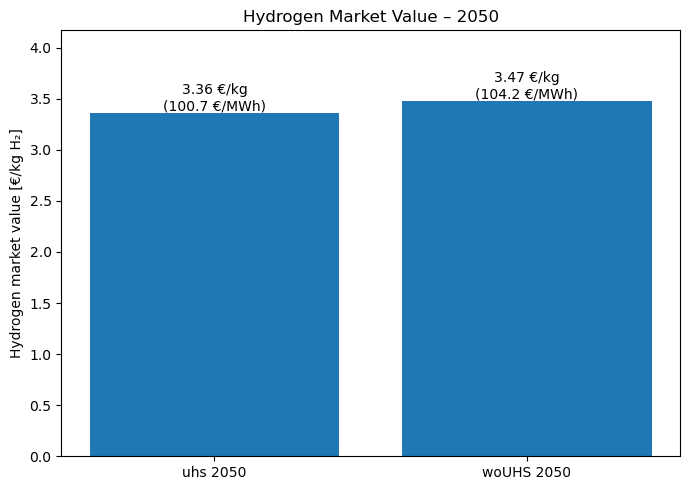

In [463]:
def _snapshot_weights(net):
    if hasattr(net, "snapshot_weightings") and net.snapshot_weightings is not None:
        try:
            if "generators" in net.snapshot_weightings:
                return net.snapshot_weightings["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)

def hydrogen_market_value(net, h2_bus_carrier="H2", h2_lhv_kwh_per_kg=33.33):
    """
    Hydrogen Market Value = revenue / quantity, computed primarily from H2 loads:
      MV [€/MWh_H2] = sum_t (p_load * w * price_bus) / sum_t (p_load * w)

    where price_bus is net.buses_t.marginal_price at the H2 bus (€/MWh_H2)
    and p_load is net.loads_t.p of loads connected to H2 buses (MW_H2).

    Returns:
      mv_eur_per_mwh, mv_eur_per_kg, total_revenue_eur, total_quantity_mwh
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found (no dual prices stored).")

    w = _snapshot_weights(net)

    # Identify H2 buses
    h2_buses = net.buses.index[net.buses.carrier == h2_bus_carrier]
    if len(h2_buses) == 0:
        raise ValueError(f"No buses with carrier == '{h2_bus_carrier}' found.")

    # H2 loads (buyers)
    h2_loads = net.loads[net.loads.bus.isin(h2_buses)].copy()
    if h2_loads.empty:
        raise ValueError("No H2 loads found on H2 buses (cannot compute market value from demand).")

    p_load = net.loads_t.p[h2_loads.index]  # MW_H2

    # Quantity [MWh_H2]
    q_mwh = float((p_load.mul(w, axis=0)).sum().sum())
    if q_mwh == 0:
        raise ValueError("Total H2 load energy is zero (cannot compute market value).")

    # Per-load price time series at the corresponding H2 bus
    price_mat = pd.DataFrame({ld: net.buses_t.marginal_price[bus] for ld, bus in h2_loads["bus"].items()})

    # Revenue [€]
    revenue_eur = float(((p_load.mul(w, axis=0)) * price_mat).sum().sum())

    mv_eur_per_mwh = revenue_eur / q_mwh

    # Convert €/MWh -> €/kg via LHV:
    # 1 MWh = 1000 kWh, kg = kWh / (kWh/kg) => kg per MWh = 1000 / LHV
    kg_per_mwh = 1000.0 / h2_lhv_kwh_per_kg
    mv_eur_per_kg = mv_eur_per_mwh / kg_per_mwh

    return mv_eur_per_mwh, mv_eur_per_kg, revenue_eur, q_mwh

# ============================
# Compute for both scenarios
# ============================
mv_d_mwh, mv_d_kg, rev_d, q_d = hydrogen_market_value(uhs, h2_bus_carrier="H2")
mv_w_mwh, mv_w_kg, rev_w, q_w = hydrogen_market_value(woUHS, h2_bus_carrier="H2")

# ============================
# Plot (€/kg H2) with values on bars
# ============================
fig, ax = plt.subplots(figsize=(7, 5))

labels = ["uhs 2050", "woUHS 2050"]
vals_kg = [mv_d_kg, mv_w_kg]

bars = ax.bar(labels, vals_kg)

ax.set_ylabel("Hydrogen market value [€/kg H₂]")
ax.set_title("Hydrogen Market Value – 2050")

# annotate bars (also show €/MWh_H2 in the label)
vals_mwh = [mv_d_mwh, mv_w_mwh]
for b, vkg, vmwh in zip(bars, vals_kg, vals_mwh):
    ax.text(
        b.get_x() + b.get_width() / 2,
        b.get_height(),
        f"{vkg:.2f} €/kg\n({vmwh:.1f} €/MWh)",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# add headroom to avoid clipping
ymax = max(vals_kg) if max(vals_kg) > 0 else 1.0
ax.set_ylim(0, ymax * 1.20)

plt.tight_layout()
plt.show()

##### Capacity

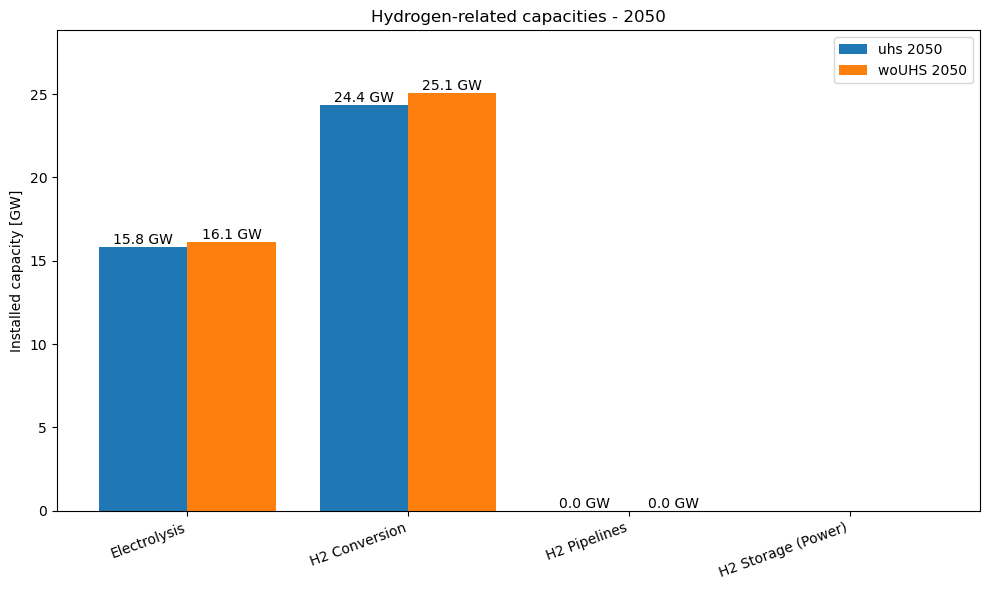

In [464]:
def hydrogen_capacities_breakdown(net):
    """
    Installed hydrogen-related capacities (using p_nom_opt if available) split into:
      - Electrolysis (H2 Electrolysis links)  [MW_el or MW_link]
      - H2 Pipelines (H2 pipeline links)      [MW_link]
      - H2 Storage (stores + storage_units with carrier containing 'H2') [MWh for Stores, MW for StorageUnits]
      - H2 Conversion (other links with carrier containing 'H2', excluding Electrolysis & pipelines) [MW_link]

    Returns:
      cap_MW: Series of MW-type capacities (Links + StorageUnits)
      cap_MWh: Series of MWh-type capacities (Stores)
    """
    # --- Links ---
    links = net.links.copy()
    pnom_col = "p_nom_opt" if "p_nom_opt" in links.columns else "p_nom"

    h2_buses = net.buses.index[net.buses.carrier == "H2"]

    # --- Electrolysis: electricity -> H2 ---
    electrolysis = links[links.carrier == "H2 Electrolysis"]

    # --- H2 pipelines: H2 -> H2 ---
    pipelines = links[
        (links.carrier == "H2 pipeline") &
        (links.bus0.isin(h2_buses)) &
        (links.bus1.isin(h2_buses))
    ]

    # --- H2 conversion: H2 <-> non-H2 (excluding electrolysis & pipelines) ---
    conversion = links[
        (
            links.bus0.isin(h2_buses) ^ links.bus1.isin(h2_buses)
        ) &
        (~links.index.isin(electrolysis.index)) &
        (~links.index.isin(pipelines.index))
    ]

    def sum_cap(df):
        if df.empty:
            return 0.0
        return float(df[pnom_col].fillna(0.0).sum())

    cap_MW = pd.Series({
        "Electrolysis": sum_cap(electrolysis),
        "H2 Pipelines": sum_cap(pipelines),
        "H2 Conversion": sum_cap(conversion),
    })

    # --- H2 storage (power & energy) ---
    cap_MW["H2 Storage (Power)"] = 0.0
    cap_MWh = pd.Series(dtype=float)

    if hasattr(net, "storage_units") and not net.storage_units.empty:
        su = net.storage_units
        su_pnom = "p_nom_opt" if "p_nom_opt" in su.columns else "p_nom"
        h2_su = su[su.bus.isin(h2_buses)]
        cap_MW["H2 Storage (Power)"] = float(h2_su[su_pnom].fillna(0.0).sum())

    if hasattr(net, "stores") and not net.stores.empty:
        st = net.stores
        st_enom = "e_nom_opt" if "e_nom_opt" in st.columns else "e_nom"
        h2_st = st[st.bus.isin(h2_buses)]
        cap_MWh["H2 Storage (Energy)"] = float(h2_st[st_enom].fillna(0.0).sum())

    return cap_MW, cap_MWh


# ============================
# Compute capacities for both scenarios
# ============================
cap_MW_uhs, cap_MWh_uhs = hydrogen_capacities_breakdown(uhs)
cap_MW_woUHS, cap_MWh_woUHS = hydrogen_capacities_breakdown(woUHS)

# Align indices
mw_cats = sorted(set(cap_MW_uhs.index) | set(cap_MW_woUHS.index))
mwh_cats = sorted(set(cap_MWh_uhs.index) | set(cap_MWh_woUHS.index))

mw_df = pd.DataFrame({
    "uhs 2050": cap_MW_uhs.reindex(mw_cats).fillna(0.0),
    "woUHS 2050": cap_MW_woUHS.reindex(mw_cats).fillna(0.0),
})

mwh_df = pd.DataFrame({
    "uhs 2050": cap_MWh_uhs.reindex(mwh_cats).fillna(0.0),
    "woUHS 2050": cap_MWh_woUHS.reindex(mwh_cats).fillna(0.0),
})

# ============================
# Plot 1: MW capacities (GW) with values on bars
# ============================
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(mw_df.index))
width = 0.4

vals_d = mw_df["uhs 2050"].values / 1000.0    # GW
vals_w = mw_df["woUHS 2050"].values / 1000.0  # GW

bars_d = ax.bar(x - width/2, vals_d, width=width, label="uhs 2050")
bars_w = ax.bar(x + width/2, vals_w, width=width, label="woUHS 2050")

ax.set_xticks(x)
ax.set_xticklabels(mw_df.index, rotation=20, ha="right")
ax.set_ylabel("Installed capacity [GW]")
ax.set_title("Hydrogen-related capacities - 2050")
ax.legend()

# ---- annotate bars ----
def annotate(bars):
    for b in bars:
        h = b.get_height()
        if h <= 0:
            continue
        ax.text(
            b.get_x() + b.get_width()/2,
            h,
            f"{h:.1f} GW",
            ha="center",
            va="bottom",
            fontsize=10
        )

annotate(bars_d)
annotate(bars_w)

# headroom
ax.set_ylim(0, max(vals_d.max(), vals_w.max()) * 1.15)

plt.tight_layout()
plt.show()

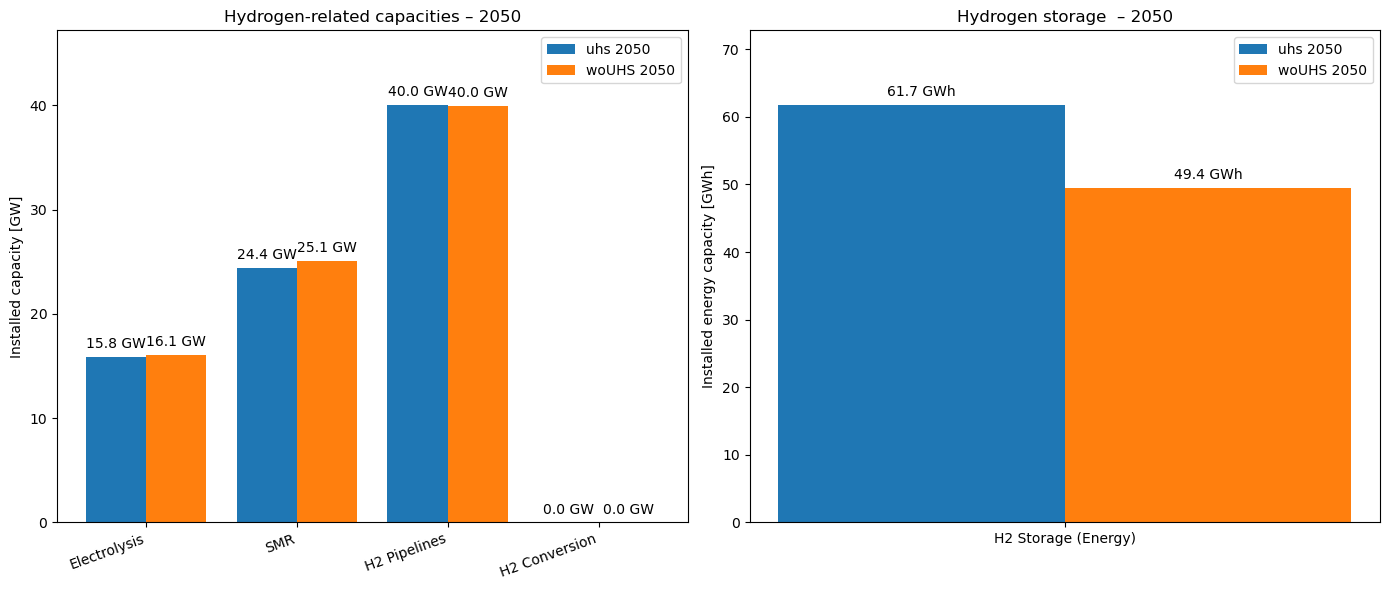

In [465]:
def annotate_bars_no_overlap(ax, bars, fmt="{:.1f}", min_rel_gap=0.06, y_pad_rel=0.012):
    """
    Annotate bars while avoiding label overlap.
    - min_rel_gap: minimal relative gap (as fraction of y-range) required to draw a label.
    - y_pad_rel: padding above bar height relative to y-range.
    """
    y0, y1 = ax.get_ylim()
    yr = max(y1 - y0, 1e-9)

    used_y = []
    for b in bars:
        h = float(b.get_height())
        if h <= 0:
            continue

        y = h + y_pad_rel * yr

        # Skip label if it would collide with an existing one
        if any(abs(y - yy) < min_rel_gap * yr for yy in used_y):
            continue

        ax.text(
            b.get_x() + b.get_width() / 2,
            y,
            fmt.format(h),
            ha="center",
            va="bottom",
            fontsize=10,
            clip_on=True,
        )
        used_y.append(y)


# ============================================================
# Classification helpers
# ============================================================

def is_h2_export_link(links: pd.DataFrame) -> pd.Series:
    """
    Identify H2 export boundary links (robust heuristic).
    Works for typical PyPSA-Earth naming patterns like:
      - index contains 'H2 export'
      - bus1 contains 'export'
      - bus1 equals/contains 'export bus'
    """
    idx = links.index.astype(str)
    bus1 = links["bus1"].astype(str) if "bus1" in links.columns else pd.Series("", index=links.index)
    bus0 = links["bus0"].astype(str) if "bus0" in links.columns else pd.Series("", index=links.index)

    return (
        idx.str.contains(r"\bh2\s*export\b|\bexport\b", case=False, na=False) |
        bus1.str.contains(r"\bexport\b", case=False, na=False) |
        bus0.str.contains(r"\bexport\b", case=False, na=False)
    )


# ============================================================
# Main breakdown
# ============================================================

def hydrogen_capacities_breakdown(net):
    """
    Installed hydrogen-related capacities split into:

    Power (MW):
      - Electrolysis (H2 Electrolysis links)
      - SMR (SMR links)
      - H2 Pipelines (H2 pipeline + repurposed, H2->H2)
      - H2 Conversion (explicit conversion tech carriers, excluding export)
        * Excludes generic carrier 'H2' which in your case represents H2 export boundary links.

    Energy (MWh):
      - H2 Storage (Energy) (Stores on H2 buses)

    Additionally returns:
      - conversion_by_carrier_MW: Series showing conversion capacity by carrier (MW)
      - h2_export_MW: total export link capacity (MW) for transparency/debug
    """
    links = net.links.copy()
    pnom_col = "p_nom_opt" if "p_nom_opt" in links.columns else "p_nom"

    # Keep your strict bus definition (carrier == "H2")
    h2_buses = net.buses.index[net.buses.carrier == "H2"]

    # ---- Production ----
    electrolysis = links[links.carrier == "H2 Electrolysis"]
    smr = links[links.carrier == "SMR"]

    # ---- Pipelines (include repurposed) ----
    pipelines = links[
        (links.carrier.isin(["H2 pipeline", "H2 pipeline repurposed"])) &
        (links.bus0.isin(h2_buses)) &
        (links.bus1.isin(h2_buses))
    ]

    # ---- Conversion (explicit tech carriers only; exclude export boundary links) ----
    conversion_carriers = {
        "H2 Fuel Cell",
        "H2 turbine",
        "Sabatier",
        "Fischer-Tropsch",
    }
    conversion = links[
        links.carrier.isin(conversion_carriers) &
        (~is_h2_export_link(links))
    ]

    def sum_cap(df):
        if df.empty:
            return 0.0
        return float(df[pnom_col].fillna(0.0).sum())

    cap_MW = pd.Series({
        "Electrolysis": sum_cap(electrolysis),
        "SMR": sum_cap(smr),
        "H2 Pipelines": sum_cap(pipelines),
        "H2 Conversion": sum_cap(conversion),
    }, dtype=float)

    conversion_by_carrier_MW = (
        conversion.assign(_p=conversion[pnom_col].fillna(0.0))
        .groupby("carrier")["_p"].sum()
        .sort_values(ascending=False)
        .astype(float)
    )

    # ---- Export capacity (for debug; not plotted by default) ----
    h2_export = links[(links.carrier == "H2") & is_h2_export_link(links)]
    h2_export_MW = sum_cap(h2_export)

    # ---- Storage energy (MWh) ----
    cap_MWh = pd.Series(dtype=float)
    if hasattr(net, "stores") and not net.stores.empty:
        st = net.stores
        st_enom = "e_nom_opt" if "e_nom_opt" in st.columns else "e_nom"
        h2_st = st[st.bus.isin(h2_buses)]
        cap_MWh["H2 Storage (Energy)"] = float(h2_st[st_enom].fillna(0.0).sum())
    else:
        cap_MWh["H2 Storage (Energy)"] = 0.0

    return cap_MW, cap_MWh, conversion_by_carrier_MW, h2_export_MW


# ============================================================
# Run breakdown for both scenarios
# ============================================================

cap_MW_uhs, cap_MWh_uhs, conv_uhs, export_uhs_MW = hydrogen_capacities_breakdown(uhs)
cap_MW_wo,  cap_MWh_wo,  conv_wo,  export_wo_MW  = hydrogen_capacities_breakdown(woUHS)


# ============================================================
# Build dataframes for plotting
# ============================================================

mw_cats = ["Electrolysis", "SMR", "H2 Pipelines", "H2 Conversion"]
mw_df = pd.DataFrame({
    "uhs 2050": cap_MW_uhs.reindex(mw_cats).fillna(0.0),
    "woUHS 2050": cap_MW_wo.reindex(mw_cats).fillna(0.0),
})

mwh_cats = ["H2 Storage (Energy)"]
mwh_df = pd.DataFrame({
    "uhs 2050": cap_MWh_uhs.reindex(mwh_cats).fillna(0.0),
    "woUHS 2050": cap_MWh_wo.reindex(mwh_cats).fillna(0.0),
})


# ============================================================
# Plot: power (GW) + stores energy (GWh) side-by-side
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Left: Power capacities (GW)
ax = axes[0]
x = np.arange(len(mw_df.index))
width = 0.40

vals_d = mw_df["uhs 2050"].values / 1000.0  # MW -> GW
vals_w = mw_df["woUHS 2050"].values / 1000.0

bars_d = ax.bar(x - width/2, vals_d, width=width, label="uhs 2050")
bars_w = ax.bar(x + width/2, vals_w, width=width, label="woUHS 2050")

ax.set_xticks(x)
ax.set_xticklabels(mw_df.index, rotation=20, ha="right")
ax.set_ylabel("Installed capacity [GW]")
ax.set_title("Hydrogen-related capacities – 2050")
ax.legend()
ax.set_ylim(0, max(vals_d.max(), vals_w.max()) * 1.18)

annotate_bars_no_overlap(ax, bars_d, fmt="{:.1f} GW")
annotate_bars_no_overlap(ax, bars_w, fmt="{:.1f} GW")

# ---- Right: Stores energy (GWh)
ax2 = axes[1]
x2 = np.arange(len(mwh_df.index))

vals2_d = mwh_df["uhs 2050"].values / 1000.0  # MWh -> GWh
vals2_w = mwh_df["woUHS 2050"].values / 1000.0

bars2_d = ax2.bar(x2 - width/2, vals2_d, width=width, label="uhs 2050")
bars2_w = ax2.bar(x2 + width/2, vals2_w, width=width, label="woUHS 2050")

ax2.set_xticks(x2)
ax2.set_xticklabels(mwh_df.index, rotation=0, ha="center")
ax2.set_ylabel("Installed energy capacity [GWh]")
ax2.set_title("Hydrogen storage  – 2050")
ax2.legend()
ax2.set_ylim(0, max(vals2_d.max(), vals2_w.max()) * 1.18)

annotate_bars_no_overlap(ax2, bars2_d, fmt="{:.1f} GWh")
annotate_bars_no_overlap(ax2, bars2_w, fmt="{:.1f} GWh")

plt.tight_layout()
plt.show()

##### Hourly Export Prices

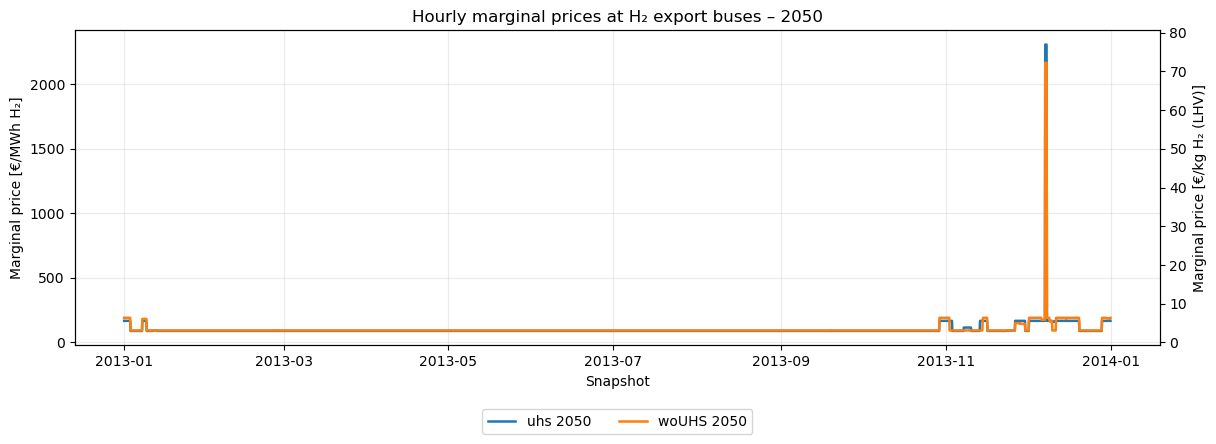

In [466]:
def h2_export_buses(net) -> pd.Index:
    """
    Identify H2 export buses (robust heuristic for PyPSA-Earth):
    - bus name contains 'H2 export'
    - OR contains 'export bus' and 'H2'
    """
    names = pd.Index(net.buses.index.astype(str))
    s = names.to_series(index=net.buses.index)

    m1 = s.str.contains(r"\bh2\s*export\b", case=False, na=False)
    m2 = s.str.contains(r"\bexport\s*bus\b", case=False, na=False) & s.str.contains(r"\bh2\b", case=False, na=False)

    return net.buses.index[m1 | m2]


def hourly_export_marginal_price(net, agg="mean") -> pd.Series:
    """
    Hourly marginal price time series [€/MWh] at H2 export bus(es).
    If multiple export buses exist, aggregate across buses per snapshot.
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found (no marginal prices stored).")

    buses = h2_export_buses(net)
    if len(buses) == 0:
        raise ValueError("No H2 export buses found. Adjust the heuristic in h2_export_buses().")

    mp = net.buses_t.marginal_price[buses]  # snapshots x buses (DataFrame or Series)

    if isinstance(mp, pd.Series):
        s = mp.copy()
    else:
        if agg == "mean":
            s = mp.mean(axis=1)
        elif agg == "median":
            s = mp.median(axis=1)
        elif agg == "min":
            s = mp.min(axis=1)
        elif agg == "max":
            s = mp.max(axis=1)
        else:
            raise ValueError("agg must be one of: mean, median, min, max")

    s.name = f"H2 export marginal price ({agg})"
    return s


# ============================================================
# Build series for both scenarios and align
# ============================================================

# Compute (€/MWh)
p_uhs = hourly_export_marginal_price(uhs, agg="mean")
p_wo  = hourly_export_marginal_price(woUHS, agg="mean")

# Align snapshots
idx = p_uhs.index.intersection(p_wo.index)
p_uhs = p_uhs.loc[idx]
p_wo  = p_wo.loc[idx]


# ============================================================
# Dual-axis plot (€/MWh and €/kg via LHV)
# ============================================================

H2_LHV_KWH_PER_KG = 33.33
KG_PER_MWH = 1000.0 / H2_LHV_KWH_PER_KG  # ≈ 30.0 kg/MWh

fig, ax_left = plt.subplots(figsize=(14, 5))

# Left axis: €/MWh
l1, = ax_left.plot(p_uhs.index, p_uhs.values, label="uhs 2050", linewidth=1.8)
l2, = ax_left.plot(p_wo.index,  p_wo.values,  label="woUHS 2050", linewidth=1.8)

ax_left.set_title("Hourly marginal prices at H₂ export buses – 2050")
ax_left.set_xlabel("Snapshot")
ax_left.set_ylabel("Marginal price [€/MWh H₂]")
ax_left.grid(True, alpha=0.25)

# Right axis: €/kg (LHV)
ax_right = ax_left.twinx()
ymin, ymax = ax_left.get_ylim()
ax_right.set_ylim(ymin / KG_PER_MWH, ymax / KG_PER_MWH)
ax_right.set_ylabel("Marginal price [€/kg H₂ (LHV)]")

# Legend below plot
ax_left.legend(
    handles=[l1, l2],
    labels=["uhs 2050", "woUHS 2050"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=True
)

fig.subplots_adjust(bottom=0.25)
plt.show()

##### Hourly Export Quantity

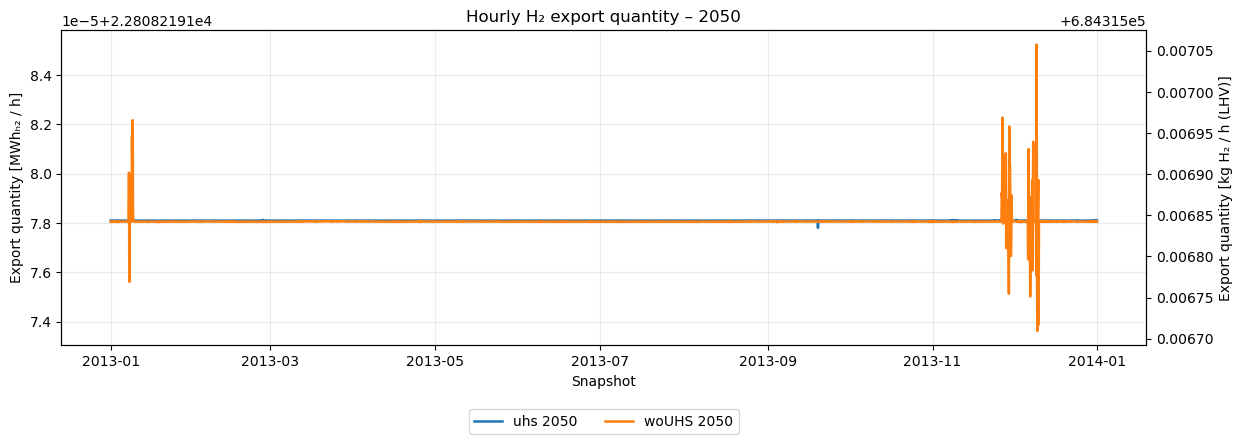

In [467]:
def h2_export_buses(net) -> pd.Index:
    """
    Identify H2 export buses (robust heuristic for PyPSA-Earth):
    - bus name contains 'H2 export'
    - OR contains 'export bus' and 'H2'
    """
    names = pd.Index(net.buses.index.astype(str))
    s = names.to_series(index=net.buses.index)

    m1 = s.str.contains(r"\bh2\s*export\b", case=False, na=False)
    m2 = s.str.contains(r"\bexport\s*bus\b", case=False, na=False) & s.str.contains(r"\bh2\b", case=False, na=False)

    return net.buses.index[m1 | m2]


# ============================================================
# Hourly H2 export quantity
# ============================================================

def hourly_h2_export_quantity(net, agg="sum") -> pd.Series:
    """
    Hourly H2 export quantity time series [MWh/h].

    Uses link flows feeding the H2 export bus.
    If multiple export links exist, aggregates across them per snapshot.

    agg:
      - 'sum'  : total export (recommended)
      - 'mean' : mean across export links
    """
    buses = h2_export_buses(net)
    if len(buses) == 0:
        raise ValueError("No H2 export buses found. Adjust heuristic if needed.")

    # Export links: anything that feeds INTO the export bus
    links = net.links.copy()

    export_links = links[links.bus1.isin(buses)]
    if export_links.empty:
        raise ValueError("No links feeding the H2 export bus found.")

    # p1 is flow into bus1 by PyPSA convention
    p1 = net.links_t.p1[export_links.index]  # MW

    # Robust sign handling
    cons_pos = p1.clip(lower=0).sum().sum()
    cons_neg = (-p1).clip(lower=0).sum().sum()
    flow = p1.clip(lower=0) if cons_pos >= cons_neg else (-p1).clip(lower=0)

    if agg == "sum":
        s = flow.sum(axis=1)
    elif agg == "mean":
        s = flow.mean(axis=1)
    else:
        raise ValueError("agg must be 'sum' or 'mean'")

    s.name = "H2 export quantity"
    return s


# ============================================================
# Build series for both scenarios and align
# ============================================================

# Export quantity in MW (= MWh/h)
q_uhs = hourly_h2_export_quantity(uhs, agg="sum")
q_wo  = hourly_h2_export_quantity(woUHS, agg="sum")

# Align snapshots
idx = q_uhs.index.intersection(q_wo.index)
q_uhs = q_uhs.loc[idx]
q_wo  = q_wo.loc[idx]


# ============================================================
# Dual-axis plot (MWh/h and kg/h via LHV)
# ============================================================

H2_LHV_KWH_PER_KG = 33.33
KG_PER_MWH = 1000.0 / H2_LHV_KWH_PER_KG  # ≈ 30.0 kg/MWh

fig, ax_left = plt.subplots(figsize=(14, 5))

# Left axis: MWh/h
l1, = ax_left.plot(q_uhs.index, q_uhs.values, label="uhs 2050", linewidth=1.8)
l2, = ax_left.plot(q_wo.index,  q_wo.values,  label="woUHS 2050", linewidth=1.8)

ax_left.set_title("Hourly H₂ export quantity – 2050")
ax_left.set_xlabel("Snapshot")
ax_left.set_ylabel("Export quantity [MWhₕ₂ / h]")
ax_left.grid(True, alpha=0.25)

# Right axis: kg/h (LHV)
ax_right = ax_left.twinx()
ymin, ymax = ax_left.get_ylim()
ax_right.set_ylim(ymin * KG_PER_MWH, ymax * KG_PER_MWH)
ax_right.set_ylabel("Export quantity [kg H₂ / h (LHV)]")

# Legend below plot
ax_left.legend(
    handles=[l1, l2],
    labels=["uhs 2050", "woUHS 2050"],
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=True
)

fig.subplots_adjust(bottom=0.25)
plt.show()

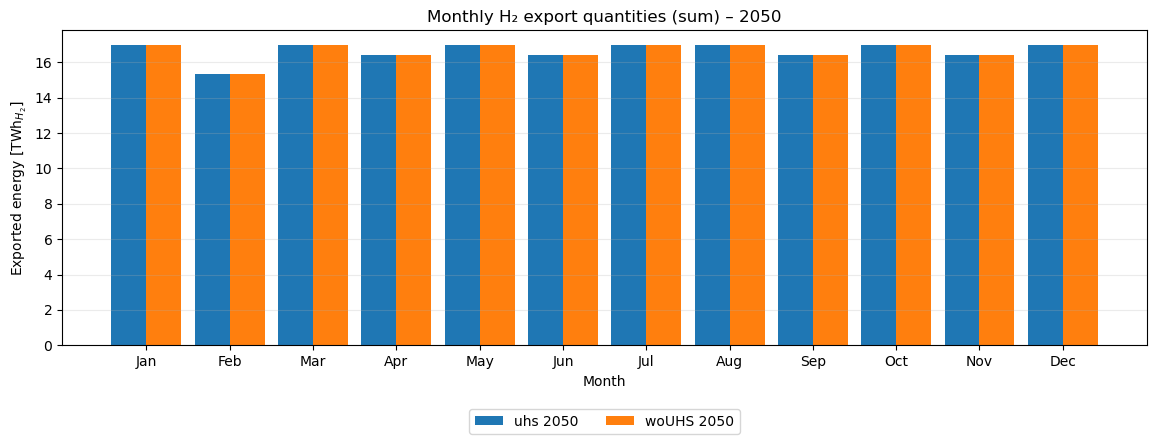

In [468]:
# aggregate export quantitys to monthly sums and plot them for uhs and woUHS next to each other
def h2_export_buses(net) -> pd.Index:
    names = pd.Index(net.buses.index.astype(str))
    s = names.to_series(index=net.buses.index)
    m1 = s.str.contains(r"\bh2\s*export\b", case=False, na=False)
    m2 = s.str.contains(r"\bexport\s*bus\b", case=False, na=False) & s.str.contains(r"\bh2\b", case=False, na=False)
    return net.buses.index[m1 | m2]


def hourly_h2_export_quantity(net, agg="sum") -> pd.Series:
    """
    Hourly H2 export quantity time series [MWh/h] (i.e., MW).
    Uses all links that feed into the H2 export bus (bus1 in export buses).
    """
    buses = h2_export_buses(net)
    if len(buses) == 0:
        raise ValueError("No H2 export buses found. Adjust heuristic in h2_export_buses().")

    links = net.links.copy()
    export_links = links[links.bus1.isin(buses)]
    if export_links.empty:
        raise ValueError("No links feeding the H2 export bus found.")

    p1 = net.links_t.p1[export_links.index]  # MW

    # Robust sign handling
    pos = p1.clip(lower=0).sum().sum()
    neg = (-p1).clip(lower=0).sum().sum()
    flow = p1.clip(lower=0) if pos >= neg else (-p1).clip(lower=0)

    s = flow.sum(axis=1) if agg == "sum" else flow.mean(axis=1)
    s.name = "H2 export quantity [MWh/h]"
    return s


# ============================================================
# Snapshot weights -> hours per snapshot (needed for correct monthly MWh)
# ============================================================

def snapshot_hours(net) -> pd.Series:
    """
    Returns hours per snapshot as a Series indexed by net.snapshots.
    Uses net.snapshot_weightings['generators'] if present, else 1 hour per snapshot.
    """
    if hasattr(net, "snapshot_weightings") and net.snapshot_weightings is not None:
        try:
            if "generators" in net.snapshot_weightings:
                w = net.snapshot_weightings["generators"].copy()
                # In PyPSA-Earth this is typically hours; keep as-is.
                return w.reindex(net.snapshots)
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)


# ============================================================
# Monthly aggregation: sum_t (MW * hours) => MWh per month
# ============================================================

def monthly_export_mwh(net) -> pd.Series:
    q = hourly_h2_export_quantity(net, agg="sum")         # MW
    h = snapshot_hours(net).reindex(q.index).fillna(0.0)  # hours
    e = q * h                                             # MWh per snapshot

    # Ensure DateTimeIndex for resample
    if not isinstance(e.index, pd.DatetimeIndex):
        e.index = pd.to_datetime(e.index)

    m = e.resample("MS").sum()  # Month Start frequency
    m.name = "Monthly H2 export [MWh]"
    return m


# ============================================================
# Compute monthly sums for both scenarios
# ============================================================

m_uhs = monthly_export_mwh(uhs)
m_wo  = monthly_export_mwh(woUHS)

# Align months
months = m_uhs.index.union(m_wo.index)
m_uhs = m_uhs.reindex(months).fillna(0.0)
m_wo  = m_wo.reindex(months).fillna(0.0)

# Convert to TWh for nicer axis
t_uhs = m_uhs / 1e6
t_wo  = m_wo  / 1e6


# ============================================================
# Plot: side-by-side bars per month (uhs vs woUHS)
# ============================================================

fig, ax = plt.subplots(figsize=(14, 5))

x = np.arange(len(months))
width = 0.42

ax.bar(x - width/2, t_uhs.values, width=width, label="uhs 2050")
ax.bar(x + width/2, t_wo.values,  width=width, label="woUHS 2050")

ax.set_title("Monthly H₂ export quantities (sum) – 2050")
ax.set_ylabel("Exported energy [TWh$_{H_2}$]")
ax.set_xlabel("Month")
ax.grid(True, axis="y", alpha=0.25)

ax.set_xticks(x)
ax.set_xticklabels([d.strftime("%b") for d in months], rotation=0)

# Legend below the plot
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=True
)

fig.subplots_adjust(bottom=0.25)
plt.show()

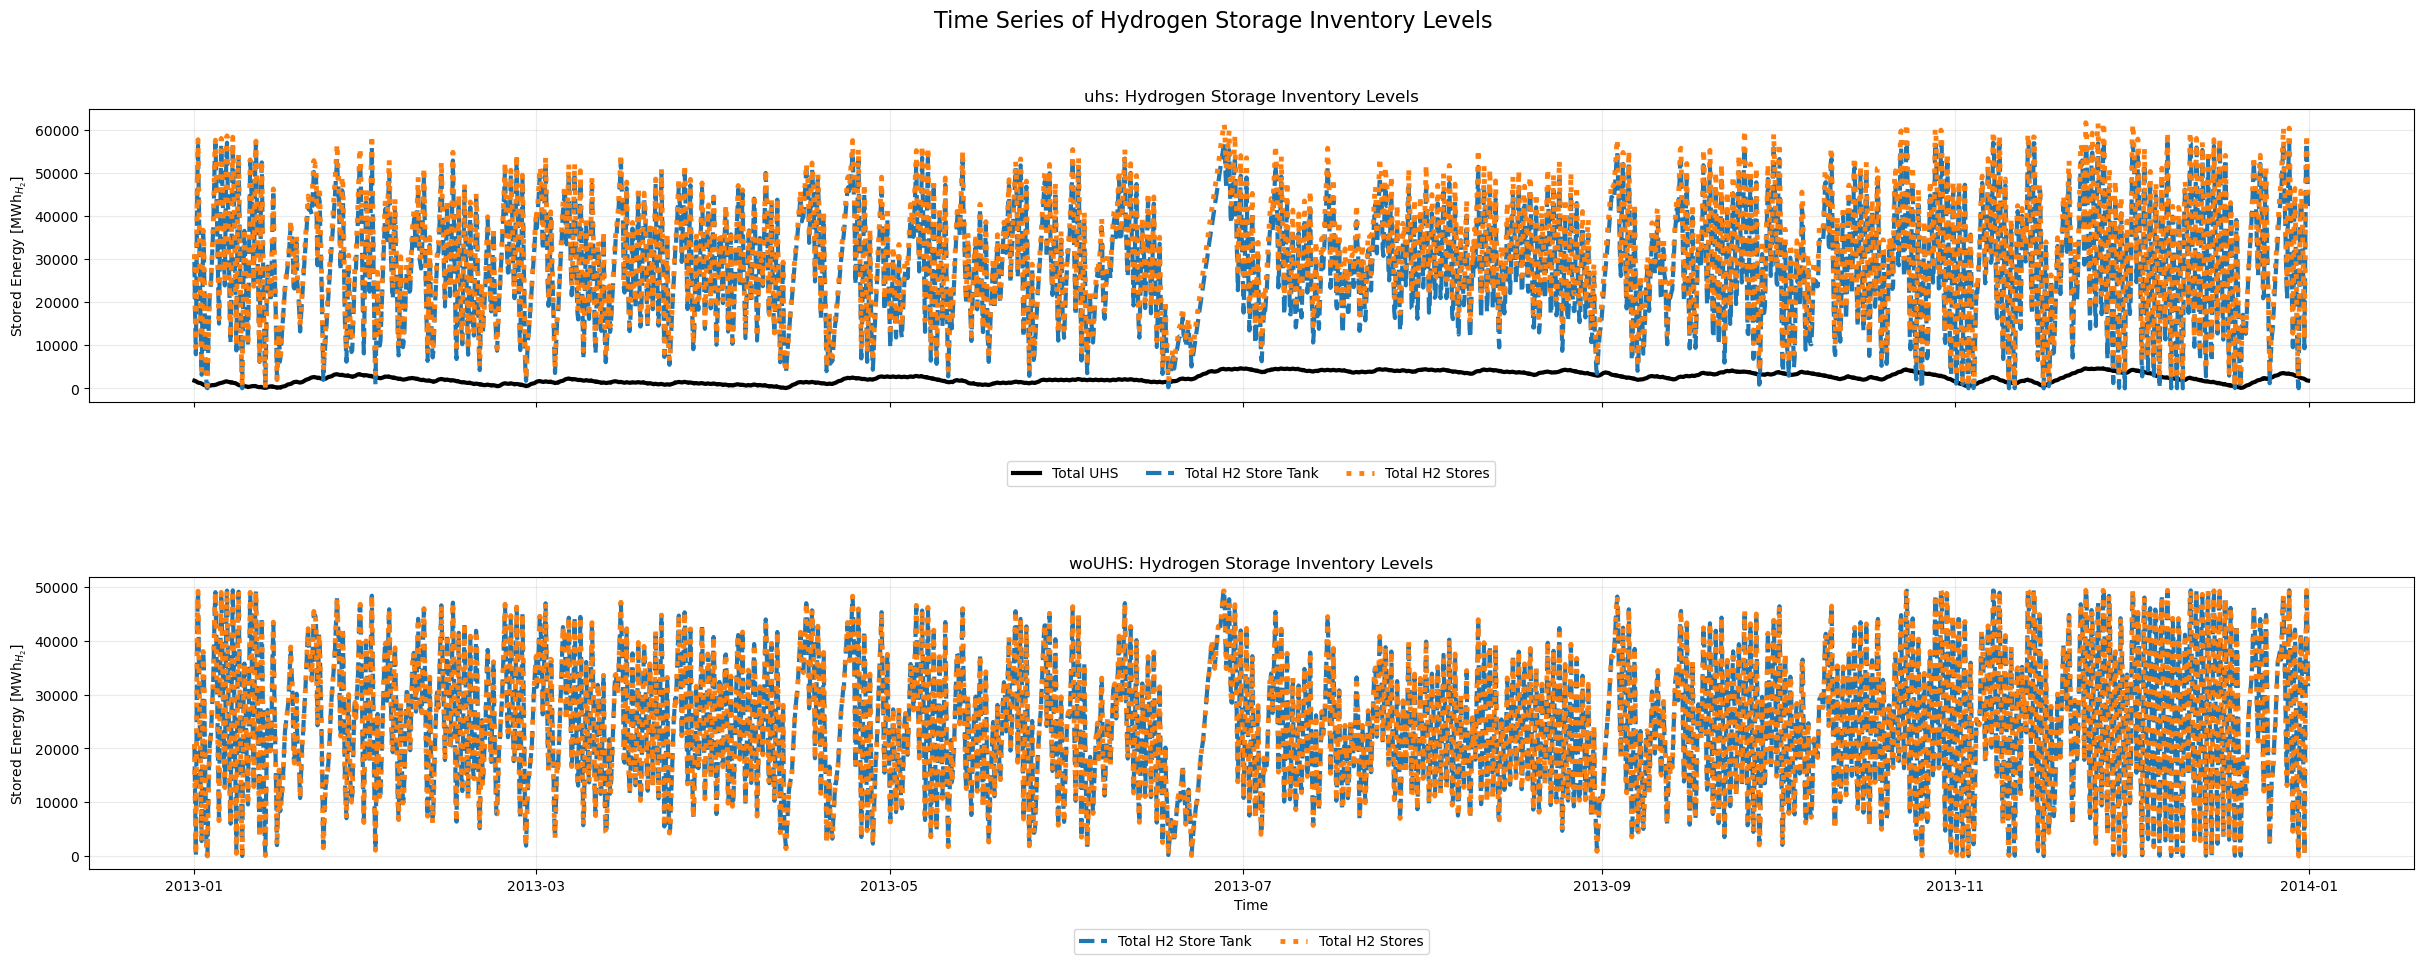

In [469]:
def _h2_store_groups(net):
    """
    Return indices for different H2 store groups.
    """
    stores = net.stores.copy()

    h2_mask = stores.carrier.astype(str).str.contains("H2", case=False, na=False)

    uhs = stores.index[stores.carrier == "H2 UHS"]
    other_h2 = stores.index[h2_mask & (stores.carrier != "H2 UHS")]

    return uhs, other_h2


def _plot_h2_store_totals_subplot(ax, net, title_prefix):
    """
    Plot only aggregated H2 storage levels:
      - Total UHS
      - Total H2 Store Tank (non-UHS)
      - Total H2 Stores (all)
    """
    if not hasattr(net, "stores_t") or not hasattr(net.stores_t, "e"):
        raise ValueError("net.stores_t.e not found – store time series missing.")

    uhs_idx, other_idx = _h2_store_groups(net)

    if len(uhs_idx) + len(other_idx) == 0:
        raise ValueError("No H2 stores found.")

    e = net.stores_t.e.loc[:, uhs_idx.union(other_idx)]  # MWh

    total_uhs = e[uhs_idx].sum(axis=1) if len(uhs_idx) > 0 else None
    total_other = e[other_idx].sum(axis=1) if len(other_idx) > 0 else None
    total_all = e.sum(axis=1)

    # --- Plot lines
    if total_uhs is not None:
        ax.plot(
            total_uhs.index,
            total_uhs.values,
            linewidth=3.0,
            color="black",
            label="Total UHS"
        )

    if total_other is not None:
        ax.plot(
            total_other.index,
            total_other.values,
            linewidth=3.0,
            linestyle="--",
            label="Total H2 Store Tank"
        )

    ax.plot(
        total_all.index,
        total_all.values,
        linewidth=3.5,
        linestyle=":",
        label="Total H2 Stores"
    )

    # --- Formatting
    ax.set_title(f"{title_prefix}: Hydrogen Storage Inventory Levels")
    ax.set_ylabel("Stored Energy [MWh$_{H_2}$]")
    ax.grid(True, alpha=0.25)

    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.18),
        ncol=3,
        frameon=True
    )


# ============================================================
# Two subplots: uhs vs woUHS
# ============================================================

fig, axes = plt.subplots(
    2, 1,
    figsize=(30, 10),
    sharex=True
)

_plot_h2_store_totals_subplot(axes[0], uhs, "uhs")
_plot_h2_store_totals_subplot(axes[1], woUHS, "woUHS")

axes[1].set_xlabel("Time")

fig.suptitle(
    "Time Series of Hydrogen Storage Inventory Levels",
    fontsize=16,
    y=0.98
)

fig.subplots_adjust(hspace=0.6, bottom=0.12)
plt.show()

##### Hourly Export Revenue

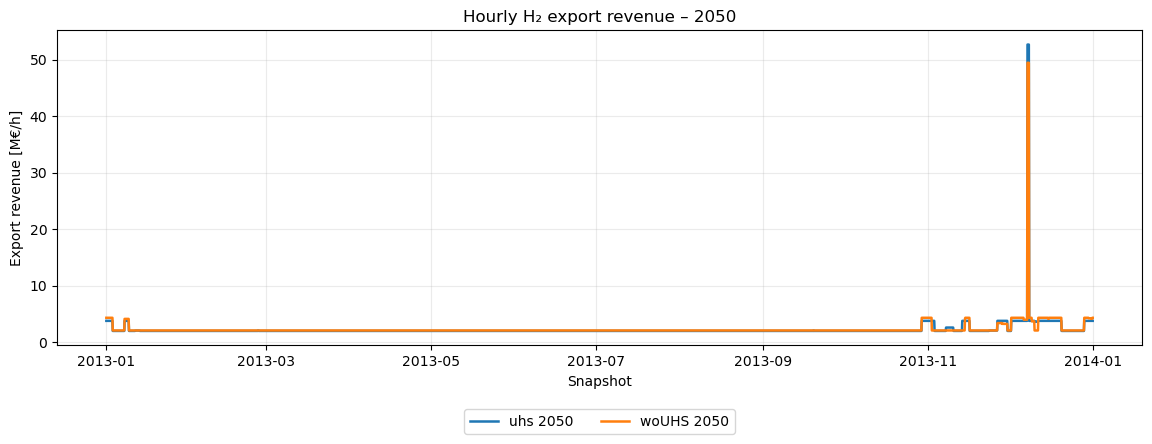

In [470]:
def h2_export_buses(net) -> pd.Index:
    """
    Identify H2 export buses (robust heuristic for PyPSA-Earth):
    - bus name contains 'H2 export'
    - OR contains 'export bus' and 'H2'
    """
    names = pd.Index(net.buses.index.astype(str))
    s = names.to_series(index=net.buses.index)
    m1 = s.str.contains(r"\bh2\s*export\b", case=False, na=False)
    m2 = s.str.contains(r"\bexport\s*bus\b", case=False, na=False) & s.str.contains(r"\bh2\b", case=False, na=False)
    return net.buses.index[m1 | m2]


def hourly_export_marginal_price(net, agg="mean") -> pd.Series:
    """
    Hourly marginal price time series [€/MWh] at H2 export bus(es).
    If multiple export buses exist, aggregates across buses per snapshot.
    """
    if not hasattr(net, "buses_t") or not hasattr(net.buses_t, "marginal_price"):
        raise ValueError("net.buses_t.marginal_price not found (no marginal prices stored).")

    buses = h2_export_buses(net)
    if len(buses) == 0:
        raise ValueError("No H2 export buses found. Adjust h2_export_buses().")

    mp = net.buses_t.marginal_price[buses]  # snapshots x buses (DataFrame or Series)

    if isinstance(mp, pd.Series):
        s = mp.copy()
    else:
        if agg == "mean":
            s = mp.mean(axis=1)
        elif agg == "median":
            s = mp.median(axis=1)
        elif agg == "min":
            s = mp.min(axis=1)
        elif agg == "max":
            s = mp.max(axis=1)
        else:
            raise ValueError("agg must be one of: mean, median, min, max")

    s.name = f"H2 export marginal price ({agg}) [€/MWh]"
    return s


def hourly_h2_export_quantity(net, agg="sum") -> pd.Series:
    """
    Hourly H2 export quantity [MWh/h] (i.e., MW) as flow into export bus(es).
    Uses all links feeding into the export bus (bus1 in export buses).
    """
    buses = h2_export_buses(net)
    if len(buses) == 0:
        raise ValueError("No H2 export buses found. Adjust h2_export_buses().")

    links = net.links.copy()
    export_links = links[links.bus1.isin(buses)]
    if export_links.empty:
        raise ValueError("No links feeding the H2 export bus found.")

    p1 = net.links_t.p1[export_links.index]  # MW

    # Robust sign handling: choose direction with larger total positive flow
    pos = p1.clip(lower=0).sum().sum()
    neg = (-p1).clip(lower=0).sum().sum()
    flow = p1.clip(lower=0) if pos >= neg else (-p1).clip(lower=0)

    if agg == "sum":
        s = flow.sum(axis=1)
    elif agg == "mean":
        s = flow.mean(axis=1)
    else:
        raise ValueError("agg must be 'sum' or 'mean'")

    s.name = "H2 export quantity [MWh/h]"
    return s


# ============================================================
# Hourly export revenue (€/h): quantity [MWh/h] * price [€/MWh]
# ============================================================

def hourly_export_revenue(net, price_agg="mean") -> pd.Series:
    q = hourly_h2_export_quantity(net, agg="sum")          # MWh/h
    p = hourly_export_marginal_price(net, agg=price_agg)   # €/MWh

    idx = q.index.intersection(p.index)
    q = q.loc[idx]
    p = p.loc[idx]

    rev = q * p  # €/h
    rev.name = "H2 export revenue [€/h]"
    return rev


# ============================================================
# Compute + align both scenarios
# ============================================================

rev_uhs = hourly_export_revenue(uhs, price_agg="mean")
rev_wo  = hourly_export_revenue(woUHS, price_agg="mean")

idx = rev_uhs.index.intersection(rev_wo.index)
rev_uhs = rev_uhs.loc[idx]
rev_wo  = rev_wo.loc[idx]


# ============================================================
# Plot (one line per scenario)
# ============================================================

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(rev_uhs.index, rev_uhs.values / 1e6, label="uhs 2050", linewidth=1.8)
ax.plot(rev_wo.index,  rev_wo.values  / 1e6, label="woUHS 2050", linewidth=1.8)

ax.set_title("Hourly H₂ export revenue – 2050")
ax.set_xlabel("Snapshot")
ax.set_ylabel("Export revenue [M€/h]")
ax.grid(True, alpha=0.25)

# Legend below plot
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=2,
    frameon=True
)

fig.subplots_adjust(bottom=0.25)
plt.show()

#### Supply stabilizing effect of H2 Stores

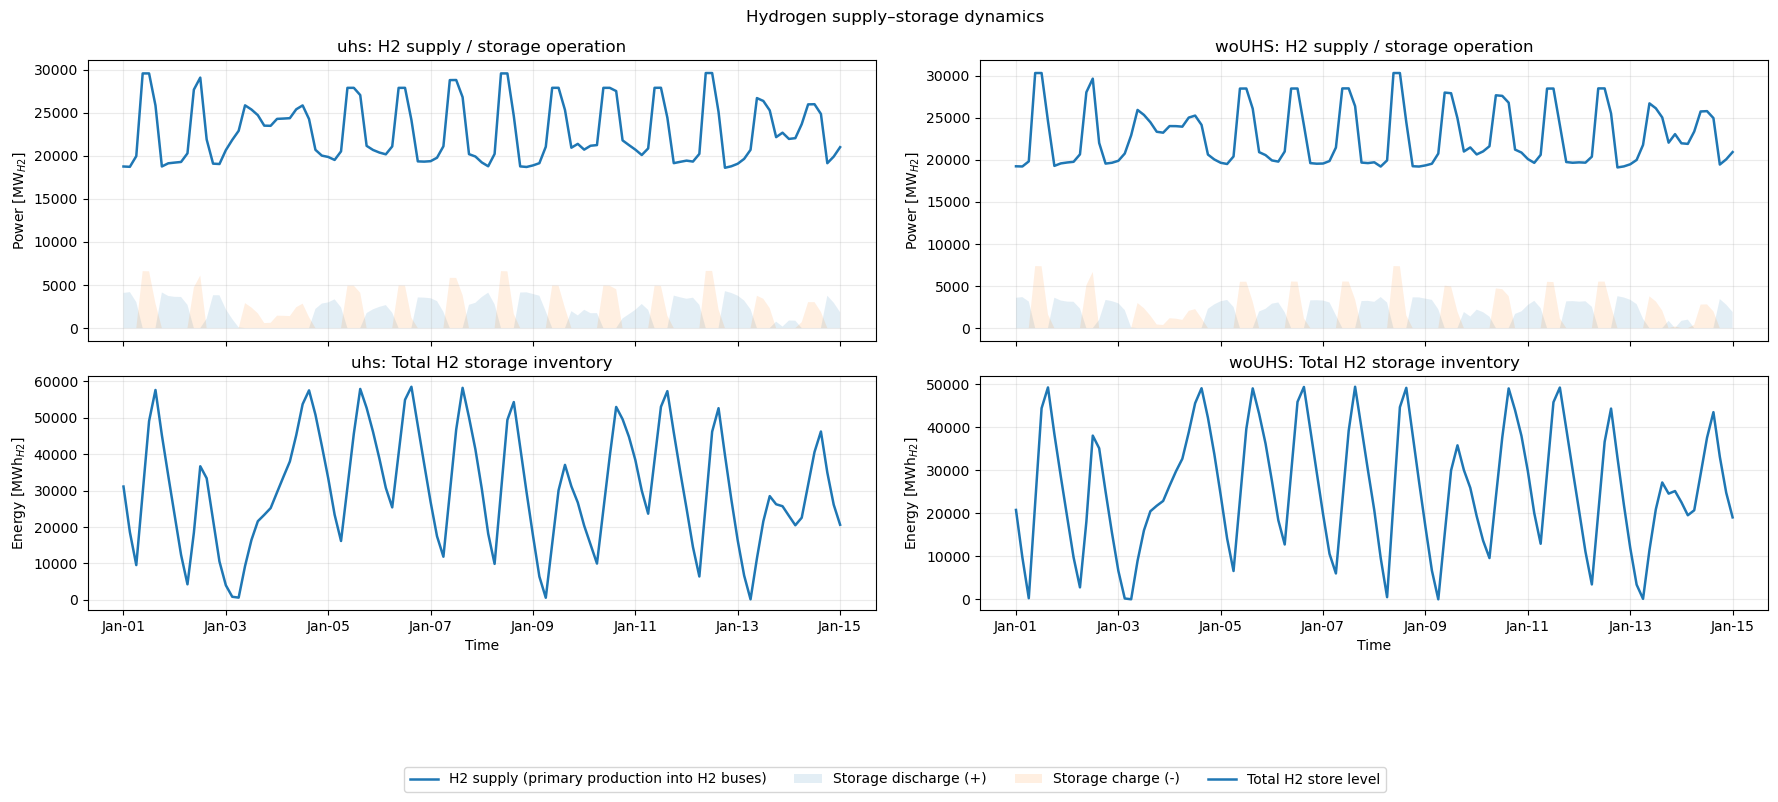

In [471]:
def _ensure_dt_index(x):
    if not isinstance(x.index, pd.DatetimeIndex):
        x = x.copy()
        x.index = pd.to_datetime(x.index)
    return x


def _h2_buses(net) -> pd.Index:
    """Project convention: hydrogen buses are those with carrier == 'H2'."""
    return net.buses.index[net.buses.carrier == "H2"]


def _h2_store_ids(net) -> pd.Index:
    """All H2-related stores by store carrier name (includes H2 UHS and H2 tanks)."""
    if not hasattr(net, "stores") or net.stores.empty:
        return pd.Index([])
    return net.stores.index[net.stores.carrier.astype(str).str.contains("H2", case=False, na=False)]


def _link_net_injection_to_h2(net, link_idx: pd.Index) -> pd.Series:
    """
    Net injection into H2 buses from a given subset of links [MW].
    Positive => net injection into H2 buses. Negative => net withdrawal from H2 buses.
    Uses: injection at a bus is approximately -p_k for that port.
    """
    h2 = _h2_buses(net)
    s = pd.Series(0.0, index=net.snapshots)

    for k in range(5):
        bus_col = f"bus{k}"
        p_col = f"p{k}"
        if bus_col in net.links.columns and hasattr(net.links_t, p_col):
            # Only consider selected links
            present = net.links.index.intersection(link_idx)
            if len(present) == 0:
                continue

            # Only ports where this port bus is H2
            mask = net.links.loc[present, bus_col].isin(h2)
            if mask.any():
                idx = present[mask.values]
                pk = getattr(net.links_t, p_col)[idx]  # snapshots x links
                inj = (-pk).sum(axis=1)               # injection into H2 buses from these ports
                s = s.add(inj, fill_value=0.0)

    return _ensure_dt_index(s)


def _is_h2_bus(net, buses: pd.Series) -> pd.Series:
    h2 = set(_h2_buses(net))
    return buses.isin(h2)


def _final_h2_offtake_links(net, production_carriers, pipeline_carriers) -> pd.Index:
    """
    Links that represent *final* offtake from the H2 system:
    - at least one port connected to an H2 bus
    - at least one port connected to a non-H2 bus (i.e., crosses the H2 boundary)
    - exclude production tech carriers (electrolysis/SMR etc.)
    - exclude H2-H2 pipelines (internal transport)
    """
    links = net.links.copy()

    # Identify per-link whether it touches H2 and non-H2 buses
    touches_h2 = pd.Series(False, index=links.index)
    touches_non_h2 = pd.Series(False, index=links.index)

    for k in range(5):
        bus_col = f"bus{k}"
        if bus_col in links.columns:
            b = links[bus_col]
            m_h2 = _is_h2_bus(net, b)
            touches_h2 |= m_h2
            touches_non_h2 |= ~m_h2 & b.notna()

    crosses_boundary = touches_h2 & touches_non_h2

    # Exclusions
    is_prod = links.carrier.isin(production_carriers)
    is_pipe = links.carrier.isin(pipeline_carriers)

    idx = links.index[crosses_boundary & (~is_prod) & (~is_pipe)]
    return idx


def _production_links(net, production_carriers) -> pd.Index:
    """Links that are considered primary H2 producers."""
    links = net.links.copy()
    idx = links.index[links.carrier.isin(production_carriers)]
    return idx


def _h2_store_power(net) -> pd.Series:
    """
    Total H2-store power [MW]:
      + = discharge (injection to H2)
      - = charge (withdrawal from H2)
    """
    sids = _h2_store_ids(net)
    if len(sids) == 0:
        return _ensure_dt_index(pd.Series(0.0, index=net.snapshots))

    if not hasattr(net, "stores_t") or not hasattr(net.stores_t, "p"):
        raise ValueError("net.stores_t.p not found – store power time series missing.")

    s = net.stores_t.p[sids].sum(axis=1)
    return _ensure_dt_index(s)


def _h2_store_energy(net) -> pd.Series:
    """Total H2-store energy level [MWh]."""
    sids = _h2_store_ids(net)
    if len(sids) == 0:
        return _ensure_dt_index(pd.Series(0.0, index=net.snapshots))

    if not hasattr(net, "stores_t") or not hasattr(net.stores_t, "e"):
        raise ValueError("net.stores_t.e not found – store energy time series missing.")

    s = net.stores_t.e[sids].sum(axis=1)
    return _ensure_dt_index(s)


def _plotA_signals(
    net,
    production_carriers=("H2 Electrolysis", "SMR", "SMR CC"),
    pipeline_carriers=("H2 pipeline", "H2 pipeline repurposed")
):
    """
    Build corrected Plot A signals:
      Supply   = primary H2 production into H2 buses (from selected production carriers)
      Demand   = final H2 offtake crossing from H2 buses to non-H2 buses (excluding production & pipelines)
      Storage  = store charge/discharge from stores_t.p
      Level    = store inventory from stores_t.e
    """
    prod_idx = _production_links(net, production_carriers)
    off_idx  = _final_h2_offtake_links(net, production_carriers, pipeline_carriers)

    net_inj_prod = _link_net_injection_to_h2(net, prod_idx)   # MW, expected >=0
    net_inj_off  = _link_net_injection_to_h2(net, off_idx)    # MW, expected <=0 (withdrawal)

    supply = net_inj_prod.clip(lower=0.0)
    demand = (-net_inj_off).clip(lower=0.0)

    store_p = _h2_store_power(net)
    store_e = _h2_store_energy(net)

    return dict(
        supply=supply,                                  # MW
        demand=demand,                                  # MW
        storage_discharge=store_p.clip(lower=0.0),       # MW
        storage_charge=(-store_p).clip(lower=0.0),       # MW
        storage_level=store_e                            # MWh
    )


def _slice_signals(sig: dict, start=None, end=None) -> dict:
    idx = sig["supply"].index
    if start is None:
        start = idx.min()
    else:
        start = pd.to_datetime(start)
    if end is None:
        end = idx.max()
    else:
        end = pd.to_datetime(end)

    return {k: v.loc[start:end] for k, v in sig.items()}, start, end


# ============================================================
# Corrected Plot A with configurable time window
# ============================================================

def plot_A_corrected(
    uhs_net,
    wo_net,
    start=None,
    end=None,
    production_carriers=("H2 Electrolysis", "SMR", "SMR CC"),
    pipeline_carriers=("H2 pipeline", "H2 pipeline repurposed")
):
    u = _plotA_signals(uhs_net, production_carriers, pipeline_carriers)
    w = _plotA_signals(wo_net,  production_carriers, pipeline_carriers)

    # Align time index across both scenarios
    common = u["supply"].index.intersection(w["supply"].index)
    for sig in (u, w):
        for k in sig:
            sig[k] = sig[k].loc[common]

    # Slice (configurable window)
    u, s, e = _slice_signals(u, start=start, end=end)
    w, _, _ = _slice_signals(w, start=s, end=e)

    fig, axes = plt.subplots(
        2, 2, figsize=(18, 7.5), sharex="col",
        gridspec_kw={"height_ratios": [1.2, 1.0]}
    )

    # ---- Top row: flows
    for ax, sig, title in zip(axes[0], [u, w], ["uhs", "woUHS"]):
        ax.plot(sig["supply"].index, sig["supply"].values,
                linewidth=1.8, label="H2 supply (primary production into H2 buses)")
        # ax.plot(sig["demand"].index, sig["demand"].values,
                # linewidth=1.8, label="H2 demand (final offtake from H2 buses)")

        ax.fill_between(sig["storage_discharge"].index, 0, sig["storage_discharge"].values,
                        alpha=0.12, label="Storage discharge (+)")
        ax.fill_between(sig["storage_charge"].index, 0, sig["storage_charge"].values,
                        alpha=0.12, label="Storage charge (-)")

        ax.set_title(f"{title}: H2 supply / storage operation")
        ax.set_ylabel("Power [MW$_{H2}$]")
        ax.grid(True, alpha=0.25)

    # ---- Bottom row: inventory
    for ax, sig, title in zip(axes[1], [u, w], ["uhs", "woUHS"]):
        ax.plot(sig["storage_level"].index, sig["storage_level"].values,
                linewidth=1.8, label="Total H2 store level")
        ax.set_title(f"{title}: Total H2 storage inventory")
        ax.set_ylabel("Energy [MWh$_{H2}$]")
        ax.grid(True, alpha=0.25)
        ax.set_xlabel("Time")

    # ---- Figure-level legend below
    handles, labels = [], []
    for ax in [axes[0, 0], axes[1, 0]]:
        h, l = ax.get_legend_handles_labels()
        for hh, ll in zip(h, l):
            if ll not in labels:
                handles.append(hh)
                labels.append(ll)

    fig.legend(
        handles, labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.02),
        ncol=4,
        frameon=True
    )

    fig.suptitle(f"Hydrogen supply–storage dynamics", y=0.98)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.18)
    for ax in axes.flatten():
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
    plt.show()



plot_A_corrected(uhs, woUHS, start="2013-01-01", end="2013-01-15")

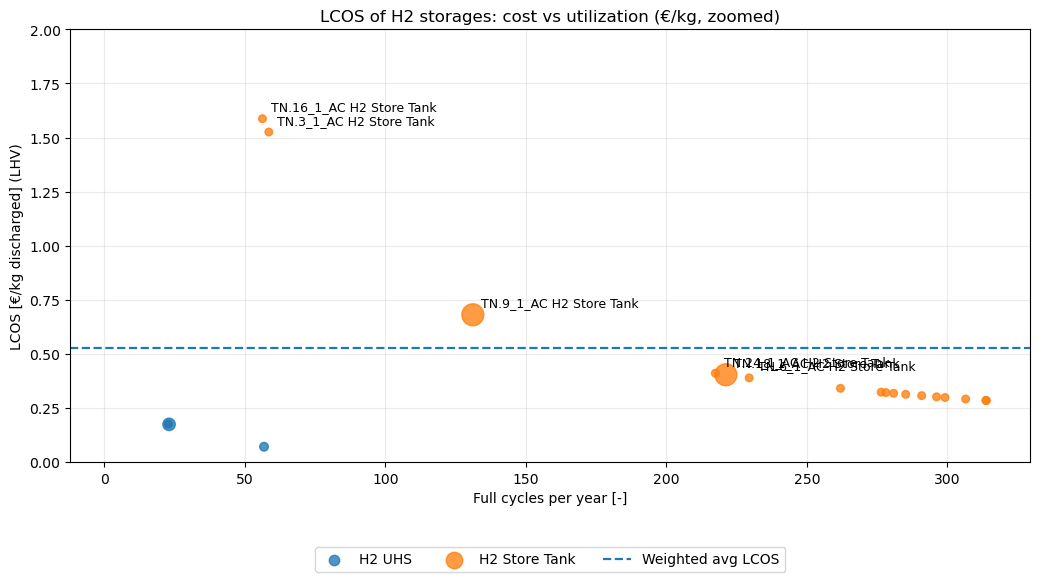

In [481]:
def plot_lcos_scatter_kg_zoom(
    lcos_df,
    zoom_mode="p99",          # "p99" (robust) or "manual"
    y_max_kg=None,            # only used if zoom_mode="manual"
    annotate_top_n=6,
    title="LCOS of H2 storages: cost vs utilization (€/kg, zoomed)"
):
    """
    Scatter plot:
      x = full_cycles_per_year
      y = LCOS_EUR_per_kg
      size = e_nom_used_MWh (proxy for scale)
      color = carrier
      dashed line = weighted-average LCOS (€/kg) (throughput-weighted)

    Zoom:
      - zoom_mode="p99": y-limit = 99th percentile (caps extreme outliers)
      - zoom_mode="manual": y-limit = y_max_kg
    """
    df = lcos_df.copy()
    if "LCOS_EUR_per_kg" not in df.columns:
        raise ValueError("Expected column 'LCOS_EUR_per_kg' in lcos_df.")
    if "full_cycles_per_year" not in df.columns:
        raise ValueError("Expected column 'full_cycles_per_year' in lcos_df.")
    if "e_nom_used_MWh" not in df.columns:
        raise ValueError("Expected column 'e_nom_used_MWh' in lcos_df.")
    if "carrier" not in df.columns:
        raise ValueError("Expected column 'carrier' in lcos_df.")

    # Weighted avg LCOS line (€/kg)
    wavg_kg = df.attrs.get("weighted_LCOS_EUR_per_kg", None)
    if wavg_kg is None:
        # fallback: compute from discharged_MWh if present
        if "discharged_MWh" in df.columns:
            eps = 1e-9
            wavg_mwh = float((df["LCOS_EUR_per_MWh"] * df["discharged_MWh"]).sum() / (df["discharged_MWh"].sum() + eps))
            wavg_kg = wavg_mwh * (33.33 / 1000.0)

    # Marker size scaling
    size = df["e_nom_used_MWh"].values.astype(float)
    s_min, s_max = np.percentile(size, 5), np.percentile(size, 95)
    s_scaled = 30 + 220 * (np.clip(size, s_min, s_max) - s_min) / max(s_max - s_min, 1e-9)

    # Determine zoom limit
    y = df["LCOS_EUR_per_kg"].values.astype(float)
    if zoom_mode == "p99":
        y_cap = float(np.nanpercentile(y, 99))
        # ensure we still see the weighted average line comfortably
        if wavg_kg is not None:
            y_cap = max(y_cap, 1.6 * float(wavg_kg))
    elif zoom_mode == "manual":
        if y_max_kg is None:
            raise ValueError("For zoom_mode='manual' you must set y_max_kg.")
        y_cap = float(y_max_kg)
    else:
        raise ValueError("zoom_mode must be 'p99' or 'manual'.")

    # Plot by carrier for clean legend
    carriers = list(pd.unique(df["carrier"].astype(str)))

    fig, ax = plt.subplots(figsize=(10.5, 6))

    for carr in carriers:
        m = df["carrier"].astype(str) == carr
        ax.scatter(
            df.loc[m, "full_cycles_per_year"].values,
            df.loc[m, "LCOS_EUR_per_kg"].values,
            s=s_scaled[m.values],
            alpha=0.78,
            label=carr
        )

    # Weighted-average line
    if wavg_kg is not None:
        ax.axhline(float(wavg_kg), linewidth=1.6, linestyle="--", label="Weighted avg LCOS")

    ax.set_xlabel("Full cycles per year [-]")
    ax.set_ylabel("LCOS [€/kg discharged] (LHV)")
    ax.set_title(title)
    ax.grid(True, alpha=0.25)

    # Zoom
    ax.set_ylim(0, y_cap)

    # Annotate (highest within zoom window, so labels focus on relevant outliers)
    if annotate_top_n and annotate_top_n > 0:
        dfa = df[df["LCOS_EUR_per_kg"] <= y_cap].copy()
        top = dfa.sort_values("LCOS_EUR_per_kg", ascending=False).head(annotate_top_n)
        for name, row in top.iterrows():
            ax.annotate(
                str(name),
                (row["full_cycles_per_year"], row["LCOS_EUR_per_kg"]),
                textcoords="offset points",
                xytext=(6, 6),
                ha="left",
                fontsize=9
            )

    # Legend below plot
    ax.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.18),
        ncol=min(4, len(carriers) + 1),
        frameon=True
    )

    fig.tight_layout()
    fig.subplots_adjust(bottom=0.22)
    plt.show()


plot_lcos_scatter_kg_zoom(lcos_all, zoom_mode="manual", y_max_kg=2.0)

#### Show PV and Wind Potential

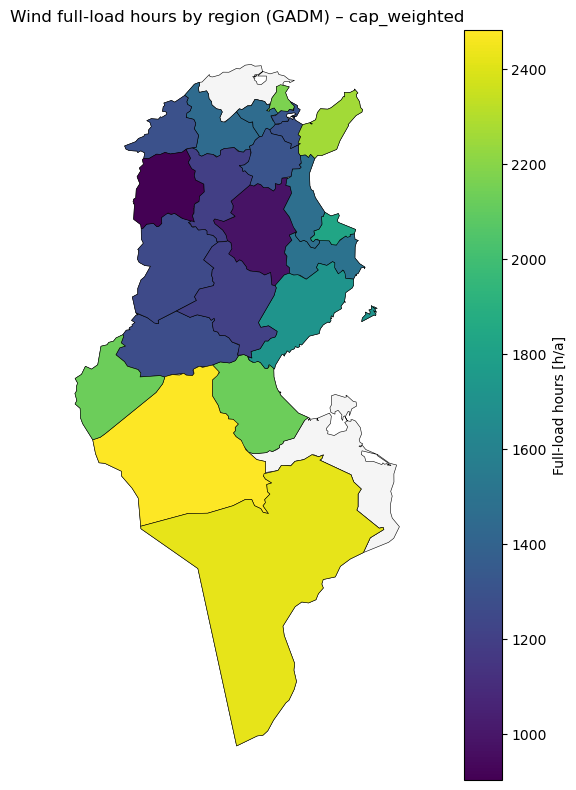

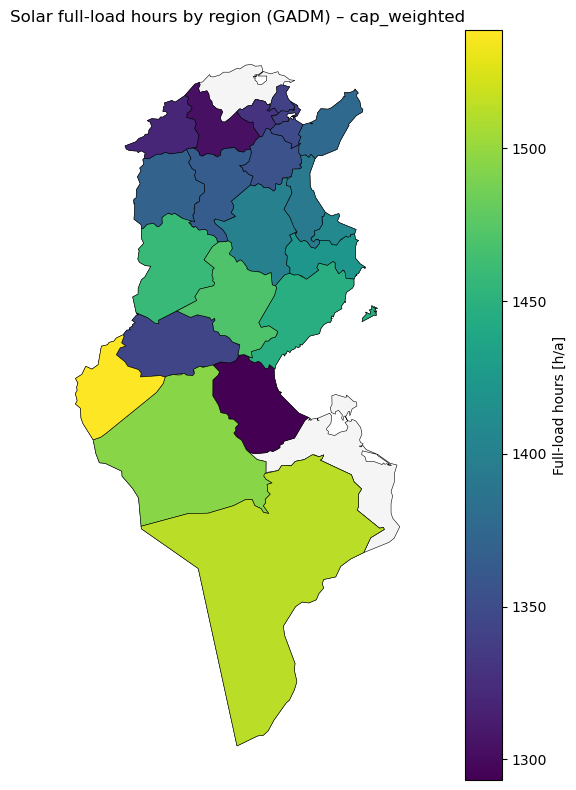

In [474]:
# ============================================================
# SETTINGS
# ============================================================

net = uhs

# Adjust carriers to your network naming
WIND_CARRIERS = ["onwind", "offwind-ac", "offwind-dc", "wind"]
SOLAR_CARRIERS = ["solar", "solar rooftop", "pv"]

# Choose how to aggregate multiple buses per polygon:
#   "mean"          -> simple average of bus FLH in the polygon
#   "cap_weighted"  -> capacity-weighted average (recommended)
AGG_METHOD = "cap_weighted"

# Optional: choose which polygon id/name column to show in titles / debugging
# If you don't know, set to None; code will still work.
REGION_NAME_COL = None  # e.g. "NAME_1" or "name" depending on your gadm_shapes

FIGSIZE = (10, 8)

# You must have:
#   gadm_shapes : GeoDataFrame with polygons, CRS EPSG:4326 (or will be converted)
# already loaded in your notebook.
# ============================================================


# ============================================================
# HELPERS
# ============================================================

def _snapshot_weights(net):
    if hasattr(net, "snapshot_weightings") and net.snapshot_weightings is not None:
        try:
            if "generators" in net.snapshot_weightings:
                return net.snapshot_weightings["generators"]
        except Exception:
            pass
    return pd.Series(1.0, index=net.snapshots)


def _bus_points_gdf(net):
    """Bus points as GeoDataFrame (EPSG:4326)."""
    buses = net.buses.copy()
    buses = buses.dropna(subset=["x", "y"])
    gdf = gpd.GeoDataFrame(
        buses,
        geometry=gpd.points_from_xy(buses["x"], buses["y"]),
        crs="EPSG:4326"
    )
    return gdf


def flh_by_bus(net, carriers):
    """
    Full-load hours per bus for given generator carriers:
      FLH_bus = sum(E_gen_bus) / sum(P_nom_bus)
    Returns:
      flh (Series indexed by bus)
      p_bus (Series indexed by bus) installed capacity [MW] used for weighting
    """
    w = _snapshot_weights(net)

    gens = net.generators.copy()
    gens = gens[gens.carrier.astype(str).isin(carriers)].copy()
    if gens.empty:
        return pd.Series(dtype=float), pd.Series(dtype=float)

    pnom_col = "p_nom_opt" if "p_nom_opt" in gens.columns else "p_nom"
    p_nom = gens[pnom_col].fillna(0.0)

    # Production time series [MW]
    p = net.generators_t.p[gens.index]
    e_mwh = (p.mul(w, axis=0)).sum(axis=0)  # MWh/a per generator

    # Aggregate to bus
    e_bus = e_mwh.groupby(gens["bus"]).sum()
    p_bus = p_nom.groupby(gens["bus"]).sum()

    flh = (e_bus / p_bus.replace(0.0, np.nan)).dropna()
    p_bus = p_bus.reindex(flh.index).fillna(0.0)

    return flh, p_bus


def aggregate_bus_metric_to_polygons(gadm_shapes, bus_gdf, metric_bus, weight_bus=None, agg_method="cap_weighted"):
    """
    Spatial join bus points -> polygons, then aggregate bus metric to polygon level.

    Returns a copy of gadm_shapes with new column 'value' (polygon-level metric).
    """
    # Ensure CRS match
    poly = gadm_shapes.copy()
    if poly.crs is None:
        poly = poly.set_crs("EPSG:4326")
    if bus_gdf.crs is None:
        bus_gdf = bus_gdf.set_crs("EPSG:4326")
    if poly.crs != bus_gdf.crs:
        bus_gdf = bus_gdf.to_crs(poly.crs)

    # Prepare bus dataframe for join
    b = bus_gdf.loc[metric_bus.index].copy()
    b["metric"] = metric_bus
    if weight_bus is not None:
        b["weight"] = weight_bus.reindex(metric_bus.index).fillna(0.0)
    else:
        b["weight"] = 1.0

    # Spatial join: assign each bus point to a polygon
    joined = gpd.sjoin(b[["metric", "weight", "geometry"]], poly, how="inner", predicate="within")
    # joined has index_right = polygon index
    if joined.empty:
        out = poly.copy()
        out["value"] = np.nan
        return out

    if agg_method == "mean":
        poly_val = joined.groupby("index_right")["metric"].mean()

    elif agg_method == "cap_weighted":
        # weighted mean: sum(metric*weight) / sum(weight)
        num = (joined["metric"] * joined["weight"]).groupby(joined["index_right"]).sum()
        den = joined["weight"].groupby(joined["index_right"]).sum().replace(0.0, np.nan)
        poly_val = (num / den)

    else:
        raise ValueError("agg_method must be 'mean' or 'cap_weighted'")

    out = poly.copy()
    out["value"] = poly_val.reindex(out.index)
    return out


def plot_polygon_map(gdf_polys, title, cmap="viridis"):
    fig, ax = plt.subplots(figsize=FIGSIZE)

    # Base polygons in light gray if NaN
    gdf_polys.plot(ax=ax, color="whitesmoke", edgecolor="black", linewidth=0.4)

    # Colored overlay where value exists
    gdf_polys.dropna(subset=["value"]).plot(
        ax=ax,
        column="value",
        cmap=cmap,
        legend=True,
        legend_kwds={"label": "Full-load hours [h/a]"},
        edgecolor="black",
        linewidth=0.4
    )

    ax.set_title(title)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()


# ============================================================
# RUN: WIND + SOLAR maps
# ============================================================

# 1) Prepare bus points once
bus_gdf = _bus_points_gdf(net)

# 2) WIND FLH per bus
wind_present = [c for c in WIND_CARRIERS if c in set(net.generators.carrier.astype(str).unique())]
if len(wind_present) == 0:
    print("No WIND carriers found. Available generator carriers:\n", net.generators.carrier.unique())
else:
    flh_wind, p_wind_bus = flh_by_bus(net, wind_present)
    wind_polys = aggregate_bus_metric_to_polygons(
        gadm_shapes, bus_gdf, flh_wind, weight_bus=p_wind_bus, agg_method=AGG_METHOD
    )
    plot_polygon_map(wind_polys, f"Wind full-load hours by region (GADM) – {AGG_METHOD}")

# 3) SOLAR FLH per bus
solar_present = [c for c in SOLAR_CARRIERS if c in set(net.generators.carrier.astype(str).unique())]
if len(solar_present) == 0:
    print("No SOLAR carriers found. Available generator carriers:\n", net.generators.carrier.unique())
else:
    flh_solar, p_solar_bus = flh_by_bus(net, solar_present)
    solar_polys = aggregate_bus_metric_to_polygons(
        gadm_shapes, bus_gdf, flh_solar, weight_bus=p_solar_bus, agg_method=AGG_METHOD
    )
    plot_polygon_map(solar_polys, f"Solar full-load hours by region (GADM) – {AGG_METHOD}")


In [475]:
solar = xr.open_dataset(solar_path)
wind = xr.open_dataset(onwind_path)

def plot_voronoi(n, carrier, voronoi, cmap, projection, title=None, filename=None):
    g = n.generators.loc[n.generators.carrier == carrier]
    br = gpd.read_file(f"../../../pypsa-earth/resources/UHS/bus_regions/regions_{voronoi}.geojson").set_index("name")
    br_area = br.to_crs("ESRI:54009")
    br_area = br_area.geometry.area * 1e-6
    br["p_nom_max"] = g.groupby("bus").sum().p_nom_max / br_area

    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"projection": projection})
    plt.rcParams.update({"font.size": 10})
    br.plot(
        ax=ax,
        column="p_nom_max",
        transform=ccrs.PlateCarree(),
        linewidth=0.25,
        edgecolor="k",
        cmap=cmap,
        vmin=0,
        vmax=br["p_nom_max"].max(),
        legend=True,
        legend_kwds={"label": r"potential density"},
    )
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS.with_scale("110m"))
    ax.set_extent(country_coordinates, crs=ccrs.PlateCarree()) 
    
    if title is not None:
        plt.title(title)

#### Wind potentials

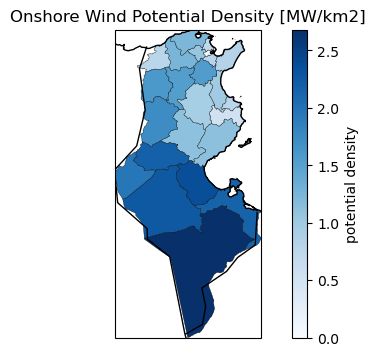

In [476]:
warnings.simplefilter(action='ignore', category=FutureWarning)
logging.getLogger("pypsa.io").setLevel(logging.ERROR)
plot_voronoi(
    pypsa.Network(network_path),
    "onwind",
    "onshore",
    "Blues",
    ccrs.PlateCarree(),
    title="Onshore Wind Potential Density [MW/km2]",
)
warnings.simplefilter(action='default', category=FutureWarning)

#### Solar potentials

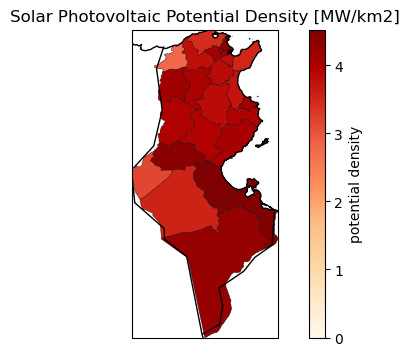

In [477]:
warnings.simplefilter(action='ignore', category=FutureWarning)
logging.getLogger("pypsa.io").setLevel(logging.ERROR)
plot_voronoi(
    pypsa.Network(network_path),
    "solar",
    "onshore",
    "OrRd",
    ccrs.PlateCarree(),
    title="Solar Photovoltaic Potential Density [MW/km2]",
)
warnings.simplefilter(action='default', category=FutureWarning)

#### Sensitivity Analysis

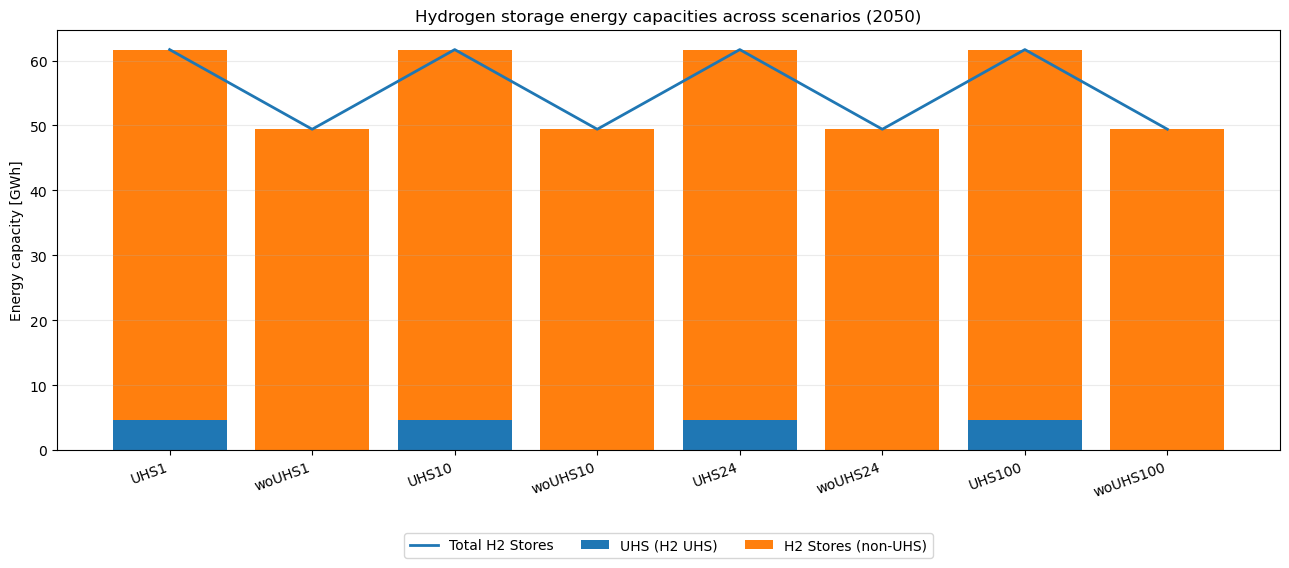

In [486]:
def _store_energy_capacity(net, idx):
    """Energy capacity [MWh] using e_nom_opt if available, else e_nom."""
    st = net.stores.loc[idx]
    if "e_nom_opt" in st.columns:
        return st["e_nom_opt"].fillna(0.0)
    return st["e_nom"].fillna(0.0)


def _h2_store_ids(net):
    """All H2-related stores by carrier name containing 'H2'."""
    if not hasattr(net, "stores") or net.stores.empty:
        return pd.Index([])
    return net.stores.index[net.stores.carrier.astype(str).str.contains("H2", case=False, na=False)]


def _uhs_store_ids(net, uhs_carrier="H2 UHS"):
    """UHS stores (carrier == 'H2 UHS')."""
    if not hasattr(net, "stores") or net.stores.empty:
        return pd.Index([])
    return net.stores.index[net.stores.carrier == uhs_carrier]


def h2_storage_capacities_gwh(net, uhs_carrier="H2 UHS"):
    """
    Returns (uhs_gwh, non_uhs_gwh, total_gwh).
    """
    h2_all = _h2_store_ids(net)
    uhs_idx = _uhs_store_ids(net, uhs_carrier=uhs_carrier)
    non_uhs_idx = h2_all.difference(uhs_idx)

    total_mwh = float(_store_energy_capacity(net, h2_all).sum()) if len(h2_all) else 0.0
    uhs_mwh   = float(_store_energy_capacity(net, uhs_idx).sum()) if len(uhs_idx) else 0.0
    non_mwh   = float(_store_energy_capacity(net, non_uhs_idx).sum()) if len(non_uhs_idx) else 0.0

    return uhs_mwh / 1e3, non_mwh / 1e3, total_mwh / 1e3


# ------------------------------------------------------------
# Build table for all 8 scenarios
# ------------------------------------------------------------
scen_list = [
    ("UHS1",      uhs1),
    ("woUHS1",    woUHS1),
    ("UHS10",     uhs10),
    ("woUHS10",   woUHS10),
    ("UHS24",     uhswotm),      # 24 nodes = your normal scenario
    ("woUHS24",   woUHSwotm),
    ("UHS100",    uhs100),
    ("woUHS100",  woUHS100),
]

rows = []
for name, net in scen_list:
    uhs_gwh, non_uhs_gwh, total_gwh = h2_storage_capacities_gwh(net, uhs_carrier="H2 UHS")
    rows.append({
        "Scenario": name,
        "UHS [GWh]": uhs_gwh,
        "H2 Store (non-UHS) [GWh]": non_uhs_gwh,
        "Total H2 Stores [GWh]": total_gwh,
    })

cap_df = pd.DataFrame(rows).set_index("Scenario")


# ------------------------------------------------------------
# Plot: stacked bars for UHS + non-UHS, with total overlay line
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

x = np.arange(len(cap_df.index))
uhs_vals = cap_df["UHS [GWh]"].values
non_vals = cap_df["H2 Store (non-UHS) [GWh]"].values
tot_vals = cap_df["Total H2 Stores [GWh]"].values

# Stacked bars: UHS + non-UHS = total
b1 = ax.bar(x, uhs_vals, label="UHS (H2 UHS)")
b2 = ax.bar(x, non_vals, bottom=uhs_vals, label="H2 Stores (non-UHS)")

# Total line (same as top of stack; helps readability)
ax.plot(x, tot_vals, linewidth=2.0, label="Total H2 Stores")

ax.set_xticks(x)
ax.set_xticklabels(cap_df.index.tolist(), rotation=20, ha="right")
ax.set_ylabel("Energy capacity [GWh]")
ax.set_title("Hydrogen storage energy capacities across scenarios (2050)")
ax.grid(True, axis="y", alpha=0.25)

# Legend below plot (single legend)
ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, -0.18),
    ncol=3,
    frameon=True
)

fig.tight_layout()
fig.subplots_adjust(bottom=0.24)
plt.show()

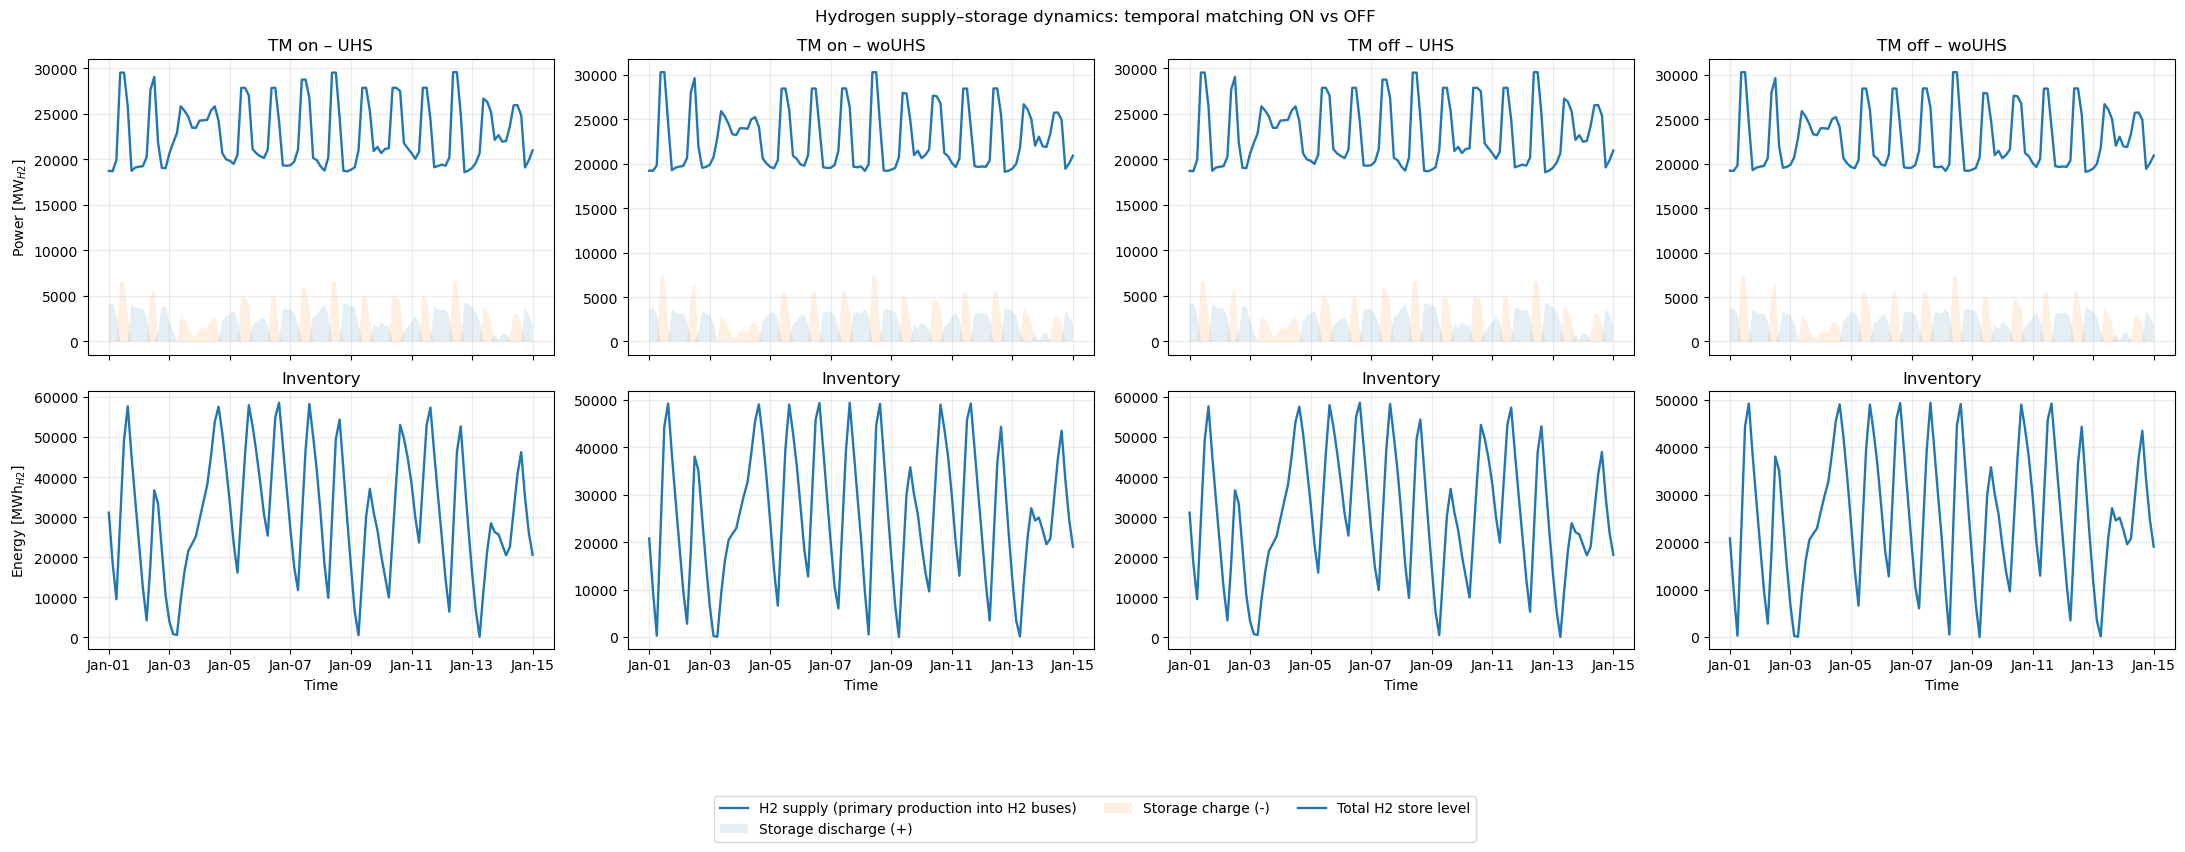

In [488]:
def _ensure_dt_index(x):
    if not isinstance(x.index, pd.DatetimeIndex):
        x = x.copy()
        x.index = pd.to_datetime(x.index)
    return x


def _h2_buses(net) -> pd.Index:
    """Project convention: hydrogen buses are those with carrier == 'H2'."""
    return net.buses.index[net.buses.carrier == "H2"]


def _h2_store_ids(net) -> pd.Index:
    """All H2-related stores by store carrier name (includes H2 UHS and H2 tanks)."""
    if not hasattr(net, "stores") or net.stores.empty:
        return pd.Index([])
    return net.stores.index[net.stores.carrier.astype(str).str.contains("H2", case=False, na=False)]


def _link_net_injection_to_h2(net, link_idx: pd.Index) -> pd.Series:
    """
    Net injection into H2 buses from a given subset of links [MW].
    Positive => net injection into H2 buses. Negative => net withdrawal from H2 buses.
    Uses: injection at a bus is approximately -p_k for that port.
    """
    h2 = _h2_buses(net)
    s = pd.Series(0.0, index=net.snapshots)

    present = net.links.index.intersection(link_idx)
    if len(present) == 0:
        return _ensure_dt_index(s)

    for k in range(5):
        bus_col = f"bus{k}"
        p_col = f"p{k}"
        if bus_col in net.links.columns and hasattr(net.links_t, p_col):
            mask = net.links.loc[present, bus_col].isin(h2)
            if mask.any():
                idx = present[mask.values]
                pk = getattr(net.links_t, p_col)[idx]  # snapshots x links
                inj = (-pk).sum(axis=1)               # injection into H2 buses from these ports
                s = s.add(inj, fill_value=0.0)

    return _ensure_dt_index(s)


def _is_h2_bus(net, buses: pd.Series) -> pd.Series:
    h2 = set(_h2_buses(net))
    return buses.isin(h2)


def _final_h2_offtake_links(net, production_carriers, pipeline_carriers) -> pd.Index:
    """
    Links that represent *final* offtake from the H2 system:
    - touches at least one H2 bus
    - touches at least one non-H2 bus (crosses boundary)
    - excludes production carriers and pipeline carriers
    """
    links = net.links.copy()

    touches_h2 = pd.Series(False, index=links.index)
    touches_non_h2 = pd.Series(False, index=links.index)

    for k in range(5):
        bus_col = f"bus{k}"
        if bus_col in links.columns:
            b = links[bus_col]
            m_h2 = _is_h2_bus(net, b)
            touches_h2 |= m_h2
            touches_non_h2 |= (~m_h2) & b.notna()

    crosses_boundary = touches_h2 & touches_non_h2
    is_prod = links.carrier.isin(production_carriers)
    is_pipe = links.carrier.isin(pipeline_carriers)

    return links.index[crosses_boundary & (~is_prod) & (~is_pipe)]


def _production_links(net, production_carriers) -> pd.Index:
    """Links that are considered primary H2 producers."""
    return net.links.index[net.links.carrier.isin(production_carriers)]


def _h2_store_power(net) -> pd.Series:
    """
    Total H2-store power [MW]:
      + = discharge (injection to H2)
      - = charge (withdrawal from H2)
    """
    sids = _h2_store_ids(net)
    if len(sids) == 0:
        return _ensure_dt_index(pd.Series(0.0, index=net.snapshots))

    if not hasattr(net, "stores_t") or not hasattr(net.stores_t, "p"):
        raise ValueError("net.stores_t.p not found – store power time series missing.")

    s = net.stores_t.p[sids].sum(axis=1)
    return _ensure_dt_index(s)


def _h2_store_energy(net) -> pd.Series:
    """Total H2-store energy level [MWh]."""
    sids = _h2_store_ids(net)
    if len(sids) == 0:
        return _ensure_dt_index(pd.Series(0.0, index=net.snapshots))

    if not hasattr(net, "stores_t") or not hasattr(net.stores_t, "e"):
        raise ValueError("net.stores_t.e not found – store energy time series missing.")

    s = net.stores_t.e[sids].sum(axis=1)
    return _ensure_dt_index(s)


def _plotA_signals(
    net,
    production_carriers=("H2 Electrolysis", "SMR", "SMR CC"),
    pipeline_carriers=("H2 pipeline", "H2 pipeline repurposed")
):
    """
    Supply   = primary H2 production into H2 buses (from selected production carriers)
    Demand   = final H2 offtake crossing boundary (computed but not plotted by default)
    Storage  = store charge/discharge from stores_t.p
    Level    = store inventory from stores_t.e
    """
    prod_idx = _production_links(net, production_carriers)
    off_idx  = _final_h2_offtake_links(net, production_carriers, pipeline_carriers)

    net_inj_prod = _link_net_injection_to_h2(net, prod_idx)   # MW
    net_inj_off  = _link_net_injection_to_h2(net, off_idx)    # MW (expected negative for offtake)

    supply = net_inj_prod.clip(lower=0.0)
    demand = (-net_inj_off).clip(lower=0.0)

    store_p = _h2_store_power(net)
    store_e = _h2_store_energy(net)

    return dict(
        supply=supply,                                  # MW
        demand=demand,                                  # MW
        storage_discharge=store_p.clip(lower=0.0),       # MW
        storage_charge=(-store_p).clip(lower=0.0),       # MW
        storage_level=store_e                            # MWh
    )


def _slice_signals(sig: dict, start=None, end=None) -> dict:
    idx = sig["supply"].index
    if start is None:
        start = idx.min()
    else:
        start = pd.to_datetime(start)
    if end is None:
        end = idx.max()
    else:
        end = pd.to_datetime(end)

    return {k: v.loc[start:end] for k, v in sig.items()}, start, end


def plot_A_temporal_matching_sensitivity(
    uhs_tm, wo_tm, uhs_no_tm, wo_no_tm,
    start=None, end=None,
    production_carriers=("H2 Electrolysis", "SMR", "SMR CC"),
    pipeline_carriers=("H2 pipeline", "H2 pipeline repurposed")
):
    """
    One figure comparing temporal matching ON vs OFF, for UHS vs woUHS.
    """
    # Build signals
    sigs = {
        "TM on – UHS": _plotA_signals(uhs_tm, production_carriers, pipeline_carriers),
        "TM on – woUHS": _plotA_signals(wo_tm, production_carriers, pipeline_carriers),
        "TM off – UHS": _plotA_signals(uhs_no_tm, production_carriers, pipeline_carriers),
        "TM off – woUHS": _plotA_signals(wo_no_tm, production_carriers, pipeline_carriers),
    }

    # Align common time index across all four
    common = None
    for s in sigs.values():
        common = s["supply"].index if common is None else common.intersection(s["supply"].index)
    for name in sigs:
        for k in sigs[name]:
            sigs[name][k] = sigs[name][k].loc[common]

    # Slice once (shared window)
    any_sig = next(iter(sigs.values()))
    sliced_any, s, e = _slice_signals(any_sig, start=start, end=end)
    for name in sigs:
        sigs[name], _, _ = _slice_signals(sigs[name], start=s, end=e)

    # Figure: 2 rows x 4 columns
    titles = list(sigs.keys())
    fig, axes = plt.subplots(
        2, 4, figsize=(22, 7.8),
        sharex=True,
        gridspec_kw={"height_ratios": [1.15, 1.0]}
    )

    # Row 1: flows
    for j, title in enumerate(titles):
        ax = axes[0, j]
        sig = sigs[title]

        ax.plot(sig["supply"].index, sig["supply"].values, linewidth=1.7,
                label="H2 supply (primary production into H2 buses)")
        ax.fill_between(sig["storage_discharge"].index, 0, sig["storage_discharge"].values,
                        alpha=0.12, label="Storage discharge (+)")
        ax.fill_between(sig["storage_charge"].index, 0, sig["storage_charge"].values,
                        alpha=0.12, label="Storage charge (-)")

        ax.set_title(title)
        ax.set_ylabel("Power [MW$_{H2}$]" if j == 0 else "")
        ax.grid(True, alpha=0.25)

    # Row 2: inventory
    for j, title in enumerate(titles):
        ax = axes[1, j]
        sig = sigs[title]

        ax.plot(sig["storage_level"].index, sig["storage_level"].values, linewidth=1.7,
                label="Total H2 store level")

        ax.set_title("Inventory")
        ax.set_ylabel("Energy [MWh$_{H2}$]" if j == 0 else "")
        ax.grid(True, alpha=0.25)

        # Month-day formatting without year
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
        ax.set_xlabel("Time")

    # Shared legend below figure (unique labels)
    handles, labels = [], []
    for ax in [axes[0, 0], axes[1, 0]]:
        h, l = ax.get_legend_handles_labels()
        for hh, ll in zip(h, l):
            if ll not in labels:
                handles.append(hh)
                labels.append(ll)

    fig.legend(
        handles, labels,
        loc="upper center",
        bbox_to_anchor=(0.5, -0.02),
        ncol=3,
        frameon=True
    )

    fig.suptitle("Hydrogen supply–storage dynamics: temporal matching ON vs OFF", y=0.98)
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.16)
    plt.show()


# ============================================================
# Run (EXACT variable names you stated)
# temporal matching ON  : uhs, woUHS
# temporal matching OFF : uhswotm, woUHSwotm
# ============================================================

plot_A_temporal_matching_sensitivity(
    uhs_tm=uhs,
    wo_tm=woUHS,
    uhs_no_tm=uhswotm,
    wo_no_tm=woUHSwotm,
    start="2013-01-01",
    end="2013-01-15"
)